<a href="https://colab.research.google.com/github/ijamil1/NFL-Data-Exploration/blob/main/NFL_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('gdrive/MyDrive/nfl_games.csv') #data from 538
data.head()

season        date       team1  ... prob1_outcome     prob2  prob2_outcome
0    2020  2021-02-07  Buccaneers  ...           1.0  0.533794            0.0
1    2020  2021-01-24      Chiefs  ...           1.0  0.464363            0.0
2    2020  2021-01-24     Packers  ...           0.0  0.370809            1.0
3    2020  2021-01-17      Saints  ...           0.0  0.294141            1.0
4    2020  2021-01-17      Chiefs  ...           1.0  0.210073            0.0

[5 rows x 8 columns]

In [ ]:
data.shape

(1604, 8)

In [ ]:
#1604 games

In [ ]:
binary_elo = []
for idx, row in data.iterrows():
  if row['prob1']>row['prob2']:
    #team 1 is fav
    if row['prob1_outcome']>0:
      binary_elo.append(1)
    else:
      binary_elo.append(0)
  elif row['prob2']>row['prob1']:
    #team 2 is fav
    if row['prob2_outcome']>0:
      binary_elo.append(1)
    else:
      binary_elo.append(0)
  else:
    #pickem, so elo can't be right or wrong
    continue
print(sum(binary_elo)/len(binary_elo))

0.6527431421446384


In [ ]:
#Elo was right 65.3 percent of the time

In [ ]:
data

season        date       team1  ... prob1_outcome     prob2  prob2_outcome
0       2020  2021-02-07  Buccaneers  ...           1.0  0.533794            0.0
1       2020  2021-01-24      Chiefs  ...           1.0  0.464363            0.0
2       2020  2021-01-24     Packers  ...           0.0  0.370809            1.0
3       2020  2021-01-17      Saints  ...           0.0  0.294141            1.0
4       2020  2021-01-17      Chiefs  ...           1.0  0.210073            0.0
...      ...         ...         ...  ...           ...       ...            ...
1599    2015  2015-09-13       Bills  ...           1.0  0.474179            0.0
1600    2015  2015-09-13    Redskins  ...           0.0  0.567315            1.0
1601    2015  2015-09-13     Jaguars  ...           0.0  0.658446            1.0
1602    2015  2015-09-13        Rams  ...           1.0  0.685813            0.0
1603    2015  2015-09-10    Patriots  ...           1.0  0.277658            0.0

[1604 rows x 8 columns]

In [ ]:
odds_19_20 = pd.read_excel('gdrive/MyDrive/nfl odds 2019-20.xlsx')
odds_19_20.head()

Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open Close   ML    2H
0   905  451  V    GreenBay    0    7    0    3     10    46  46.5  140    23
1   905  452  H     Chicago    3    0    0    0      3   3.5     3 -160     3
2   908  453  V     Atlanta    0    0    0   12     12  47.5  46.5  160   2.5
3   908  454  H   Minnesota   14    7    7    0     28   4.5   3.5 -190  22.5
4   908  455  V  Washington   10   10    0    7     27  46.5    44  425    23

In [ ]:
dates=[]
for idx, row in odds_19_20.iterrows():
  dt = str(row['Date'])
  if len(dt) == 3:
    month = '0'+dt[0]
    if int(month) <=3:
      year = '2020'
      day = dt[1:]
    else:
      year = '2019'
      day = dt[1:]
  else:
    month = dt[0:2]
    year='2019'
    day=dt[2:]
  dt = year+'-'+month+'-'+day
  dates.append(dt)
odds_19_20.drop(labels='Date',axis=1,inplace=True)
odds_19_20['Date']=pd.Series(dates)
odds_19_20.head()
  

Rot VH        Team  1st  2nd  3rd  ...  Final  Open Close   ML    2H        Date
0  451  V    GreenBay    0    7    0  ...     10    46  46.5  140    23  2019-09-05
1  452  H     Chicago    3    0    0  ...      3   3.5     3 -160     3  2019-09-05
2  453  V     Atlanta    0    0    0  ...     12  47.5  46.5  160   2.5  2019-09-08
3  454  H   Minnesota   14    7    7  ...     28   4.5   3.5 -190  22.5  2019-09-08
4  455  V  Washington   10   10    0  ...     27  46.5    44  425    23  2019-09-08

[5 rows x 13 columns]

In [ ]:
#visitor and home team is alternating all the way through the dataset

In [ ]:
team2name = {
    'Buffalo': 'Bills',
    'Miami': 'Dolphins',
    'NYJets': 'Jets',
    'NewEngland': 'Patriots',
    'Baltimore': 'Ravens',
    'Cleveland': 'Browns',
    'Cincinnati': 'Bengals',
    'Pittsburgh': 'Steelers',
    'Indianapolis': 'Colts',
    'Tennessee': 'Titans',
    'Houston': 'Texans',
    'Jacksonville': 'Jaguars',
    'KansasCity': 'Chiefs',
    'LAChargers': 'Chargers',
    'Oakland': 'Raiders',
    'Denver': 'Broncos',
    'Philadelphia': 'Eagles',
    'NYGiants': 'Giants',
    'Dallas': 'Cowboys',
    'Washington': 'Redskins',
    'GreenBay':'Packers',
    'Minnesota': 'Vikings',
    'Chicago': 'Bears',
    'Detroit': 'Lions',
    'TampaBay': 'Buccaneers',
    'NewOrleans': 'Saints',
    'Atlanta': 'Falcons',
    'Carolina': 'Panthers',
    'Seattle': 'Seahawks',
    'SanFrancisco': '49ers',
    'Arizona': 'Cardinals',
    'LARams': 'Rams'
}


teams = []
for idx,row in odds_19_20.iterrows():
  team = row['Team']
  teams.append(team2name[team])
odds_19_20.drop(labels='Team',axis=1,inplace=True)
odds_19_20['Team']=pd.Series(teams)
odds_19_20.head(32)

Rot VH  1st  2nd  3rd  4th  ...  Open Close   ML    2H        Date        Team
0   451  V    0    7    0    3  ...    46  46.5  140    23  2019-09-05     Packers
1   452  H    3    0    0    0  ...   3.5     3 -160     3  2019-09-05       Bears
2   453  V    0    0    0   12  ...  47.5  46.5  160   2.5  2019-09-08     Falcons
3   454  H   14    7    7    0  ...   4.5   3.5 -190  22.5  2019-09-08     Vikings
4   455  V   10   10    0    7  ...  46.5    44  425    23  2019-09-08    Redskins
5   456  H    0    7   14   11  ...     8    10 -600     8  2019-09-08      Eagles
6   457  V    0    0    3   14  ...  38.5    41  120   0.5  2019-09-08       Bills
7   458  H    6    0   10    0  ...   3.5   2.5 -140    20  2019-09-08        Jets
8   459  V   21   21   10    7  ...   3.5     7 -360   0.5  2019-09-08      Ravens
9   460  H    0   10    0    0  ...  36.5  40.5  280  18.5  2019-09-08    Dolphins
10  461  V    3    3   14   11  ...  48.5    51  100   0.5  2019-09-08       49ers
11  462  H    0    7    7    3  ...     1     1 -120  24.5  2019-09-08  Buccaneers
12  463  V   17    6    7   10  ...     5   3.5 -190     3  2019-09-08      Chiefs
13  464  H    7    6    0   13  ...  52.5    49  160    24  2019-09-08     Jaguars
14  465  V    3    9   10   21  ...    45    44  215    22  2019-09-08      Titans
15  466  H    6    0    7    0  ...     5   5.5 -265     4  2019-09-08      Browns
16  467  V    0   13   10    7  ...     3   1.5 -125    24  2019-09-08        Rams
17  468  H    0    3   10   14  ...  50.5    49  105   1.5  2019-09-08    Panthers
18  469  V    0   17    0    7  ...  48.5     3 -150   0.5  2019-09-08       Lions
19  470  H    0    3    3   18  ...    pk    46  130  21.5  2019-09-08   Cardinals
20  471  V    3   14    0    3  ...  43.5  44.5  375  23.5  2019-09-08     Bengals
21  472  H    0   14    0    7  ...   7.5     9 -500   6.5  2019-09-08    Seahawks
22  473  V    0    6   10    8  ...    48  44.5  240   0.5  2019-09-08       Colts
23  474  H    7   10    7    0  ...   3.5     6 -300  22.5  2019-09-08    Chargers
24  475  V    7    0    3    7  ...    46  44.5  270    22  2019-09-08      Giants
25  476  H    7   14   14    0  ...     7     7 -340     1  2019-09-08     Cowboys
26  477  V    0    0    3    0  ...  51.5    49  215     2  2019-09-08    Steelers
27  478  H    7   13   10    3  ...     6   5.5 -265    24  2019-09-08    Patriots
28  479  V    0   14    7    7  ...    54    52  260    27  2019-09-09      Texans
29  480  H    0    3   14   13  ...   7.5   6.5 -330     8  2019-09-09      Saints
30  481  V    0    0    6   10  ...    43     3 -155   3.5  2019-09-09     Broncos
31  482  H    7    7    0   10  ...     3  42.5  135    21  2019-09-09     Raiders

[32 rows x 13 columns]

In [ ]:
odds_19_20.drop(labels=['Rot','1st','2nd','3rd','4th','Open','Close','2H'],axis=1,inplace=True)
odds_19_20.head(32)

VH  Final   ML        Date        Team
0   V     10  140  2019-09-05     Packers
1   H      3 -160  2019-09-05       Bears
2   V     12  160  2019-09-08     Falcons
3   H     28 -190  2019-09-08     Vikings
4   V     27  425  2019-09-08    Redskins
5   H     32 -600  2019-09-08      Eagles
6   V     17  120  2019-09-08       Bills
7   H     16 -140  2019-09-08        Jets
8   V     59 -360  2019-09-08      Ravens
9   H     10  280  2019-09-08    Dolphins
10  V     31  100  2019-09-08       49ers
11  H     17 -120  2019-09-08  Buccaneers
12  V     40 -190  2019-09-08      Chiefs
13  H     26  160  2019-09-08     Jaguars
14  V     43  215  2019-09-08      Titans
15  H     13 -265  2019-09-08      Browns
16  V     30 -125  2019-09-08        Rams
17  H     27  105  2019-09-08    Panthers
18  V     27 -150  2019-09-08       Lions
19  H     27  130  2019-09-08   Cardinals
20  V     20  375  2019-09-08     Bengals
21  H     21 -500  2019-09-08    Seahawks
22  V     24  240  2019-09-08       Colts
23  H     30 -300  2019-09-08    Chargers
24  V     17  270  2019-09-08      Giants
25  H     35 -340  2019-09-08     Cowboys
26  V      3  215  2019-09-08    Steelers
27  H     33 -265  2019-09-08    Patriots
28  V     28  260  2019-09-09      Texans
29  H     30 -330  2019-09-09      Saints
30  V     16 -155  2019-09-09     Broncos
31  H     24  135  2019-09-09     Raiders

In [ ]:
awayML = []
awayTeam=[]
awayScore = []
drops = []
for idx, row in odds_19_20.iterrows():
  if idx%2==0:
    awayML.append(row['ML'])
    awayTeam.append(row['Team'])
    awayScore.append(row['Final'])
    drops.append(idx)
odds_19_20.drop(labels=drops,axis=0,inplace=True)
odds_19_20

VH  Final   ML        Date      Team
1    H      3 -160  2019-09-05     Bears
3    H     28 -190  2019-09-08   Vikings
5    H     32 -600  2019-09-08    Eagles
7    H     16 -140  2019-09-08      Jets
9    H     10  280  2019-09-08  Dolphins
..  ..    ...  ...         ...       ...
525  H     51 -500  2020-01-12    Chiefs
527  H     28 -220  2020-01-12   Packers
529  H     37 -360  2020-01-19     49ers
531  H     35 -340  2020-01-19    Chiefs
533  N     31 -130  2020-02-02    Chiefs

[267 rows x 5 columns]

In [ ]:
odds_19_20.reset_index()

index VH  Final   ML        Date      Team
0        1  H      3 -160  2019-09-05     Bears
1        3  H     28 -190  2019-09-08   Vikings
2        5  H     32 -600  2019-09-08    Eagles
3        7  H     16 -140  2019-09-08      Jets
4        9  H     10  280  2019-09-08  Dolphins
..     ... ..    ...  ...         ...       ...
262    525  H     51 -500  2020-01-12    Chiefs
263    527  H     28 -220  2020-01-12   Packers
264    529  H     37 -360  2020-01-19     49ers
265    531  H     35 -340  2020-01-19    Chiefs
266    533  N     31 -130  2020-02-02    Chiefs

[267 rows x 6 columns]

In [ ]:
odds_19_20.drop(labels='VH',axis=1,inplace=True)

In [ ]:
odds_19_20=odds_19_20.reset_index()

In [ ]:
odds_19_20.drop(labels=['index'],axis=1,inplace=True)
odds_19_20

Final   ML        Date      Team
0        3 -160  2019-09-05     Bears
1       28 -190  2019-09-08   Vikings
2       32 -600  2019-09-08    Eagles
3       16 -140  2019-09-08      Jets
4       10  280  2019-09-08  Dolphins
..     ...  ...         ...       ...
262     51 -500  2020-01-12    Chiefs
263     28 -220  2020-01-12   Packers
264     37 -360  2020-01-19     49ers
265     35 -340  2020-01-19    Chiefs
266     31 -130  2020-02-02    Chiefs

[267 rows x 4 columns]

In [ ]:
odds_19_20['Away Team'] = pd.Series(awayTeam)
odds_19_20

Final   ML        Date      Team Away Team
0        3 -160  2019-09-05     Bears   Packers
1       28 -190  2019-09-08   Vikings   Falcons
2       32 -600  2019-09-08    Eagles  Redskins
3       16 -140  2019-09-08      Jets     Bills
4       10  280  2019-09-08  Dolphins    Ravens
..     ...  ...         ...       ...       ...
262     51 -500  2020-01-12    Chiefs    Texans
263     28 -220  2020-01-12   Packers  Seahawks
264     37 -360  2020-01-19     49ers   Packers
265     35 -340  2020-01-19    Chiefs    Titans
266     31 -130  2020-02-02    Chiefs     49ers

[267 rows x 5 columns]

In [ ]:
odds_19_20['Away ML']=pd.Series(awayML)
odds_19_20['Away Points']=pd.Series(awayScore)
odds_19_20.rename(columns={'ML': 'Home ML', 'Team': 'Home Team','Final': 'Home Points'},inplace=True)
odds_19_20

Home Points  Home ML        Date Home Team Away Team  Away ML  Away Points
0              3     -160  2019-09-05     Bears   Packers      140           10
1             28     -190  2019-09-08   Vikings   Falcons      160           12
2             32     -600  2019-09-08    Eagles  Redskins      425           27
3             16     -140  2019-09-08      Jets     Bills      120           17
4             10      280  2019-09-08  Dolphins    Ravens     -360           59
..           ...      ...         ...       ...       ...      ...          ...
262           51     -500  2020-01-12    Chiefs    Texans      400           31
263           28     -220  2020-01-12   Packers  Seahawks      190           23
264           37     -360  2020-01-19     49ers   Packers      300           20
265           35     -340  2020-01-19    Chiefs    Titans      280           24
266           31     -130  2020-02-02    Chiefs     49ers      110           20

[267 rows x 7 columns]

In [ ]:
odds_19_20=odds_19_20[['Date','Home Team', 'Away Team','Home Points','Away Points', 'Home ML', 'Away ML']]
odds_19_20

Date Home Team Away Team  Home Points  Away Points  Home ML  Away ML
0    2019-09-05     Bears   Packers            3           10     -160      140
1    2019-09-08   Vikings   Falcons           28           12     -190      160
2    2019-09-08    Eagles  Redskins           32           27     -600      425
3    2019-09-08      Jets     Bills           16           17     -140      120
4    2019-09-08  Dolphins    Ravens           10           59      280     -360
..          ...       ...       ...          ...          ...      ...      ...
262  2020-01-12    Chiefs    Texans           51           31     -500      400
263  2020-01-12   Packers  Seahawks           28           23     -220      190
264  2020-01-19     49ers   Packers           37           20     -360      300
265  2020-01-19    Chiefs    Titans           35           24     -340      280
266  2020-02-02    Chiefs     49ers           31           20     -130      110

[267 rows x 7 columns]

In [ ]:
data.head()

season        date       team1  ... prob1_outcome     prob2  prob2_outcome
0    2020  2021-02-07  Buccaneers  ...           1.0  0.533794            0.0
1    2020  2021-01-24      Chiefs  ...           1.0  0.464363            0.0
2    2020  2021-01-24     Packers  ...           0.0  0.370809            1.0
3    2020  2021-01-17      Saints  ...           0.0  0.294141            1.0
4    2020  2021-01-17      Chiefs  ...           1.0  0.210073            0.0

[5 rows x 8 columns]

In [ ]:
data.rename(columns={'date': 'Date','team1': 'Home Team', 'team2': 'Away Team', 'prob1':'probH', 'prob2':'probA','prob1_outcome':'probH_outcome','prob2_outcome':'probA_outcome'},inplace=True)
data.drop(labels=['season'],axis=1,inplace=True)
data.head()

Date   Home Team   Away Team  ...  probH_outcome     probA  probA_outcome
0  2021-02-07  Buccaneers      Chiefs  ...            1.0  0.533794            0.0
1  2021-01-24      Chiefs       Bills  ...            1.0  0.464363            0.0
2  2021-01-24     Packers  Buccaneers  ...            0.0  0.370809            1.0
3  2021-01-17      Saints  Buccaneers  ...            0.0  0.294141            1.0
4  2021-01-17      Chiefs      Browns  ...            1.0  0.210073            0.0

[5 rows x 7 columns]

In [ ]:
odds_19_20.tail()

Date Home Team Away Team  Home Points  Away Points  Home ML  Away ML
262  2020-01-12    Chiefs    Texans           51           31     -500      400
263  2020-01-12   Packers  Seahawks           28           23     -220      190
264  2020-01-19     49ers   Packers           37           20     -360      300
265  2020-01-19    Chiefs    Titans           35           24     -340      280
266  2020-02-02    Chiefs     49ers           31           20     -130      110

In [ ]:
games_19_20 = data.merge(right=odds_19_20,how='inner',on=['Date','Home Team','Away Team'])
games_19_20.head()

Date Home Team Away Team  ...  Away Points  Home ML  Away ML
0  2020-02-02    Chiefs     49ers  ...           20     -130      110
1  2020-01-19     49ers   Packers  ...           20     -360      300
2  2020-01-19    Chiefs    Titans  ...           24     -340      280
3  2020-01-12   Packers  Seahawks  ...           23     -220      190
4  2020-01-12    Chiefs    Texans  ...           31     -500      400

[5 rows x 11 columns]

In [ ]:
len(games_19_20)==len(odds_19_20)

True

In [ ]:
odds_18_19 = pd.read_excel('gdrive/MyDrive/nfl odds 2018-19.xlsx')
odds_18_19.head()

Date  Rot VH          Team  1st  2nd  3rd  4th  Final  Open Close   ML    2H
0   906  451  V       Atlanta    3    3    0    6     12  46.5    pk -119    pk
1   906  452  H  Philadelphia    0    3    7    8     18     4    44 -101    21
2   909  453  V    Pittsburgh    0    7   14    0     21   6.5   3.5 -185    pk
3   909  454  H     Cleveland    0    0    7   14     21    47    41  155    20
4   909  455  V  SanFrancisco    0    3   10    3     16    47    46  230  21.5

In [ ]:
odds_18_19.drop(labels=['Rot','1st','2nd','3rd','4th','Open','Close','2H'],axis=1,inplace=True)
dates=[]
for idx, row in odds_18_19.iterrows():
  dt = str(row['Date'])
  if len(dt) == 3:
    month = '0'+dt[0]
    if int(month) <=3:
      year = '2019'
      day = dt[1:]
    else:
      year = '2018'
      day = dt[1:]
  else:
    month = dt[0:2]
    year='2018'
    day=dt[2:]
  dt = year+'-'+month+'-'+day
  dates.append(dt)
odds_18_19.drop(labels='Date',axis=1,inplace=True)
odds_18_19['Date']=pd.Series(dates)
teams = []
for idx,row in odds_18_19.iterrows():
  team = row['Team']
  teams.append(team2name[team])
odds_18_19.drop(labels='Team',axis=1,inplace=True)
odds_18_19['Team']=pd.Series(teams)
awayML = []
awayTeam=[]
awayScore = []
drops = []
for idx, row in odds_18_19.iterrows():
  if idx%2==0:
    awayML.append(row['ML'])
    awayTeam.append(row['Team'])
    awayScore.append(row['Final'])
    drops.append(idx)
odds_18_19.drop(labels=drops,axis=0,inplace=True)
odds_18_19 = odds_18_19.reset_index()
odds_18_19['Away Team'] = pd.Series(awayTeam)
odds_18_19['Away ML']=pd.Series(awayML)
odds_18_19['Away Points']=pd.Series(awayScore)
odds_18_19.head()

index VH  Final   ML        Date     Team Away Team  Away ML  Away Points
0      1  H     18 -101  2018-09-06   Eagles   Falcons     -119           12
1      3  H     21  155  2018-09-09   Browns  Steelers     -185           21
2      5  H     24 -280  2018-09-09  Vikings     49ers      230           16
3      7  H     23 -105  2018-09-09    Colts   Bengals     -115           34
4      9  H     47 -380  2018-09-09   Ravens     Bills      290            3

In [ ]:
odds_18_19.drop(labels=['index','VH'],axis=1,inplace=True)
odds_18_19.rename(columns={'Team': 'Home Team', 'ML': 'Home ML','Final':'Home Points'},inplace=True)
odds_18_19=odds_18_19[['Date','Home Team','Away Team','Home Points','Away Points','Home ML','Away ML']]
odds_18_19

Date Home Team Away Team  Home Points  Away Points  Home ML  Away ML
0    2018-09-06    Eagles   Falcons           18           12     -101     -119
1    2018-09-09    Browns  Steelers           21           21      155     -185
2    2018-09-09   Vikings     49ers           24           16     -280      230
3    2018-09-09     Colts   Bengals           23           34     -105     -115
4    2018-09-09    Ravens     Bills           47            3     -380      290
..          ...       ...       ...          ...          ...      ...      ...
262  2019-01-13  Patriots  Chargers           41           28     -185      165
263  2019-01-13    Saints    Eagles           20           14     -450      350
264  2019-01-20    Saints      Rams           23           26     -165      145
265  2019-01-20    Chiefs  Patriots           31           37     -185      165
266  2019-02-03      Rams  Patriots            3           13      115     -135

[267 rows x 7 columns]

In [ ]:
odds_18_19.head(16)

Date  Home Team   Away Team  ...  Away Points  Home ML  Away ML
0   2018-09-06     Eagles     Falcons  ...           12     -101     -119
1   2018-09-09     Browns    Steelers  ...           21      155     -185
2   2018-09-09    Vikings       49ers  ...           16     -280      230
3   2018-09-09      Colts     Bengals  ...           34     -105     -115
4   2018-09-09     Ravens       Bills  ...            3     -380      290
5   2018-09-09     Giants     Jaguars  ...           20      125     -145
6   2018-09-09     Saints  Buccaneers  ...           48     -550      400
7   2018-09-09   Patriots      Texans  ...           20     -275      225
8   2018-09-09   Dolphins      Titans  ...           20     -110     -110
9   2018-09-09   Chargers      Chiefs  ...           38     -190      160
10  2018-09-09    Broncos    Seahawks  ...           24     -190      160
11  2018-09-09   Panthers     Cowboys  ...            8     -170      145
12  2018-09-09  Cardinals    Redskins  ...           24     -135      115
13  2018-09-09    Packers       Bears  ...           23     -310      250
14  2018-09-10      Lions        Jets  ...           48     -360      280
15  2018-09-10    Raiders        Rams  ...           33      240     -300

[16 rows x 7 columns]

In [ ]:
data.head()

Date   Home Team   Away Team  ...  probH_outcome     probA  probA_outcome
0  2021-02-07  Buccaneers      Chiefs  ...            1.0  0.533794            0.0
1  2021-01-24      Chiefs       Bills  ...            1.0  0.464363            0.0
2  2021-01-24     Packers  Buccaneers  ...            0.0  0.370809            1.0
3  2021-01-17      Saints  Buccaneers  ...            0.0  0.294141            1.0
4  2021-01-17      Chiefs      Browns  ...            1.0  0.210073            0.0

[5 rows x 7 columns]

In [ ]:
games_18_19=data.merge(right=odds_18_19,how='inner',on=['Date','Home Team','Away Team'])


In [ ]:
len(games_18_19)==len(odds_18_19)

True

In [ ]:
games_18_19

Date Home Team Away Team  ...  Away Points  Home ML  Away ML
0    2019-02-03      Rams  Patriots  ...           13      115     -135
1    2019-01-20    Chiefs  Patriots  ...           37     -185      165
2    2019-01-20    Saints      Rams  ...           26     -165      145
3    2019-01-13    Saints    Eagles  ...           14     -450      350
4    2019-01-13  Patriots  Chargers  ...           28     -185      165
..          ...       ...       ...  ...          ...      ...      ...
262  2018-09-09   Vikings     49ers  ...           16     -280      230
263  2018-09-09  Dolphins    Titans  ...           20     -110     -110
264  2018-09-09     Colts   Bengals  ...           34     -105     -115
265  2018-09-09    Browns  Steelers  ...           21      155     -185
266  2018-09-06    Eagles   Falcons  ...           12     -101     -119

[267 rows x 11 columns]

In [ ]:
odds_17_18 = pd.read_excel('gdrive/MyDrive/nfl odds 2017-18.xlsx')
odds_17_18.head()

Date  Rot VH        Team  1st  2nd  3rd  4th  Final Open Close   ML    2H
0   907  451  V  KansasCity    7    7    7   21     42   48  47.5  371  25.5
1   907  452  H  NewEngland    7   10   10    0     27    7     8 -480   4.5
2   910  453  V      NYJets    0    6    6    0     12   43    42  317    21
3   910  454  H     Buffalo    0    7    7    7     21    6     7 -400     5
4   910  455  V     Atlanta    3    7    3   10     23    7   6.5 -319   4.5

In [ ]:
odds_17_18.drop(labels=['Rot','1st','2nd','3rd','4th','Open','Close','2H'],axis=1,inplace=True)
dates=[]
for idx, row in odds_17_18.iterrows():
  dt = str(row['Date'])
  if len(dt) == 3:
    month = '0'+dt[0]
    if int(month) <=3:
      year = '2018'
      day = dt[1:]
    else:
      year = '2017'
      day = dt[1:]
  else:
    month = dt[0:2]
    year='2017'
    day=dt[2:]
  dt = year+'-'+month+'-'+day
  dates.append(dt)
odds_17_18.drop(labels='Date',axis=1,inplace=True)
odds_17_18['Date']=pd.Series(dates)
teams = []
for idx,row in odds_17_18.iterrows():
  team = row['Team']
  teams.append(team2name[team])
odds_17_18.drop(labels='Team',axis=1,inplace=True)
odds_17_18['Team']=pd.Series(teams)
awayML = []
awayTeam=[]
awayScore = []
drops = []
for idx, row in odds_17_18.iterrows():
  if idx%2==0:
    awayML.append(row['ML'])
    awayTeam.append(row['Team'])
    awayScore.append(row['Final'])
    drops.append(idx)
odds_17_18.drop(labels=drops,axis=0,inplace=True)
odds_17_18 = odds_17_18.reset_index()
odds_17_18['Away Team'] = pd.Series(awayTeam)
odds_17_18['Away ML']=pd.Series(awayML)
odds_17_18['Away Points']=pd.Series(awayScore)
odds_17_18.head()

index VH  Final   ML        Date      Team Away Team  Away ML  Away Points
0      1  H     27 -480  2017-09-07  Patriots    Chiefs      371           42
1      3  H     21 -400  2017-09-10     Bills      Jets      317           12
2      5  H     17  259  2017-09-10     Bears   Falcons     -319           23
3      7  H      7 -250  2017-09-10    Texans   Jaguars      207           29
4      9  H     17  110  2017-09-10  Redskins    Eagles     -130           30

In [ ]:
odds_17_18.drop(labels=['index','VH'],axis=1,inplace=True)
odds_17_18.head()

Final   ML        Date      Team Away Team  Away ML  Away Points
0     27 -480  2017-09-07  Patriots    Chiefs      371           42
1     21 -400  2017-09-10     Bills      Jets      317           12
2     17  259  2017-09-10     Bears   Falcons     -319           23
3      7 -250  2017-09-10    Texans   Jaguars      207           29
4     17  110  2017-09-10  Redskins    Eagles     -130           30

In [ ]:
odds_17_18.rename(columns={'ML':'Home ML','Team':'Home Team','Final':'Home Points'},inplace=True)
odds_17_18=odds_17_18[['Date','Home Team','Away Team','Home Points','Away Points','Home ML','Away ML']]
odds_17_18

Date Home Team Away Team  Home Points  Away Points  Home ML  Away ML
0    2017-09-07  Patriots    Chiefs           27           42     -480      371
1    2017-09-10     Bills      Jets           21           12     -400      317
2    2017-09-10     Bears   Falcons           17           23      259     -319
3    2017-09-10    Texans   Jaguars            7           29     -250      207
4    2017-09-10  Redskins    Eagles           17           30      110     -130
..          ...       ...       ...          ...          ...      ...      ...
262  2018-01-14  Steelers   Jaguars           42           45     -360      280
263  2018-01-14   Vikings    Saints           29           24     -250      200
264  2018-01-21  Patriots   Jaguars           24           20     -350      275
265  2018-01-21    Eagles   Vikings           38            7      135     -155
266  2018-02-04  Patriots    Eagles           33           41     -200      170

[267 rows x 7 columns]

In [ ]:
odds_16_17 = pd.read_excel('gdrive/MyDrive/nfl odds 2016-17.xlsx')
odds_16_17

Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open Close   ML    2H
0     908  451  V    Carolina    7   10    0    3     20  43.5     3 -141    21
1     908  452  H      Denver    0    7    0   14     21     1  40.5  121   0.5
2     911  453  V    TampaBay    3   14   14    0     31  47.5    47  120  24.5
3     911  454  H     Atlanta   10    3    8    3     24     3   2.5 -140   0.5
4     911  455  V   Minnesota    0    0   12   13     25     3   2.5 -140     3
..    ...  ... ..         ...  ...  ...  ...  ...    ...   ...   ...  ...   ...
529   122  312  H     Atlanta   10   14   13    7     44     5     6 -230  30.5
530   122  313  V  Pittsburgh    0    9    0    8     17    51  50.5  200    27
531   122  314  H  NewEngland   10    7   16    3     36   5.5   5.5 -240    pk
532   205  101  N  NewEngland    0    3    6   19     34     3     3 -140   4.5
533   205  102  N     Atlanta    0   21    7    0     28  57.5    57  120  30.5

[534 rows x 13 columns]

In [ ]:
team2name['SanDiego']='Chargers'
team2name['LosAngeles']='Rams'

In [ ]:
odds_16_17.drop(labels=['Rot','1st','2nd','3rd','4th','Open','Close','2H'],axis=1,inplace=True)
dates=[]
for idx, row in odds_16_17.iterrows():
  dt = str(row['Date'])
  if len(dt) == 3:
    month = '0'+dt[0]
    if int(month) <=3:
      year = '2017'
      day = dt[1:]
    else:
      year = '2016'
      day = dt[1:]
  else:
    month = dt[0:2]
    year='2016'
    day=dt[2:]
  dt = year+'-'+month+'-'+day
  dates.append(dt)
odds_16_17.drop(labels='Date',axis=1,inplace=True)
odds_16_17['Date']=pd.Series(dates)
teams = []
for idx,row in odds_16_17.iterrows():
  team = row['Team']
  teams.append(team2name[team])
odds_16_17.drop(labels='Team',axis=1,inplace=True)
odds_16_17['Team']=pd.Series(teams)
awayML = []
awayTeam=[]
awayScore = []
drops = []
for idx, row in odds_16_17.iterrows():
  if idx%2==0:
    awayML.append(row['ML'])
    awayTeam.append(row['Team'])
    awayScore.append(row['Final'])
    drops.append(idx)
odds_16_17.drop(labels=drops,axis=0,inplace=True)
odds_16_17 = odds_16_17.reset_index()
odds_16_17['Away Team'] = pd.Series(awayTeam)
odds_16_17['Away ML']=pd.Series(awayML)
odds_16_17['Away Points']=pd.Series(awayScore)
odds_16_17.head()

index VH  Final   ML        Date     Team   Away Team  Away ML  Away Points
0      1  H     21  121  2016-09-08  Broncos    Panthers     -141           20
1      3  H     24 -140  2016-09-11  Falcons  Buccaneers      120           31
2      5  H     16  120  2016-09-11   Titans     Vikings     -140           25
3      7  H     29 -200  2016-09-11   Eagles      Browns      170           10
4      9  H     22 -105  2016-09-11     Jets     Bengals     -115           23

In [ ]:
odds_16_17.drop(labels=['index','VH'],axis=1,inplace=True)
odds_16_17.rename(columns={'ML':'Home ML','Team':'Home Team','Final':'Home Points'},inplace=True)
odds_16_17=odds_16_17[['Date','Home Team', 'Away Team', 'Home Points','Away Points', 'Home ML','Away ML']]
odds_16_17

Date Home Team   Away Team  ...  Away Points  Home ML  Away ML
0    2016-09-08   Broncos    Panthers  ...           20      121     -141
1    2016-09-11   Falcons  Buccaneers  ...           31     -140      120
2    2016-09-11    Titans     Vikings  ...           25      120     -140
3    2016-09-11    Eagles      Browns  ...           10     -200      170
4    2016-09-11      Jets     Bengals  ...           23     -105     -115
..          ...       ...         ...  ...          ...      ...      ...
262  2017-01-15    Chiefs    Steelers  ...           18     -130      110
263  2017-01-15   Cowboys     Packers  ...           34     -240      200
264  2017-01-22   Falcons     Packers  ...           21     -230      195
265  2017-01-22  Patriots    Steelers  ...           17     -240      200
266  2017-02-05   Falcons    Patriots  ...           34      120     -140

[267 rows x 7 columns]

In [ ]:
odds_15_16 = pd.read_excel('gdrive/MyDrive/nfl odds 2015-16.xlsx')
odds_15_16

Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open Close   ML    2H
0     910  461  V  Pittsburgh    0    3    8   10     21  48.5    51  300  27.5
1     910  462  H  NewEngland    0   14    7    7     28   2.5     7 -365     3
2     913  463  V    GreenBay    7    3    7   14     31     5     6 -295  24.5
3     913  464  H     Chicago    3   10    3    7     23    50  48.5  230   6.5
4     913  465  V  KansasCity   14   13    0    0     27    42    pk -119    21
..    ...  ... ..         ...  ...  ...  ...  ...    ...   ...   ...  ...   ...
529   123  312  H      Denver    7   10    0    3     20    44    45  130  22.5
530   123  313  V     Arizona    0    7    0    8     15    47  47.5  150   3.5
531   123  314  H    Carolina   17    7   10   15     49     3     3 -170    24
532   207  101  N    Carolina    0    7    0    3     10     4     5 -210   4.5
533   207  102  N      Denver   10    3    3    8     24    45  43.5  180  22.5

[534 rows x 13 columns]

In [ ]:
team2name['St.Louis']='Rams'

In [ ]:
odds_15_16.drop(labels=['Rot','1st','2nd','3rd','4th','Open','Close','2H'],axis=1,inplace=True)
dates=[]
for idx, row in odds_15_16.iterrows():
  dt = str(row['Date'])
  if len(dt) == 3:
    month = '0'+dt[0]
    if int(month) <=3:
      year = '2016'
      day = dt[1:]
    else:
      year = '2015'
      day = dt[1:]
  else:
    month = dt[0:2]
    year='2015'
    day=dt[2:]
  dt = year+'-'+month+'-'+day
  dates.append(dt)
odds_15_16.drop(labels='Date',axis=1,inplace=True)
odds_15_16['Date']=pd.Series(dates)
teams = []
for idx,row in odds_15_16.iterrows():
  team = row['Team']
  teams.append(team2name[team])
odds_15_16.drop(labels='Team',axis=1,inplace=True)
odds_15_16['Team']=pd.Series(teams)
awayML = []
awayTeam=[]
awayScore = []
drops = []
for idx, row in odds_15_16.iterrows():
  if idx%2==0:
    awayML.append(row['ML'])
    awayTeam.append(row['Team'])
    awayScore.append(row['Final'])
    drops.append(idx)
odds_15_16.drop(labels=drops,axis=0,inplace=True)
odds_15_16 = odds_15_16.reset_index()
odds_15_16['Away Team'] = pd.Series(awayTeam)
odds_15_16['Away ML']=pd.Series(awayML)
odds_15_16['Away Points']=pd.Series(awayScore)
odds_15_16.head()

index VH  Final   ML        Date      Team Away Team  Away ML  Away Points
0      1  H     28 -365  2015-09-10  Patriots  Steelers      300           21
1      3  H     23  230  2015-09-13     Bears   Packers     -295           31
2      5  H     20 -101  2015-09-13    Texans    Chiefs     -119           27
3      7  H     31 -200  2015-09-13      Jets    Browns      170           10
4      9  H     27 -115  2015-09-13     Bills     Colts     -105           14

In [ ]:
odds_15_16.drop(labels=['index','VH'],axis=1,inplace=True)
odds_15_16.rename(columns={'ML':'Home ML','Team':'Home Team','Final':'Home Points'},inplace=True)
odds_15_16=odds_15_16[['Date','Home Team','Away Team','Home Points','Away Points','Home ML','Away ML']]
odds_15_16

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0    2015-09-10  Patriots   Steelers  ...           21     -365      300
1    2015-09-13     Bears    Packers  ...           31      230     -295
2    2015-09-13    Texans     Chiefs  ...           27     -101     -119
3    2015-09-13      Jets     Browns  ...           10     -200      170
4    2015-09-13     Bills      Colts  ...           14     -115     -105
..          ...       ...        ...  ...          ...      ...      ...
262  2016-01-17  Panthers   Seahawks  ...           24     -145      125
263  2016-01-17   Broncos   Steelers  ...           16     -320      265
264  2016-01-23   Broncos   Patriots  ...           18      130     -150
265  2016-01-23  Panthers  Cardinals  ...           15     -170      150
266  2016-02-07   Broncos   Panthers  ...           10      180     -210

[267 rows x 7 columns]

In [ ]:
games_17_18 = data.merge(right=odds_17_18,how='inner',on=['Date','Home Team','Away Team'])
games_17_18

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0    2018-02-04  Patriots     Eagles  ...           41     -200      170
1    2018-01-21    Eagles    Vikings  ...            7      135     -155
2    2018-01-21  Patriots    Jaguars  ...           20     -350      275
3    2018-01-14   Vikings     Saints  ...           24     -250      200
4    2018-01-14  Steelers    Jaguars  ...           45     -360      280
..          ...       ...        ...  ...          ...      ...      ...
262  2017-09-10     Lions  Cardinals  ...           23      110     -130
263  2017-09-10    Texans    Jaguars  ...           29     -250      207
264  2017-09-10    Titans    Raiders  ...           26     -140      120
265  2017-09-10  Redskins     Eagles  ...           30      110     -130
266  2017-09-07  Patriots     Chiefs  ...           42     -480      371

[267 rows x 11 columns]

In [ ]:
len(games_17_18)==len(odds_17_18)

True

In [ ]:
games_16_17 = data.merge(right=odds_16_17,how='inner',on=['Date','Home Team','Away Team'])
len(games_16_17)==len(odds_16_17)

True

In [ ]:
games_16_17

Date Home Team Away Team  ...  Away Points  Home ML  Away ML
0    2017-02-05   Falcons  Patriots  ...           34      120     -140
1    2017-01-22  Patriots  Steelers  ...           17     -240      200
2    2017-01-22   Falcons   Packers  ...           21     -230      195
3    2017-01-15    Chiefs  Steelers  ...           18     -130      110
4    2017-01-15   Cowboys   Packers  ...           34     -240      200
..          ...       ...       ...  ...          ...      ...      ...
262  2016-09-11    Titans   Vikings  ...           25      120     -140
263  2016-09-11      Jets   Bengals  ...           23     -105     -115
264  2016-09-11    Saints   Raiders  ...           35     -150      130
265  2016-09-11    Chiefs  Chargers  ...           27     -310      245
266  2016-09-08   Broncos  Panthers  ...           20      121     -141

[267 rows x 11 columns]

In [ ]:
len(odds_15_16)

267

In [ ]:
odds_15_16

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0    2015-09-10  Patriots   Steelers  ...           21     -365      300
1    2015-09-13     Bears    Packers  ...           31      230     -295
2    2015-09-13    Texans     Chiefs  ...           27     -101     -119
3    2015-09-13      Jets     Browns  ...           10     -200      170
4    2015-09-13     Bills      Colts  ...           14     -115     -105
..          ...       ...        ...  ...          ...      ...      ...
262  2016-01-17  Panthers   Seahawks  ...           24     -145      125
263  2016-01-17   Broncos   Steelers  ...           16     -320      265
264  2016-01-23   Broncos   Patriots  ...           18      130     -150
265  2016-01-23  Panthers  Cardinals  ...           15     -170      150
266  2016-02-07   Broncos   Panthers  ...           10      180     -210

[267 rows x 7 columns]

In [ ]:
odds_15_16.loc[78:90,'Date']='2015-10-18'

In [ ]:
odds_15_16.loc[264,'Date']='2016-01-24'

In [ ]:
odds_15_16.loc[265,'Date']='2016-01-24'

In [ ]:
odds_15_16.loc[90,'Date']='2015-10-19'

In [ ]:
games_15_16 = data.merge(right=odds_15_16,how='inner',on=['Date','Home Team','Away Team'])
len(games_15_16)==len(odds_15_16)

True

In [ ]:
games_15_16

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0    2016-02-07   Broncos   Panthers  ...           10      180     -210
1    2016-01-24   Broncos   Patriots  ...           18      130     -150
2    2016-01-24  Panthers  Cardinals  ...           15     -170      150
3    2016-01-17   Broncos   Steelers  ...           16     -320      265
4    2016-01-17  Panthers   Seahawks  ...           24     -145      125
..          ...       ...        ...  ...          ...      ...      ...
262  2015-09-13     Bills      Colts  ...           14     -115     -105
263  2015-09-13  Redskins   Dolphins  ...           17      180     -210
264  2015-09-13   Jaguars   Panthers  ...           20      130     -150
265  2015-09-13      Rams   Seahawks  ...           31      155     -175
266  2015-09-10  Patriots   Steelers  ...           21     -365      300

[267 rows x 11 columns]

In [ ]:
games_16_17

Date Home Team Away Team  ...  Away Points  Home ML  Away ML
0    2017-02-05   Falcons  Patriots  ...           34      120     -140
1    2017-01-22  Patriots  Steelers  ...           17     -240      200
2    2017-01-22   Falcons   Packers  ...           21     -230      195
3    2017-01-15    Chiefs  Steelers  ...           18     -130      110
4    2017-01-15   Cowboys   Packers  ...           34     -240      200
..          ...       ...       ...  ...          ...      ...      ...
262  2016-09-11    Titans   Vikings  ...           25      120     -140
263  2016-09-11      Jets   Bengals  ...           23     -105     -115
264  2016-09-11    Saints   Raiders  ...           35     -150      130
265  2016-09-11    Chiefs  Chargers  ...           27     -310      245
266  2016-09-08   Broncos  Panthers  ...           20      121     -141

[267 rows x 11 columns]

In [ ]:
games_17_18

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0    2018-02-04  Patriots     Eagles  ...           41     -200      170
1    2018-01-21    Eagles    Vikings  ...            7      135     -155
2    2018-01-21  Patriots    Jaguars  ...           20     -350      275
3    2018-01-14   Vikings     Saints  ...           24     -250      200
4    2018-01-14  Steelers    Jaguars  ...           45     -360      280
..          ...       ...        ...  ...          ...      ...      ...
262  2017-09-10     Lions  Cardinals  ...           23      110     -130
263  2017-09-10    Texans    Jaguars  ...           29     -250      207
264  2017-09-10    Titans    Raiders  ...           26     -140      120
265  2017-09-10  Redskins     Eagles  ...           30      110     -130
266  2017-09-07  Patriots     Chiefs  ...           42     -480      371

[267 rows x 11 columns]

In [ ]:
games_18_19

Date Home Team Away Team  ...  Away Points  Home ML  Away ML
0    2019-02-03      Rams  Patriots  ...           13      115     -135
1    2019-01-20    Chiefs  Patriots  ...           37     -185      165
2    2019-01-20    Saints      Rams  ...           26     -165      145
3    2019-01-13    Saints    Eagles  ...           14     -450      350
4    2019-01-13  Patriots  Chargers  ...           28     -185      165
..          ...       ...       ...  ...          ...      ...      ...
262  2018-09-09   Vikings     49ers  ...           16     -280      230
263  2018-09-09  Dolphins    Titans  ...           20     -110     -110
264  2018-09-09     Colts   Bengals  ...           34     -105     -115
265  2018-09-09    Browns  Steelers  ...           21      155     -185
266  2018-09-06    Eagles   Falcons  ...           12     -101     -119

[267 rows x 11 columns]

In [ ]:
games_19_20

Date Home Team Away Team  ...  Away Points  Home ML  Away ML
0    2020-02-02    Chiefs     49ers  ...           20     -130      110
1    2020-01-19     49ers   Packers  ...           20     -360      300
2    2020-01-19    Chiefs    Titans  ...           24     -340      280
3    2020-01-12   Packers  Seahawks  ...           23     -220      190
4    2020-01-12    Chiefs    Texans  ...           31     -500      400
..          ...       ...       ...  ...          ...      ...      ...
262  2019-09-08  Dolphins    Ravens  ...           59      280     -360
263  2019-09-08   Vikings   Falcons  ...           12     -190      160
264  2019-09-08      Jets     Bills  ...           17     -140      120
265  2019-09-08    Eagles  Redskins  ...           27     -600      425
266  2019-09-05     Bears   Packers  ...           10     -160      140

[267 rows x 11 columns]

In [ ]:
odds_20_21 = pd.read_excel('gdrive/MyDrive/nfl odds 2020-21.xlsx')
odds_20_21

Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open Close   ML    2H
0     910  451  V     Houston    7    0    0   13     20    54  53.5  375    27
1     910  452  H  KansasCity    0   17    7   10     34   9.5   9.5 -450   3.5
2     913  453  V       Miami    0    3    0    8     11    43  41.5  290    20
3     913  454  H  NewEngland    0    7    7    7     21     7     7 -350     3
4     913  455  V   Cleveland    6    0    0    0      6  48.5  47.5  270  22.5
..    ...  ... ..         ...  ...  ...  ...  ...    ...   ...   ...  ...   ...
533   124  312  H    GreenBay    0   10   13    3     26     3     3 -180   6.5
534   124  313  V     Buffalo    9    3    3    9     24  53.5  54.5  140   0.5
535   124  314  H  KansasCity    0   21   10    7     38   4.5     3 -160  27.5
536   207  101  N  KansasCity    3    3    3    0      9   2.5   3.5 -150   7.5
537   207  102  N    TampaBay    7   14   10    0     31    56    55  140    28

[538 rows x 13 columns]

In [ ]:
team2name['LasVegas']='Raiders'
team2name['LVRaiders']='Raiders'

In [ ]:
set(odds_20_21['Team'])

{'Arizona',
 'Atlanta',
 'Baltimore',
 'Buffalo',
 'Carolina',
 'Chicago',
 'Cincinnati',
 'Cleveland',
 'Dallas',
 'Denver',
 'Detroit',
 'GreenBay',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'KCChiefs',
 'Kansas',
 'KansasCity',
 'LAChargers',
 'LARams',
 'LVRaiders',
 'LasVegas',
 'Miami',
 'Minnesota',
 'NYGiants',
 'NYJets',
 'NewEngland',
 'NewOrleans',
 'Philadelphia',
 'Pittsburgh',
 'SanFrancisco',
 'Seattle',
 'Tampa',
 'TampaBay',
 'Tennessee',
 'Washingtom',
 'Washington'}

In [ ]:
for idx,row in odds_20_21.iterrows():
  tname = row['Team']
  if tname=='Washingtom':
    odds_20_21.loc[idx,'Team']='Washington'
  elif tname=='Tampa':
    odds_20_21.loc[idx,'Team']='TampaBay'
  elif tname=='Kansas':
    odds_20_21.loc[idx,'Team']='KansasCity'
  elif tname=='KCChiefs':
    odds_20_21.loc[idx,'Team']='KansasCity'
  

In [ ]:
odds_20_21.drop(labels=['Rot','1st','2nd','3rd','4th','Open','Close','2H'],axis=1,inplace=True)
dates=[]
for idx, row in odds_20_21.iterrows():
  dt = str(row['Date'])
  if len(dt) == 3:
    month = '0'+dt[0]
    if int(month) <=3:
      year = '2021'
      day = dt[1:]
    else:
      year = '2020'
      day = dt[1:]
  else:
    month = dt[0:2]
    year='2020'
    day=dt[2:]
  dt = year+'-'+month+'-'+day
  dates.append(dt)
odds_20_21.drop(labels='Date',axis=1,inplace=True)
odds_20_21['Date']=pd.Series(dates)
teams = []
for idx,row in odds_20_21.iterrows():
  team = row['Team']
  teams.append(team2name[team])
odds_20_21.drop(labels='Team',axis=1,inplace=True)
odds_20_21['Team']=pd.Series(teams)
awayML = []
awayTeam=[]
awayScore = []
drops = []
for idx, row in odds_20_21.iterrows():
  if idx%2==0:
    awayML.append(row['ML'])
    awayTeam.append(row['Team'])
    awayScore.append(row['Final'])
    drops.append(idx)
odds_20_21.drop(labels=drops,axis=0,inplace=True)
odds_20_21 = odds_20_21.reset_index()
odds_20_21['Away Team'] = pd.Series(awayTeam)
odds_20_21['Away ML']=pd.Series(awayML)
odds_20_21['Away Points']=pd.Series(awayScore)
odds_20_21.head()


index VH  Final   ML        Date      Team Away Team  Away ML  Away Points
0      1  H     34 -450  2020-09-10    Chiefs    Texans      375           20
1      3  H     21 -350  2020-09-13  Patriots  Dolphins      290           11
2      5  H     38 -330  2020-09-13    Ravens    Browns      270            6
3      7  H     27 -300  2020-09-13     Bills      Jets      250           17
4      9  H     30  130  2020-09-13  Panthers   Raiders     -150           34

In [ ]:
odds_20_21.drop(labels=['index','VH'],axis=1,inplace=True)

In [ ]:
odds_20_21.rename(columns={'Team':'Home Team','ML':'Home ML','Final':'Home Points'},inplace=True)
odds_20_21 = odds_20_21[['Date','Home Team','Away Team','Home Points','Away Points','Home ML','Away ML']]

In [ ]:
games_20_21 = data.merge(right=odds_20_21,how='inner',on=['Date','Home Team','Away Team'])
len(games_20_21)==len(odds_20_21)

True

In [ ]:
len(games_20_21)

269

In [ ]:
len(odds_20_21)

269

In [ ]:
games_20_21

Date   Home Team   Away Team  ...  Away Points  Home ML  Away ML
0    2021-02-07  Buccaneers      Chiefs  ...            9      140     -150
1    2021-01-24      Chiefs       Bills  ...           24     -160      140
2    2021-01-24     Packers  Buccaneers  ...           31     -180      160
3    2021-01-17      Saints  Buccaneers  ...           30     -150      130
4    2021-01-17      Chiefs      Browns  ...           17     -410      340
..          ...         ...         ...  ...          ...      ...      ...
264  2020-09-13       Lions       Bears  ...           27     -130      110
265  2020-09-13     Vikings     Packers  ...           43     -125      105
266  2020-09-13     Falcons    Seahawks  ...           38     -115     -105
267  2020-09-13    Panthers     Raiders  ...           34      130     -150
268  2020-09-10      Chiefs      Texans  ...           20     -450      375

[269 rows x 11 columns]

In [ ]:
games = [games_15_16,games_16_17,games_17_18,games_18_19,games_19_20,games_20_21]
games_df = pd.concat(objs=games,ignore_index=True)

In [ ]:
games_df

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0     2016-02-07   Broncos   Panthers  ...           10      180     -210
1     2016-01-24   Broncos   Patriots  ...           18      130     -150
2     2016-01-24  Panthers  Cardinals  ...           15     -170      150
3     2016-01-17   Broncos   Steelers  ...           16     -320      265
4     2016-01-17  Panthers   Seahawks  ...           24     -145      125
...          ...       ...        ...  ...          ...      ...      ...
1599  2020-09-13     Lions      Bears  ...           27     -130      110
1600  2020-09-13   Vikings    Packers  ...           43     -125      105
1601  2020-09-13   Falcons   Seahawks  ...           38     -115     -105
1602  2020-09-13  Panthers    Raiders  ...           34      130     -150
1603  2020-09-10    Chiefs     Texans  ...           20     -450      375

[1604 rows x 11 columns]

In [ ]:
len(games_df)==len(games_15_16)+len(games_16_17)+len(games_17_18)+len(games_18_19)+len(games_19_20)+len(games_20_21)

True

In [ ]:
#games_df is a dataframe consisting of all the NFL games from the start of the 15/16 season with team names, dates, elo implied prob, outcome, and MLs

In [ ]:
games_15_16

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0    2016-02-07   Broncos   Panthers  ...           10      180     -210
1    2016-01-24   Broncos   Patriots  ...           18      130     -150
2    2016-01-24  Panthers  Cardinals  ...           15     -170      150
3    2016-01-17   Broncos   Steelers  ...           16     -320      265
4    2016-01-17  Panthers   Seahawks  ...           24     -145      125
..          ...       ...        ...  ...          ...      ...      ...
262  2015-09-13     Bills      Colts  ...           14     -115     -105
263  2015-09-13  Redskins   Dolphins  ...           17      180     -210
264  2015-09-13   Jaguars   Panthers  ...           20      130     -150
265  2015-09-13      Rams   Seahawks  ...           31      155     -175
266  2015-09-10  Patriots   Steelers  ...           21     -365      300

[267 rows x 11 columns]

In [ ]:
games_df

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0     2016-02-07   Broncos   Panthers  ...           10      180     -210
1     2016-01-24   Broncos   Patriots  ...           18      130     -150
2     2016-01-24  Panthers  Cardinals  ...           15     -170      150
3     2016-01-17   Broncos   Steelers  ...           16     -320      265
4     2016-01-17  Panthers   Seahawks  ...           24     -145      125
...          ...       ...        ...  ...          ...      ...      ...
1599  2020-09-13     Lions      Bears  ...           27     -130      110
1600  2020-09-13   Vikings    Packers  ...           43     -125      105
1601  2020-09-13   Falcons   Seahawks  ...           38     -115     -105
1602  2020-09-13  Panthers    Raiders  ...           34      130     -150
1603  2020-09-10    Chiefs     Texans  ...           20     -450      375

[1604 rows x 11 columns]

# Determine if there were any arbitrage opportunities

Would occur when |underdog| > |favorite| where one team has a positive ML and the other a negative ML

In [ ]:
arb_opps = []
for idx, row in games_df.iterrows():
  home_ml = int(row['Home ML'])
  away_ml = int(row['Away ML'])
  if home_ml < 0 and away_ml > 0:
    #home is favorite
    if away_ml > -1*home_ml:
      arb_opps.append(idx)
  elif home_ml > 0 and away_ml < 0:
    #home is underdog
    if home_ml > -1 * away_ml:
      arb_opps.append(idx)
print(arb_opps)

[]


No arbitrage opportunities found

# Input a probability at which if the ML implied probability for a team were greater than or equal to the input, then you'd bet $15  on that team. Given these conditions, determine your payout. Whenever we bet, we are betting on the favorite

No arbitrage opportunities so can't bet on both teams in a game at once! 

In [ ]:
def betting_once_threshold_hit(p, games):
  #input p: probability at which a ML implied prob geq than this means you bet
  #games is a dataframe 
  profit = 0
  for idx, row in games.iterrows():
    bet_one=False
    bet_two=False
    h_ml = int(row['Home ML'])
    a_ml = int(row['Away ML'])
    if h_ml < 0:
      implied_p_h = -h_ml/(100-h_ml)
    else:
      implied_p_h = 100/(100+h_ml)
    if implied_p_h>p:
      bet_one=True
    if a_ml < 0:
      implied_p_a = -a_ml/(100-a_ml)
    else:
      implied_p_a = 100/(100+a_ml)
    if implied_p_a>p:
      bet_two=True
    if bet_one and bet_two:
      if implied_p_a>=implied_p_h:
        #bet on away team
        if row['probA_outcome']>0:
          #won bet
          if a_ml < 0:
            profit+=(15/(-a_ml/100))
          else:
            profit+=(15*a_ml/100)
        else:
          #lost bet
          profit-=15
      else:
        #bet on home team
        if row['probH_outcome']>0:
          #won bet
          if h_ml < 0:
            profit+=(15/(-h_ml/100))
          else:
            profit+=(15*h_ml/100)
        else:
          #lost bet
          profit-=15
    elif bet_one:
      #bet on home team
      if row['probH_outcome']>0:
        #won bet
        if h_ml < 0:
          profit+=(15/(-h_ml/100))
        else:
          profit+=(15*h_ml/100)
      else:
        #lost bet
        profit-=15
    elif bet_two:
      #bet on away team
      if row['probA_outcome']>0:
        #won bet
        if a_ml < 0:
          profit+=(15/(-a_ml/100))
        else:
          profit+=(15*a_ml/100)
      else:
        #lost bet
        profit-=15
  return profit
  #returns profit


In [ ]:
betting_once_threshold_hit(.60,games_df)

-941.1710340895931

In [ ]:
betting_once_threshold_hit(.65,games_df)

-538.3402923326811

In [ ]:
betting_once_threshold_hit(.75,games_df)

-63.24832162236229

In [ ]:
betting_once_threshold_hit(.80,games_df)

-230.06248988444997

In [ ]:
betting_once_threshold_hit(.85,games_df)

-113.90451354102264

In [ ]:
betting_once_threshold_hit(.90,games_df)

-12.224990786845419

In [ ]:
betting_once_threshold_hit(.55,games_df)

-960.0785452572949

In [ ]:
betting_once_threshold_hit(.50,games_df)

-1100.1308973231703

In [ ]:
import matplotlib.pyplot as plt

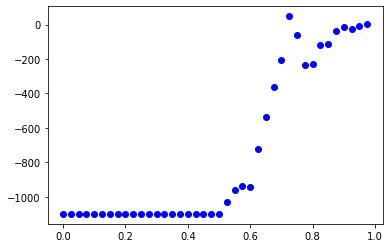

In [ ]:
x = np.arange(0,1,0.025)
y = []

for p in x:
  y.append(betting_once_threshold_hit(p,games_df))
plt.plot(x,y,'bo')

In [ ]:
np.array(y).argmax()

29

In [ ]:
x[29]

0.7250000000000001

In [ ]:
betting_once_threshold_hit(.725,games_df)

48.08882760795624

Evidence supports that always betting on the Vegas favorite is a losing proposition

# Input a probability at which if the 538 elo implied probability for a team were greater than or equal to the input, then you'd bet $15  on that team. Given these conditions, determine your payout. Whenever we bet, we are betting on the elo favorite

No arbitrage opportunities so can't bet on both teams in a game at once! 

In [ ]:
games_df.head()

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0  2016-02-07   Broncos   Panthers  ...           10      180     -210
1  2016-01-24   Broncos   Patriots  ...           18      130     -150
2  2016-01-24  Panthers  Cardinals  ...           15     -170      150
3  2016-01-17   Broncos   Steelers  ...           16     -320      265
4  2016-01-17  Panthers   Seahawks  ...           24     -145      125

[5 rows x 11 columns]

In [ ]:
def elo_betting_threshold(p, games):
  #p is a probabillity; will not be below 0.5
  #games is a dataframe 
  profit = 0
  for idx, row in games.iterrows():
    if row['probH']>= p:
      if row['probH_outcome']>0:
        #bet won
        if row['Home ML']>0:
          profit+=(15*row['Home ML']/100)
        else:
          profit+=(15/(-1*row['Home ML']/100))
      else:
        #bet lost
        profit-=15
    elif row['probA']>=p:
      if row['probA_outcome']>0:
        #bet won
        if row['Away ML']>0:
          profit+=(15*row['Away ML']/100)
        else:
          profit+=(15/(-1*row['Away ML']/100))
      else:
        profit-=15
  return profit


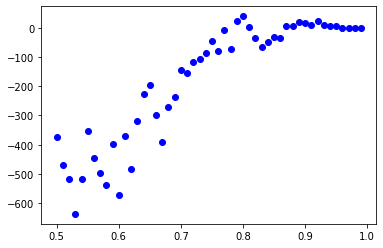

In [ ]:
x = np.arange(0.5,1,0.01)
y = []
for p in x:
  y.append(elo_betting_threshold(p,games_df))
plt.plot(x,y,'bo')

In [ ]:
elo_betting_threshold(.93,games_df)

9.704016913319238

Seems like regardless of the elo implied probabillity, betting on the favorite with equal amounts each time is not a money making proposition

# Determine profit if you bet only when the elo implied probability is greater than the ML implied probability

Assuming $15 is the bet made each time and also assuming that we bet on the ML underdog if both teams' elo implied prob is greater than the ML implied prob

In [ ]:
games_df.head()

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0  2016-02-07   Broncos   Panthers  ...           10      180     -210
1  2016-01-24   Broncos   Patriots  ...           18      130     -150
2  2016-01-24  Panthers  Cardinals  ...           15     -170      150
3  2016-01-17   Broncos   Steelers  ...           16     -320      265
4  2016-01-17  Panthers   Seahawks  ...           24     -145      125

[5 rows x 11 columns]

In [ ]:
profit = 0
for idx, row in games_df.iterrows():
  if row['Home ML']>0 and row['Away ML']<0:
    #home is underdog
    ml_implied_p = 100/(100+row['Home ML'])
    if row['probH']>ml_implied_p:
      #we bet
      if row['probH_outcome']>0:
        #won bet
        profit+=(15*row['Home ML']/100)
      else:
        profit-=15
    else:
      #bet on away team potentially
      ml_implied_p = -row['Away ML']/(100-row['Away ML'])
      if row['probA']>ml_implied_p:
        #we bet
        if row['probA_outcome']>0:
          #won bet
          profit+=(15/(-row['Away ML']/100))
        else:
          profit-=15
  elif row['Away ML']>0 and row['Home ML']<0:
    #away is underdog
    ml_implied_p = 100/(100+row['Away ML'])
    if row['probA']>ml_implied_p:
      #we bet
      if row['probA_outcome']>0:
        #won bet
        profit+=(15*row['Away ML']/100)
      else:
        #lost bet
        profit-=15
    else:
      #bet on home team potentially
      ml_implied_p = -row['Home ML']/(100-row['Home ML'])
      if row['probH']>ml_implied_p:
        #we bet
        if row['probH_outcome']>0:
          #won bet
          profit+=(15/(-row['Home ML']/100))
        else:
          #lost bet
          profit-=15
  else:
    #both MLs are negative 
    Hml_implied_p = -row['Home ML']/(100-row['Home ML'])
    Aml_implied_p = -row['Away ML']/(100-row['Away ML'])
    if row['probH']>Hml_implied_p and row['probA']>Aml_implied_p:
      #both are value bets and both are favoritees
      if row['Home ML']<=row['Away ML']:
        #home is even bigger favorites
        #bet on away team
        if row['probA_outcome']>0:
          #won bet
          profit+=(15/(-row['Away ML']/100))
        else:
          #lost bet
          profit-=15
      else: 
        #bet on homee team
        if row['probH_outcome']>0:
          #won bet
          profit+=(15/(-row['Home ML']/100))
        else:
          #lost bet
          profit-=15
    elif row['probH']>Hml_implied_p:
      #bet on home team
      if row['probH_outcome']>0:
        #won bet
        profit+=(15/(-row['Home ML']/100))
      else:
        #lost bet
        profit-=15
    elif row['probA']>Aml_implied_p:
      #bet on away team
      if row['probA_outcome']>0:
        #won bet
        profit+=(15/(-row['Away ML']/100))
      else:
        #lost bet
        profit-=15
    
print(profit)


-204.59692848137675


Betting equal amounts of money on value bets is STILL a losing proposition

# Evaluate Martingale Betting System 
Bet on only one game a day 
Min (aka start) bet = $5

In [ ]:
games_df

Date Home Team  Away Team  ...  Away Points  Home ML  Away ML
0     2016-02-07   Broncos   Panthers  ...           10      180     -210
1     2016-01-24   Broncos   Patriots  ...           18      130     -150
2     2016-01-24  Panthers  Cardinals  ...           15     -170      150
3     2016-01-17   Broncos   Steelers  ...           16     -320      265
4     2016-01-17  Panthers   Seahawks  ...           24     -145      125
...          ...       ...        ...  ...          ...      ...      ...
1599  2020-09-13     Lions      Bears  ...           27     -130      110
1600  2020-09-13   Vikings    Packers  ...           43     -125      105
1601  2020-09-13   Falcons   Seahawks  ...           38     -115     -105
1602  2020-09-13  Panthers    Raiders  ...           34      130     -150
1603  2020-09-10    Chiefs     Texans  ...           20     -450      375

[1604 rows x 11 columns]

In [ ]:
dates = []
for dt in list(games_df['Date']):
  dates.append(pd.Timestamp(dt))
print(dates)

[Timestamp('2016-02-07 00:00:00'), Timestamp('2016-01-24 00:00:00'), Timestamp('2016-01-24 00:00:00'), Timestamp('2016-01-17 00:00:00'), Timestamp('2016-01-17 00:00:00'), Timestamp('2016-01-16 00:00:00'), Timestamp('2016-01-16 00:00:00'), Timestamp('2016-01-10 00:00:00'), Timestamp('2016-01-10 00:00:00'), Timestamp('2016-01-09 00:00:00'), Timestamp('2016-01-09 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2016-01-03 00:00:00'), Timestamp('2015-12-28 00:00:00'), Timestamp('2015-12-27 00:00:00'), Timestamp('20

In [ ]:
games_df.drop(columns=['Date'],axis=1,inplace=True)
games_df['Date']=pd.Series(dates)
games_df

Home Team  Away Team     probH  ...  Home ML  Away ML       Date
0      Broncos   Panthers  0.414673  ...      180     -210 2016-02-07
1      Broncos   Patriots  0.588816  ...      130     -150 2016-01-24
2     Panthers  Cardinals  0.606100  ...     -170      150 2016-01-24
3      Broncos   Steelers  0.583407  ...     -320      265 2016-01-17
4     Panthers   Seahawks  0.545600  ...     -145      125 2016-01-17
...        ...        ...       ...  ...      ...      ...        ...
1599     Lions      Bears  0.444199  ...     -130      110 2020-09-13
1600   Vikings    Packers  0.531452  ...     -125      105 2020-09-13
1601   Falcons   Seahawks  0.489694  ...     -115     -105 2020-09-13
1602  Panthers    Raiders  0.504182  ...      130     -150 2020-09-13
1603    Chiefs     Texans  0.751961  ...     -450      375 2020-09-10

[1604 rows x 11 columns]

In [ ]:
games_df=games_df[['Date','Home Team','Away Team','Home Points','Away Points','probH','probH_outcome','probA','probA_outcome','Home ML','Away ML']]

In [ ]:
games_df

Date Home Team  Away Team  ...  probA_outcome  Home ML  Away ML
0    2016-02-07   Broncos   Panthers  ...            0.0      180     -210
1    2016-01-24   Broncos   Patriots  ...            0.0      130     -150
2    2016-01-24  Panthers  Cardinals  ...            0.0     -170      150
3    2016-01-17   Broncos   Steelers  ...            0.0     -320      265
4    2016-01-17  Panthers   Seahawks  ...            0.0     -145      125
...         ...       ...        ...  ...            ...      ...      ...
1599 2020-09-13     Lions      Bears  ...            1.0     -130      110
1600 2020-09-13   Vikings    Packers  ...            1.0     -125      105
1601 2020-09-13   Falcons   Seahawks  ...            1.0     -115     -105
1602 2020-09-13  Panthers    Raiders  ...            1.0      130     -150
1603 2020-09-10    Chiefs     Texans  ...            0.0     -450      375

[1604 rows x 11 columns]

In [ ]:
games_df.sort_values(by=['Date'],axis=0,inplace=True,)

In [ ]:
games_df

Date   Home Team   Away Team  ...  probA_outcome  Home ML  Away ML
266  2015-09-10    Patriots    Steelers  ...            0.0     -365      300
253  2015-09-13     Cowboys      Giants  ...            0.0     -310      245
254  2015-09-13  Buccaneers      Titans  ...            1.0     -160      140
255  2015-09-13     Raiders     Bengals  ...            1.0      135     -155
256  2015-09-13     Broncos      Ravens  ...            0.0     -230      190
...         ...         ...         ...  ...            ...      ...      ...
1339 2021-01-17      Chiefs      Browns  ...            0.0     -410      340
1338 2021-01-17      Saints  Buccaneers  ...            1.0     -150      130
1336 2021-01-24      Chiefs       Bills  ...            0.0     -160      140
1337 2021-01-24     Packers  Buccaneers  ...            1.0     -180      160
1335 2021-02-07  Buccaneers      Chiefs  ...            0.0      140     -150

[1604 rows x 11 columns]

In [ ]:
games_df.reset_index(inplace=True)

In [ ]:
games_df.drop(columns='index',axis=1,inplace=True)
games_df

Date   Home Team   Away Team  ...  probA_outcome  Home ML  Away ML
0    2015-09-10    Patriots    Steelers  ...            0.0     -365      300
1    2015-09-13     Cowboys      Giants  ...            0.0     -310      245
2    2015-09-13  Buccaneers      Titans  ...            1.0     -160      140
3    2015-09-13     Raiders     Bengals  ...            1.0      135     -155
4    2015-09-13     Broncos      Ravens  ...            0.0     -230      190
...         ...         ...         ...  ...            ...      ...      ...
1599 2021-01-17      Chiefs      Browns  ...            0.0     -410      340
1600 2021-01-17      Saints  Buccaneers  ...            1.0     -150      130
1601 2021-01-24      Chiefs       Bills  ...            0.0     -160      140
1602 2021-01-24     Packers  Buccaneers  ...            1.0     -180      160
1603 2021-02-07  Buccaneers      Chiefs  ...            0.0      140     -150

[1604 rows x 11 columns]

In [ ]:
unique_dates = list(set(games_df['Date']))

In [ ]:
import copy

In [ ]:
cp = copy.deepcopy(games_df)
cp.loc[0,'Home Team']='Cheats'

In [ ]:
cp

Date   Home Team   Away Team  ...  probA_outcome  Home ML  Away ML
0    2015-09-10      Cheats    Steelers  ...            0.0     -365      300
1    2015-09-13     Cowboys      Giants  ...            0.0     -310      245
2    2015-09-13  Buccaneers      Titans  ...            1.0     -160      140
3    2015-09-13     Raiders     Bengals  ...            1.0      135     -155
4    2015-09-13     Broncos      Ravens  ...            0.0     -230      190
...         ...         ...         ...  ...            ...      ...      ...
1599 2021-01-17      Chiefs      Browns  ...            0.0     -410      340
1600 2021-01-17      Saints  Buccaneers  ...            1.0     -150      130
1601 2021-01-24      Chiefs       Bills  ...            0.0     -160      140
1602 2021-01-24     Packers  Buccaneers  ...            1.0     -180      160
1603 2021-02-07  Buccaneers      Chiefs  ...            0.0      140     -150

[1604 rows x 11 columns]

In [ ]:
games_df

Date   Home Team   Away Team  ...  probA_outcome  Home ML  Away ML
0    2015-09-10    Patriots    Steelers  ...            0.0     -365      300
1    2015-09-13     Cowboys      Giants  ...            0.0     -310      245
2    2015-09-13  Buccaneers      Titans  ...            1.0     -160      140
3    2015-09-13     Raiders     Bengals  ...            1.0      135     -155
4    2015-09-13     Broncos      Ravens  ...            0.0     -230      190
...         ...         ...         ...  ...            ...      ...      ...
1599 2021-01-17      Chiefs      Browns  ...            0.0     -410      340
1600 2021-01-17      Saints  Buccaneers  ...            1.0     -150      130
1601 2021-01-24      Chiefs       Bills  ...            0.0     -160      140
1602 2021-01-24     Packers  Buccaneers  ...            1.0     -180      160
1603 2021-02-07  Buccaneers      Chiefs  ...            0.0      140     -150

[1604 rows x 11 columns]

In [ ]:
seen = []
curBet = 5
profit = 0
maxDown = 0
min_idx = -1

for dt in unique_dates:
  #select a game on each unique date by choosing the underdog with the odds closest to +100
  options = copy.deepcopy(games_df.loc[games_df['Date']==dt])
  options.reset_index(inplace=True)
  min = 500
  set_minidx = False
  for idx, row in options.iterrows():
    if row['Away ML']>100:
      #away underdog
      if row['Away ML']<min:
        min = row['Away ML']
        set_minidx=True
        min_idx=idx #relative to options df
    elif row['Home ML']>100:
      #home underdog
      if row['Home ML']:
        min = row['Home ML']
        set_minidx=True
        min_idx=idx #relative to options df
  if set_minidx:
    bet_game = options.iloc[min_idx]
    if bet_game['Away ML']>100:
      #away underdog
      if bet_game['probA_outcome']>0:
        #won bet
        profit+=(row['Away ML']*curBet/100)
        curBet=5
      else:
        #lost bet
        profit-=curBet
        curBet*=2
        if profit<maxDown:
          maxDown=profit
    else:
      #home underdog
      if bet_game['probH_outcome']>0:
        #won bet
        profit+=(row['Home ML']*curBet/100)
        curBet=5
      else:
        profit-=curBet
        curBet*=2
        if profit<maxDown:
          maxDown=profit
print(maxDown)
print(profit)

-23174.35
161510.1


Martingale Strategy made money! Only needed ~5500$ in account to fund the strategy

Suppose I only deposit $1000 into my account that I will be using for the Martingale Strategy. Recalculate profit. Assume that bets resets to min size bet if I can't afford a doubling of the bet.

In [ ]:
seen = []
curBet = 5
act_amt = 1000
min_idx = -1

for dt in unique_dates:
  #select a game on each unique date by choosing the underdog with the odds closest to +100
  if act_amt<=0:
    break
  options = copy.deepcopy(games_df.loc[games_df['Date']==dt])
  options.reset_index(inplace=True)
  min = 500
  set_minidx = False
  for idx, row in options.iterrows():
    if row['Away ML']>100:
      #away underdog
      if row['Away ML']<min:
        min = row['Away ML']
        set_minidx=True
        min_idx=idx #relative to options df
    elif row['Home ML']>100:
      #home underdog
      if row['Home ML']<min:
        min = row['Home ML']
        set_minidx=True
        min_idx=idx #relative to options df
  if set_minidx:
    bet_game = options.iloc[min_idx]
    if bet_game['Away ML']>100:
      #away underdog
      if bet_game['probA_outcome']>0:
        #won bet
        act_amt+=(row['Away ML']*curBet/100)
        curBet=5
      else:
        #lost bet
        act_amt-=curBet
        if act_amt-(2*curBet)>0:
          curBet*=2
        else:
          curBet=act_amt
    else:
      #home underdog
      if bet_game['probH_outcome']>0:
        #won bet
        act_amt+=(row['Home ML']*curBet/100)
        curBet=5
      else:
        act_amt-=curBet
        if act_amt-(2*curBet)>0:
          curBet*=2
        else:
          curBet = act_amt
print(act_amt)

0.0


Evaluate betting $5 on underdog to a certain max ML 

In [ ]:
def ML_underdog_thres(ml, games_df):
  profit = 0
  for idx, row in games_df.iterrows():
    if row['Away ML']>100 and row['Away ML']<ml:
      if row['probA_outcome']>0:
        profit+=(5*row['Away ML']/100)
      else:
        profit-=5
    elif row['Home ML']>100 and row['Home ML']<ml:
      if row['probH_outcome']>0:
        profit+=(5*row['Home ML']/100)
      else:
        profit-=5
  return profit
mls = [150,200,250,300,350,400]
for ml in mls:
  print(ML_underdog_thres(ml,games_df))

-7.800000000000004
83.9
67.44999999999999
-211.10000000000002
-198.75000000000003
-237.95


Betting 5$ on all underdogs whose odds were less than 250 but greater than or equal to 150 was profitable ===> sweet range??!

Plot histogram of underdogs' payout/wager ratio

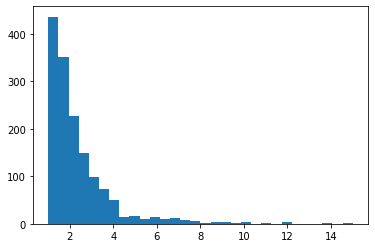

In [ ]:
uds = []
for idx, row in games_df.iterrows():
  if row['Away ML']>100:
    uds.append(row['Away ML']/100)
  elif row['Home ML']>100:
    uds.append(row['Home ML']/100)
bins=plt.hist(uds,30)

In [ ]:
bins[1]

array([ 1.01      ,  1.47633333,  1.94266667,  2.409     ,  2.87533333,
        3.34166667,  3.808     ,  4.27433333,  4.74066667,  5.207     ,
        5.67333333,  6.13966667,  6.606     ,  7.07233333,  7.53866667,
        8.005     ,  8.47133333,  8.93766667,  9.404     ,  9.87033333,
       10.33666667, 10.803     , 11.26933333, 11.73566667, 12.202     ,
       12.66833333, 13.13466667, 13.601     , 14.06733333, 14.53366667,
       15.        ])

In [ ]:
len(bins[1])==31

True

In [ ]:
bin_edges = bins[1][1:] #30 left edgee of histogram bins and 1 right edge of last bin 

#about 50 games per bin 
#let's see what the win rate is per bin
right_edge_dict = {}
idx = 0
for num in bin_edges[1:]:
  right_edge_dict[idx]=num
  idx+=1

bin_class = []
for idx, row in games_df.iterrows():
  if row['Away ML']>100:
    idx = 0
    while (idx < len(bin_edges) and row['Away ML']/100 > bin_edges[idx]):
      idx+=1
    bin_class.append(idx)
  elif row['Home ML']>100:
    idx = 0
    while (idx < len(bin_edges) and row['Home ML']/100 > bin_edges[idx]):
      idx+=1
    bin_class.append(idx)
games_df['Bin Class']=pd.Series(bin_class) #will take on value from 0-29
games_df.head()

Date   Home Team Away Team  ...  Home ML  Away ML  Bin Class
0 2015-09-10    Patriots  Steelers  ...     -365      300        4.0
1 2015-09-13     Cowboys    Giants  ...     -310      245        3.0
2 2015-09-13  Buccaneers    Titans  ...     -160      140        0.0
3 2015-09-13     Raiders   Bengals  ...      135     -155        0.0
4 2015-09-13     Broncos    Ravens  ...     -230      190        1.0

[5 rows x 12 columns]

How good of a tool is Elo?

In [ ]:
games_df.drop(columns=['Bin Class'],inplace=True,axis=1)

In [ ]:
probHround=[]
probAround = []
for idx, row in games_df.iterrows():
  probHround.append(round(row['probH']*100))
  probAround.append(round(row['probA']*100))
games_df['probH Round']=pd.Series(probHround)
games_df['probA Round']= pd.Series(probAround)
games_df.head()


Date   Home Team Away Team  ...  Away ML  probH Round  probA Round
0 2015-09-10    Patriots  Steelers  ...      300           72           28
1 2015-09-13     Cowboys    Giants  ...      245           73           27
2 2015-09-13  Buccaneers    Titans  ...      140           64           36
3 2015-09-13     Raiders   Bengals  ...     -155           38           62
4 2015-09-13     Broncos    Ravens  ...      190           62           38

[5 rows x 13 columns]

In [ ]:
#build a dict by every 10 percentile ie (0-10,10-20, ..)
elo_percentile_dict = {0: [], 10: [], 20: [], 30: [], 40: [], 50: [], 60: [], 70: [], 80: [], 90: [], 100: []}
for idx, row in games_df.iterrows():
  tens_placeH = int(row['probH Round']/10)
  tens_placeA = int(row['probA Round']/10 )
  for i in range(10):
    if tens_placeH == i:
      elo_percentile_dict[i*10].append(idx)
    if tens_placeA == i:
      elo_percentile_dict[i*10].append(idx)
elo_percentile_dict

{0: [40,
  123,
  214,
  219,
  516,
  784,
  787,
  1106,
  1108,
  1270,
  1441,
  1475,
  1490,
  1557],
 10: [36,
  75,
  79,
  102,
  105,
  109,
  119,
  122,
  136,
  141,
  144,
  145,
  157,
  159,
  162,
  171,
  179,
  195,
  202,
  204,
  227,
  238,
  241,
  242,
  243,
  246,
  251,
  273,
  280,
  291,
  296,
  320,
  345,
  359,
  367,
  395,
  400,
  407,
  416,
  423,
  426,
  436,
  440,
  457,
  470,
  475,
  481,
  482,
  483,
  485,
  497,
  512,
  521,
  528,
  554,
  563,
  572,
  581,
  584,
  617,
  621,
  648,
  650,
  651,
  677,
  705,
  707,
  708,
  715,
  741,
  752,
  754,
  755,
  758,
  764,
  767,
  773,
  783,
  786,
  795,
  798,
  805,
  830,
  836,
  864,
  912,
  913,
  931,
  932,
  938,
  962,
  968,
  972,
  979,
  981,
  1000,
  1037,
  1041,
  1043,
  1045,
  1047,
  1049,
  1054,
  1055,
  1089,
  1091,
  1122,
  1132,
  1135,
  1144,
  1146,
  1158,
  1165,
  1174,
  1176,
  1178,
  1184,
  1207,
  1210,
  1214,
  1217,
  1220,
  1222,
  

In [ ]:
for item in elo_percentile_dict.items():
  print(str(item[0])+': '+str(len(item[1])))

0: 14
10: 170
20: 331
30: 510
40: 548
50: 558
60: 527
70: 342
80: 183
90: 25
100: 0


Most percentiles except the 0th and 90th have plenty of samples

In [ ]:
for item in elo_percentile_dict.items():
  percentile = item[0]
  if percentile==100:
    break
  wins = 0
  percent_sum = 0
  list_pct = item[1]
  for idx in list_pct:
    row = games_df.iloc[idx]
    if int(row['probH Round']/10)*10 == percentile:
      percent_sum+=row['probH Round']
      if row['probH_outcome']>0:
        #won
        wins+=1
    else:
      percent_sum+=row['probA Round']
      if row['probA_outcome']>0:
        #won
        wins+=1
  print(str(percentile)+': '+ str((wins*100/len(list_pct)))[:4] + '-- Avg: '+str(percent_sum/len(list_pct))[:4])


0: 7.14-- Avg: 7.85
10: 15.8-- Avg: 15.7
20: 27.4-- Avg: 24.9
30: 36.8-- Avg: 34.6
40: 44.3-- Avg: 44.4
50: 55.5-- Avg: 54.5
60: 63.5-- Avg: 64.5
70: 70.4-- Avg: 74.2
80: 81.9-- Avg: 83.3
90: 92.0-- Avg: 91.2


538 Elo does it's job relatively well! Teams with a percentile chance in the 20s won 27.4% of their games; teams with a percentile chance in the 60s won 63.5% of their games. Additionally, the percentile results track pretty well with the average percentage given to teams in those percentiles

In [ ]:
seasons_start_elo = pd.DataFrame(columns=['Team','15/16','16/17','17/18','18/19','19/20','20/21'])

In [ ]:
seasons_start_elo['Team']=pd.Series(list(team2name.keys()))

In [ ]:
seasons_start_elo

Team 15/16 16/17 17/18 18/19 19/20 20/21
0        Buffalo   NaN   NaN   NaN   NaN   NaN   NaN
1          Miami   NaN   NaN   NaN   NaN   NaN   NaN
2         NYJets   NaN   NaN   NaN   NaN   NaN   NaN
3     NewEngland   NaN   NaN   NaN   NaN   NaN   NaN
4      Baltimore   NaN   NaN   NaN   NaN   NaN   NaN
5      Cleveland   NaN   NaN   NaN   NaN   NaN   NaN
6     Cincinnati   NaN   NaN   NaN   NaN   NaN   NaN
7     Pittsburgh   NaN   NaN   NaN   NaN   NaN   NaN
8   Indianapolis   NaN   NaN   NaN   NaN   NaN   NaN
9      Tennessee   NaN   NaN   NaN   NaN   NaN   NaN
10       Houston   NaN   NaN   NaN   NaN   NaN   NaN
11  Jacksonville   NaN   NaN   NaN   NaN   NaN   NaN
12    KansasCity   NaN   NaN   NaN   NaN   NaN   NaN
13    LAChargers   NaN   NaN   NaN   NaN   NaN   NaN
14       Oakland   NaN   NaN   NaN   NaN   NaN   NaN
15        Denver   NaN   NaN   NaN   NaN   NaN   NaN
16  Philadelphia   NaN   NaN   NaN   NaN   NaN   NaN
17      NYGiants   NaN   NaN   NaN   NaN   NaN   NaN
18        Dallas   NaN   NaN   NaN   NaN   NaN   NaN
19    Washington   NaN   NaN   NaN   NaN   NaN   NaN
20      GreenBay   NaN   NaN   NaN   NaN   NaN   NaN
21     Minnesota   NaN   NaN   NaN   NaN   NaN   NaN
22       Chicago   NaN   NaN   NaN   NaN   NaN   NaN
23       Detroit   NaN   NaN   NaN   NaN   NaN   NaN
24      TampaBay   NaN   NaN   NaN   NaN   NaN   NaN
25    NewOrleans   NaN   NaN   NaN   NaN   NaN   NaN
26       Atlanta   NaN   NaN   NaN   NaN   NaN   NaN
27      Carolina   NaN   NaN   NaN   NaN   NaN   NaN
28       Seattle   NaN   NaN   NaN   NaN   NaN   NaN
29  SanFrancisco   NaN   NaN   NaN   NaN   NaN   NaN
30       Arizona   NaN   NaN   NaN   NaN   NaN   NaN
31        LARams   NaN   NaN   NaN   NaN   NaN   NaN
32      SanDiego   NaN   NaN   NaN   NaN   NaN   NaN
33    LosAngeles   NaN   NaN   NaN   NaN   NaN   NaN
34      St.Louis   NaN   NaN   NaN   NaN   NaN   NaN
35      LasVegas   NaN   NaN   NaN   NaN   NaN   NaN
36     LVRaiders   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
seasons_start_elo.drop(labels=[14,36,34,33],axis=0,inplace=True)
seasons_start_elo.reset_index()


index          Team 15/16 16/17 17/18 18/19 19/20 20/21
0       0       Buffalo   NaN   NaN   NaN   NaN   NaN   NaN
1       1         Miami   NaN   NaN   NaN   NaN   NaN   NaN
2       2        NYJets   NaN   NaN   NaN   NaN   NaN   NaN
3       3    NewEngland   NaN   NaN   NaN   NaN   NaN   NaN
4       4     Baltimore   NaN   NaN   NaN   NaN   NaN   NaN
5       5     Cleveland   NaN   NaN   NaN   NaN   NaN   NaN
6       6    Cincinnati   NaN   NaN   NaN   NaN   NaN   NaN
7       7    Pittsburgh   NaN   NaN   NaN   NaN   NaN   NaN
8       8  Indianapolis   NaN   NaN   NaN   NaN   NaN   NaN
9       9     Tennessee   NaN   NaN   NaN   NaN   NaN   NaN
10     10       Houston   NaN   NaN   NaN   NaN   NaN   NaN
11     11  Jacksonville   NaN   NaN   NaN   NaN   NaN   NaN
12     12    KansasCity   NaN   NaN   NaN   NaN   NaN   NaN
13     13    LAChargers   NaN   NaN   NaN   NaN   NaN   NaN
14     15        Denver   NaN   NaN   NaN   NaN   NaN   NaN
15     16  Philadelphia   NaN   NaN   NaN   NaN   NaN   NaN
16     17      NYGiants   NaN   NaN   NaN   NaN   NaN   NaN
17     18        Dallas   NaN   NaN   NaN   NaN   NaN   NaN
18     19    Washington   NaN   NaN   NaN   NaN   NaN   NaN
19     20      GreenBay   NaN   NaN   NaN   NaN   NaN   NaN
20     21     Minnesota   NaN   NaN   NaN   NaN   NaN   NaN
21     22       Chicago   NaN   NaN   NaN   NaN   NaN   NaN
22     23       Detroit   NaN   NaN   NaN   NaN   NaN   NaN
23     24      TampaBay   NaN   NaN   NaN   NaN   NaN   NaN
24     25    NewOrleans   NaN   NaN   NaN   NaN   NaN   NaN
25     26       Atlanta   NaN   NaN   NaN   NaN   NaN   NaN
26     27      Carolina   NaN   NaN   NaN   NaN   NaN   NaN
27     28       Seattle   NaN   NaN   NaN   NaN   NaN   NaN
28     29  SanFrancisco   NaN   NaN   NaN   NaN   NaN   NaN
29     30       Arizona   NaN   NaN   NaN   NaN   NaN   NaN
30     31        LARams   NaN   NaN   NaN   NaN   NaN   NaN
31     32      SanDiego   NaN   NaN   NaN   NaN   NaN   NaN
32     35      LasVegas   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
seasons_start_elo

Team 15/16 16/17 17/18 18/19 19/20 20/21
0        Buffalo   NaN   NaN   NaN   NaN   NaN   NaN
1          Miami   NaN   NaN   NaN   NaN   NaN   NaN
2         NYJets   NaN   NaN   NaN   NaN   NaN   NaN
3     NewEngland   NaN   NaN   NaN   NaN   NaN   NaN
4      Baltimore   NaN   NaN   NaN   NaN   NaN   NaN
5      Cleveland   NaN   NaN   NaN   NaN   NaN   NaN
6     Cincinnati   NaN   NaN   NaN   NaN   NaN   NaN
7     Pittsburgh   NaN   NaN   NaN   NaN   NaN   NaN
8   Indianapolis   NaN   NaN   NaN   NaN   NaN   NaN
9      Tennessee   NaN   NaN   NaN   NaN   NaN   NaN
10       Houston   NaN   NaN   NaN   NaN   NaN   NaN
11  Jacksonville   NaN   NaN   NaN   NaN   NaN   NaN
12    KansasCity   NaN   NaN   NaN   NaN   NaN   NaN
13    LAChargers   NaN   NaN   NaN   NaN   NaN   NaN
15        Denver   NaN   NaN   NaN   NaN   NaN   NaN
16  Philadelphia   NaN   NaN   NaN   NaN   NaN   NaN
17      NYGiants   NaN   NaN   NaN   NaN   NaN   NaN
18        Dallas   NaN   NaN   NaN   NaN   NaN   NaN
19    Washington   NaN   NaN   NaN   NaN   NaN   NaN
20      GreenBay   NaN   NaN   NaN   NaN   NaN   NaN
21     Minnesota   NaN   NaN   NaN   NaN   NaN   NaN
22       Chicago   NaN   NaN   NaN   NaN   NaN   NaN
23       Detroit   NaN   NaN   NaN   NaN   NaN   NaN
24      TampaBay   NaN   NaN   NaN   NaN   NaN   NaN
25    NewOrleans   NaN   NaN   NaN   NaN   NaN   NaN
26       Atlanta   NaN   NaN   NaN   NaN   NaN   NaN
27      Carolina   NaN   NaN   NaN   NaN   NaN   NaN
28       Seattle   NaN   NaN   NaN   NaN   NaN   NaN
29  SanFrancisco   NaN   NaN   NaN   NaN   NaN   NaN
30       Arizona   NaN   NaN   NaN   NaN   NaN   NaN
31        LARams   NaN   NaN   NaN   NaN   NaN   NaN
32      SanDiego   NaN   NaN   NaN   NaN   NaN   NaN
35      LasVegas   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
seasons_start_elo.drop(labels=[32],inplace=True,axis=0)
seasons_start_elo

Team 15/16 16/17 17/18 18/19 19/20 20/21
0        Buffalo   NaN   NaN   NaN   NaN   NaN   NaN
1          Miami   NaN   NaN   NaN   NaN   NaN   NaN
2         NYJets   NaN   NaN   NaN   NaN   NaN   NaN
3     NewEngland   NaN   NaN   NaN   NaN   NaN   NaN
4      Baltimore   NaN   NaN   NaN   NaN   NaN   NaN
5      Cleveland   NaN   NaN   NaN   NaN   NaN   NaN
6     Cincinnati   NaN   NaN   NaN   NaN   NaN   NaN
7     Pittsburgh   NaN   NaN   NaN   NaN   NaN   NaN
8   Indianapolis   NaN   NaN   NaN   NaN   NaN   NaN
9      Tennessee   NaN   NaN   NaN   NaN   NaN   NaN
10       Houston   NaN   NaN   NaN   NaN   NaN   NaN
11  Jacksonville   NaN   NaN   NaN   NaN   NaN   NaN
12    KansasCity   NaN   NaN   NaN   NaN   NaN   NaN
13    LAChargers   NaN   NaN   NaN   NaN   NaN   NaN
15        Denver   NaN   NaN   NaN   NaN   NaN   NaN
16  Philadelphia   NaN   NaN   NaN   NaN   NaN   NaN
17      NYGiants   NaN   NaN   NaN   NaN   NaN   NaN
18        Dallas   NaN   NaN   NaN   NaN   NaN   NaN
19    Washington   NaN   NaN   NaN   NaN   NaN   NaN
20      GreenBay   NaN   NaN   NaN   NaN   NaN   NaN
21     Minnesota   NaN   NaN   NaN   NaN   NaN   NaN
22       Chicago   NaN   NaN   NaN   NaN   NaN   NaN
23       Detroit   NaN   NaN   NaN   NaN   NaN   NaN
24      TampaBay   NaN   NaN   NaN   NaN   NaN   NaN
25    NewOrleans   NaN   NaN   NaN   NaN   NaN   NaN
26       Atlanta   NaN   NaN   NaN   NaN   NaN   NaN
27      Carolina   NaN   NaN   NaN   NaN   NaN   NaN
28       Seattle   NaN   NaN   NaN   NaN   NaN   NaN
29  SanFrancisco   NaN   NaN   NaN   NaN   NaN   NaN
30       Arizona   NaN   NaN   NaN   NaN   NaN   NaN
31        LARams   NaN   NaN   NaN   NaN   NaN   NaN
35      LasVegas   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
seasons_start_elo.reset_index(inplace=True)
seasons_start_elo

index          Team 15/16 16/17 17/18 18/19 19/20 20/21
0       0       Buffalo   NaN   NaN   NaN   NaN   NaN   NaN
1       1         Miami   NaN   NaN   NaN   NaN   NaN   NaN
2       2        NYJets   NaN   NaN   NaN   NaN   NaN   NaN
3       3    NewEngland   NaN   NaN   NaN   NaN   NaN   NaN
4       4     Baltimore   NaN   NaN   NaN   NaN   NaN   NaN
5       5     Cleveland   NaN   NaN   NaN   NaN   NaN   NaN
6       6    Cincinnati   NaN   NaN   NaN   NaN   NaN   NaN
7       7    Pittsburgh   NaN   NaN   NaN   NaN   NaN   NaN
8       8  Indianapolis   NaN   NaN   NaN   NaN   NaN   NaN
9       9     Tennessee   NaN   NaN   NaN   NaN   NaN   NaN
10     10       Houston   NaN   NaN   NaN   NaN   NaN   NaN
11     11  Jacksonville   NaN   NaN   NaN   NaN   NaN   NaN
12     12    KansasCity   NaN   NaN   NaN   NaN   NaN   NaN
13     13    LAChargers   NaN   NaN   NaN   NaN   NaN   NaN
14     15        Denver   NaN   NaN   NaN   NaN   NaN   NaN
15     16  Philadelphia   NaN   NaN   NaN   NaN   NaN   NaN
16     17      NYGiants   NaN   NaN   NaN   NaN   NaN   NaN
17     18        Dallas   NaN   NaN   NaN   NaN   NaN   NaN
18     19    Washington   NaN   NaN   NaN   NaN   NaN   NaN
19     20      GreenBay   NaN   NaN   NaN   NaN   NaN   NaN
20     21     Minnesota   NaN   NaN   NaN   NaN   NaN   NaN
21     22       Chicago   NaN   NaN   NaN   NaN   NaN   NaN
22     23       Detroit   NaN   NaN   NaN   NaN   NaN   NaN
23     24      TampaBay   NaN   NaN   NaN   NaN   NaN   NaN
24     25    NewOrleans   NaN   NaN   NaN   NaN   NaN   NaN
25     26       Atlanta   NaN   NaN   NaN   NaN   NaN   NaN
26     27      Carolina   NaN   NaN   NaN   NaN   NaN   NaN
27     28       Seattle   NaN   NaN   NaN   NaN   NaN   NaN
28     29  SanFrancisco   NaN   NaN   NaN   NaN   NaN   NaN
29     30       Arizona   NaN   NaN   NaN   NaN   NaN   NaN
30     31        LARams   NaN   NaN   NaN   NaN   NaN   NaN
31     35      LasVegas   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
seasons_start_elo.drop(labels=['index'],axis=1,inplace=True)

In [ ]:
seasons_start_elo.set_index('Team',inplace=True)
seasons_start_elo

15/16 16/17 17/18 18/19 19/20 20/21
Team                                            
Buffalo        NaN   NaN   NaN   NaN   NaN   NaN
Miami          NaN   NaN   NaN   NaN   NaN   NaN
NYJets         NaN   NaN   NaN   NaN   NaN   NaN
NewEngland     NaN   NaN   NaN   NaN   NaN   NaN
Baltimore      NaN   NaN   NaN   NaN   NaN   NaN
Cleveland      NaN   NaN   NaN   NaN   NaN   NaN
Cincinnati     NaN   NaN   NaN   NaN   NaN   NaN
Pittsburgh     NaN   NaN   NaN   NaN   NaN   NaN
Indianapolis   NaN   NaN   NaN   NaN   NaN   NaN
Tennessee      NaN   NaN   NaN   NaN   NaN   NaN
Houston        NaN   NaN   NaN   NaN   NaN   NaN
Jacksonville   NaN   NaN   NaN   NaN   NaN   NaN
KansasCity     NaN   NaN   NaN   NaN   NaN   NaN
LAChargers     NaN   NaN   NaN   NaN   NaN   NaN
Denver         NaN   NaN   NaN   NaN   NaN   NaN
Philadelphia   NaN   NaN   NaN   NaN   NaN   NaN
NYGiants       NaN   NaN   NaN   NaN   NaN   NaN
Dallas         NaN   NaN   NaN   NaN   NaN   NaN
Washington     NaN   NaN   NaN   NaN   NaN   NaN
GreenBay       NaN   NaN   NaN   NaN   NaN   NaN
Minnesota      NaN   NaN   NaN   NaN   NaN   NaN
Chicago        NaN   NaN   NaN   NaN   NaN   NaN
Detroit        NaN   NaN   NaN   NaN   NaN   NaN
TampaBay       NaN   NaN   NaN   NaN   NaN   NaN
NewOrleans     NaN   NaN   NaN   NaN   NaN   NaN
Atlanta        NaN   NaN   NaN   NaN   NaN   NaN
Carolina       NaN   NaN   NaN   NaN   NaN   NaN
Seattle        NaN   NaN   NaN   NaN   NaN   NaN
SanFrancisco   NaN   NaN   NaN   NaN   NaN   NaN
Arizona        NaN   NaN   NaN   NaN   NaN   NaN
LARams         NaN   NaN   NaN   NaN   NaN   NaN
LasVegas       NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
seasons_start_elo.index

Index(['Buffalo', 'Miami', 'NYJets', 'NewEngland', 'Baltimore', 'Cleveland',
       'Cincinnati', 'Pittsburgh', 'Indianapolis', 'Tennessee', 'Houston',
       'Jacksonville', 'KansasCity', 'LAChargers', 'Denver', 'Philadelphia',
       'NYGiants', 'Dallas', 'Washington', 'GreenBay', 'Minnesota', 'Chicago',
       'Detroit', 'TampaBay', 'NewOrleans', 'Atlanta', 'Carolina', 'Seattle',
       'SanFrancisco', 'Arizona', 'LARams', 'LasVegas'],
      dtype='object', name='Team')

In [ ]:
input_dict={'Buffalo': [1534,1519,1484,1502,1448,1511],
'Miami': [1484,1439,1509,1450,1415,1414],
'NYJets': [1440,1522,1452,1432,1385,1458],
'NewEngland': [1664,1605,1687,1651,1641,1582],
'Baltimore': [1577,1475,1491,1535,1571,1638],
'Cleveland': [1422,1395,1336,1302,1456,1441],
'Cincinnati': [1540,1578,1516,1475,1429,1383],
'Pittsburgh':[ 1563,1591,1599,1596,1572,1512],
'Indianapolis': [1581,1484,1514,1407,1561,1483],
'Tennessee': [1339,1349,1460,1496,1519,1599],
'Houston': [1505,1506,1502,1398,1515,1528],
'Jacksonville': [1357,1389,1382,1535,1455,1439],
'KansasCity': [1540,1621,1613,1571,1602,1665],
'LAChargers': [1523,1438,1437,1545,1586,1470],
'Denver': [1595,1637,1556,1450,1449,1496],
'Philadelphia': [1545,1488,1511,1647,1582,1529],
'NYGiants': [1480,1469,1530,1412,1443,1391],
'Dallas': [1590,1446,1569,1547,1547,1532],
'Washington': [1371,1496,1504,1472,1441,1368],
'GreenBay': [1601,1582,1587,1472,1455,1582],
'Minnesota':[1479,1567,1498,1602,1538,1571],
'Chicago': [1419,1444,1384,1444,1589,1525],
'Detroit': [1538,1503,1501,1524,1491,1405],
'TampaBay': [1377,1412,1506,1469,1445,1499],
'NewOrleans': [1486,1464,1498,1584,1611,1610],
'Atlanta': [1462,1486,1617,1601,1520,1535],
'Carolina': [1536,1634,1527,1550,1519,1418],
'Seattle': [1678,1635,1571,1545,1565,1547],
'SanFrancisco': [1529,1437,1353,1469,1423,1604],
'Arizona': [1541,1613,1537,1483,1384,1443],
'LARams': [1477,1479,1399,1530,1598,1548],
'LasVegas': [1389,1455,1530,1465,1405,1437]}

In [ ]:
for team in seasons_start_elo.index:
  start_elos = input_dict[team]
  for idx,val in enumerate(start_elos):
    cur_elo = start_elos[idx]
    if idx == 0:  
      seasons_start_elo.loc[team,'15/16']=cur_elo
    elif idx == 1:
      seasons_start_elo.loc[team,'16/17']=cur_elo
    elif idx == 2:
      seasons_start_elo.loc[team,'17/18']=cur_elo
    elif idx == 3:
      seasons_start_elo.loc[team,'18/19']=cur_elo
    elif idx == 4:
      seasons_start_elo.loc[team,'19/20']=cur_elo
    else:
      seasons_start_elo.loc[team,'20/21']=cur_elo

    

In [ ]:
seasons_start_elo

15/16 16/17 17/18 18/19 19/20 20/21
Team                                            
Buffalo       1534  1519  1484  1502  1448  1511
Miami         1484  1439  1509  1450  1415  1414
NYJets        1440  1522  1452  1432  1385  1458
NewEngland    1664  1605  1687  1651  1641  1582
Baltimore     1577  1475  1491  1535  1571  1638
Cleveland     1422  1395  1336  1302  1456  1441
Cincinnati    1540  1578  1516  1475  1429  1383
Pittsburgh    1563  1591  1599  1596  1572  1512
Indianapolis  1581  1484  1514  1407  1561  1483
Tennessee     1339  1349  1460  1496  1519  1599
Houston       1505  1506  1502  1398  1515  1528
Jacksonville  1357  1389  1382  1535  1455  1439
KansasCity    1540  1621  1613  1571  1602  1665
LAChargers    1523  1438  1437  1545  1586  1470
Denver        1595  1637  1556  1450  1449  1496
Philadelphia  1545  1488  1511  1647  1582  1529
NYGiants      1480  1469  1530  1412  1443  1391
Dallas        1590  1446  1569  1547  1547  1532
Washington    1371  1496  1504  1472  1441  1368
GreenBay      1601  1582  1587  1472  1455  1582
Minnesota     1479  1567  1498  1602  1538  1571
Chicago       1419  1444  1384  1444  1589  1525
Detroit       1538  1503  1501  1524  1491  1405
TampaBay      1377  1412  1506  1469  1445  1499
NewOrleans    1486  1464  1498  1584  1611  1610
Atlanta       1462  1486  1617  1601  1520  1535
Carolina      1536  1634  1527  1550  1519  1418
Seattle       1678  1635  1571  1545  1565  1547
SanFrancisco  1529  1437  1353  1469  1423  1604
Arizona       1541  1613  1537  1483  1384  1443
LARams        1477  1479  1399  1530  1598  1548
LasVegas      1389  1455  1530  1465  1405  1437

In [ ]:
games_df

Date   Home Team   Away Team  ...  Away ML  probH Round  probA Round
0    2015-09-10    Patriots    Steelers  ...      300           72           28
1    2015-09-13     Cowboys      Giants  ...      245           73           27
2    2015-09-13  Buccaneers      Titans  ...      140           64           36
3    2015-09-13     Raiders     Bengals  ...     -155           38           62
4    2015-09-13     Broncos      Ravens  ...      190           62           38
...         ...         ...         ...  ...      ...          ...          ...
1599 2021-01-17      Chiefs      Browns  ...      340           79           21
1600 2021-01-17      Saints  Buccaneers  ...      130           71           29
1601 2021-01-24      Chiefs       Bills  ...      140           54           46
1602 2021-01-24     Packers  Buccaneers  ...      160           63           37
1603 2021-02-07  Buccaneers      Chiefs  ...     -150           47           53

[1604 rows x 13 columns]

In [ ]:
#nfl games per season in 16 game regular season and 6 team playoff = 32*16/2 + 1 + 2 + 4 + 4 = 267 games 
#nfl games per season in 16 game regular season and 7 team playoff = 32*16/2 + 1 + 2 + 4 + 6 = 269 games
start15_16 = 0
end15_16 = 266
start16_17 = end15_16+1
end16_17 = 266+267
start17_18 = end16_17+1
end17_18 = 266+267+267
start18_19=end17_18+1
end18_19 = 266+267+267+267
start19_20=end18_19+1
end19_20 = 266+267+267+267+267
start20_21 = end19_20+1
end20_21 = 266+267+267+267+267+269

#abvove variables denote starting and ending indices in the df for each season 

In [ ]:
teams

['Texans',
 'Chiefs',
 'Dolphins',
 'Patriots',
 'Browns',
 'Ravens',
 'Jets',
 'Bills',
 'Raiders',
 'Panthers',
 'Seahawks',
 'Falcons',
 'Eagles',
 'Redskins',
 'Bears',
 'Lions',
 'Colts',
 'Jaguars',
 'Packers',
 'Vikings',
 'Chargers',
 'Bengals',
 'Cardinals',
 '49ers',
 'Buccaneers',
 'Saints',
 'Cowboys',
 'Rams',
 'Steelers',
 'Giants',
 'Titans',
 'Broncos',
 'Bengals',
 'Browns',
 'Rams',
 'Eagles',
 'Panthers',
 'Buccaneers',
 'Broncos',
 'Steelers',
 'Falcons',
 'Cowboys',
 '49ers',
 'Jets',
 'Bills',
 'Dolphins',
 'Vikings',
 'Colts',
 'Lions',
 'Packers',
 'Giants',
 'Bears',
 'Jaguars',
 'Titans',
 'Redskins',
 'Cardinals',
 'Ravens',
 'Texans',
 'Chiefs',
 'Chargers',
 'Patriots',
 'Seahawks',
 'Saints',
 'Raiders',
 'Dolphins',
 'Jaguars',
 'Raiders',
 'Patriots',
 'Rams',
 'Bills',
 'Texans',
 'Steelers',
 '49ers',
 'Giants',
 'Titans',
 'Vikings',
 'Redskins',
 'Browns',
 'Bengals',
 'Eagles',
 'Bears',
 'Falcons',
 'Jets',
 'Colts',
 'Panthers',
 'Chargers',
 'Lio

In [ ]:
del team2name['Oakland']
del team2name['SanDiego']
del team2name['LosAngeles']
del team2name['St.Louis']
del team2name['LVRaiders']

538 probabilities factor in not only absolute Elo ratings but also adjustments for home field advantage, bye-weeks, rest days, and so forth

Let's examine home field advantage

In [ ]:
wins = 0
for idx, row in games_df.iterrows():
  if row['probH_outcome']>0:
    wins+=1
print('Home field win pct: '+ str(wins*100/len(games_df)))

Home field win pct: 55.423940149625935


In [ ]:
#determine each teams home field win pct and away win pct
team_win_HvA = {}
for team in team2name.keys():
  team_win_HvA[team2name[team]]=[0,0,0,0] #[home wins, home games, away wins, away games]

for idx, row in games_df.iterrows():
  hTeam = row['Home Team']
  aTeam = row['Away Team']
  if row['probH_outcome']>0:
    team_win_HvA[hTeam][0]+=1
  else:
    team_win_HvA[aTeam][2]+=1
  team_win_HvA[hTeam][1]+=1
  team_win_HvA[aTeam][3]+=1

for item in team_win_HvA.items():
  home_pct = float(100*item[1][0]/item[1][1])
  away_pct = float(100*item[1][2]/item[1][3])
  print(item[0] + '-- Home WP: '+ str(home_pct)+' -- Away WP: '+str(away_pct))


Bills-- Home WP: 64.0 -- Away WP: 45.09803921568628
Dolphins-- Home WP: 56.25 -- Away WP: 34.69387755102041
Jets-- Home WP: 41.666666666666664 -- Away WP: 27.083333333333332
Patriots-- Home WP: 78.57142857142857 -- Away WP: 65.38461538461539
Ravens-- Home WP: 64.0 -- Away WP: 52.0
Browns-- Home WP: 39.583333333333336 -- Away WP: 22.0
Bengals-- Home WP: 48.97959183673469 -- Away WP: 29.166666666666668
Steelers-- Home WP: 70.58823529411765 -- Away WP: 57.69230769230769
Colts-- Home WP: 58.333333333333336 -- Away WP: 41.1764705882353
Titans-- Home WP: 55.10204081632653 -- Away WP: 49.056603773584904
Texans-- Home WP: 57.69230769230769 -- Away WP: 38.0
Jaguars-- Home WP: 40.816326530612244 -- Away WP: 24.0
Chiefs-- Home WP: 73.6842105263158 -- Away WP: 70.58823529411765
Chargers-- Home WP: 45.833333333333336 -- Away WP: 42.0
Broncos-- Home WP: 54.90196078431372 -- Away WP: 39.583333333333336
Eagles-- Home WP: 62.745098039215684 -- Away WP: 43.13725490196079
Giants-- Home WP: 39.58333333333

Let's examine effect of differences in rest days

In [ ]:
games_df.drop(labels=['probH Round','probA Round'],axis=1,inplace=True)
games_df

Date   Home Team   Away Team  ...  probA_outcome  Home ML  Away ML
0    2015-09-10    Patriots    Steelers  ...            0.0     -365      300
1    2015-09-13     Cowboys      Giants  ...            0.0     -310      245
2    2015-09-13  Buccaneers      Titans  ...            1.0     -160      140
3    2015-09-13     Raiders     Bengals  ...            1.0      135     -155
4    2015-09-13     Broncos      Ravens  ...            0.0     -230      190
...         ...         ...         ...  ...            ...      ...      ...
1599 2021-01-17      Chiefs      Browns  ...            0.0     -410      340
1600 2021-01-17      Saints  Buccaneers  ...            1.0     -150      130
1601 2021-01-24      Chiefs       Bills  ...            0.0     -160      140
1602 2021-01-24     Packers  Buccaneers  ...            1.0     -180      160
1603 2021-02-07  Buccaneers      Chiefs  ...            0.0      140     -150

[1604 rows x 11 columns]

In [ ]:
games_df.iloc[10:29]

Date Home Team  Away Team  ...  probA_outcome  Home ML  Away ML
10 2015-09-13  Redskins   Dolphins  ...            1.0      180     -210
11 2015-09-13     Bears    Packers  ...            1.0      230     -295
12 2015-09-13      Jets     Browns  ...            0.0     -200      170
13 2015-09-13     Bills      Colts  ...            0.0     -115     -105
14 2015-09-14   Falcons     Eagles  ...            0.0      165     -185
15 2015-09-14     49ers    Vikings  ...            0.0      135     -155
16 2015-09-17    Chiefs    Broncos  ...            1.0     -165      145
17 2015-09-20   Packers   Seahawks  ...            0.0     -185      165
18 2015-09-20    Eagles    Cowboys  ...            1.0     -255      215
19 2015-09-20   Jaguars   Dolphins  ...            0.0      191     -231
20 2015-09-20   Raiders     Ravens  ...            0.0      220     -270
21 2015-09-20  Steelers      49ers  ...            0.0     -255      215
22 2015-09-20  Panthers     Texans  ...            0.0     -140      120
23 2015-09-20     Bears  Cardinals  ...            1.0      110     -130
24 2015-09-20     Bills   Patriots  ...            1.0     -120      100
25 2015-09-20   Bengals   Chargers  ...            0.0     -180      160
26 2015-09-20    Browns     Titans  ...            0.0     -119     -101
27 2015-09-20    Giants    Falcons  ...            1.0     -130      110
28 2015-09-20  Redskins       Rams  ...            0.0      160     -180

[19 rows x 11 columns]

In [ ]:
games_df.head()

Date   Home Team Away Team  ...  probA_outcome  Home ML  Away ML
0 2015-09-10    Patriots  Steelers  ...            0.0     -365      300
1 2015-09-13     Cowboys    Giants  ...            0.0     -310      245
2 2015-09-13  Buccaneers    Titans  ...            1.0     -160      140
3 2015-09-13     Raiders   Bengals  ...            1.0      135     -155
4 2015-09-13     Broncos    Ravens  ...            0.0     -230      190

[5 rows x 11 columns]

In [ ]:
team2idxDict = {}

restdaysDict = {}

for team in team2name.keys():
  home = list(games_df.loc[games_df['Home Team']==team2name[team],:].index)
  away = list(games_df.loc[games_df['Away Team']==team2name[team],:].index)
  idxs = sorted(home+away)
  team2idxDict[team2name[team]]=copy.deepcopy(idxs)

#above for loop maps team to indices in games_df corresponding to a game it played in 

for idx, row in games_df.iterrows():
  hTeam = row['Home Team']
  aTeam = row['Away Team']
  hidxs = team2idxDict[hTeam]
  aidxs = team2idxDict[aTeam]
  if hidxs.index(idx)>0:
    h_lg = games_df.iloc[hidxs[hidxs.index(idx)-1]]
    a_lg = games_df.iloc[aidxs[aidxs.index(idx)-1]]
    h_ld = h_lg['Date'] #date of last game for home team
    a_ld = a_lg['Date'] #date of last game for away team
    if a_ld != h_ld and ((row['Date']-h_ld)<pd.Timedelta(14,'days') or (row['Date']-a_ld)<pd.Timedelta(14,'days')):
      #if dates of last game are different and at least one team played within the last 2 weeks
      if a_ld < h_ld:
        #away teams last gamee was before home teams last game (ie: more rest)
        days = (h_ld-a_ld).days
        if days > 200:
          print(idx)
        if row['probA_outcome']>0:
          #extra rest team won
          if days in restdaysDict.keys():
            restdaysDict[days][0]+=1
            restdaysDict[days][1]+=1
          else:
            restdaysDict[days]=[1,1]
          if -1*days in restdaysDict.keys():
            restdaysDict[-1*days][1]+=1
          else:
            restdaysDict[-1*days]=[0,1]
        else:
          #less rest team won
          if days in restdaysDict.keys():
            restdaysDict[days][1]+=1
          else:
            restdaysDict[days]=[0,1]
          if -1*days in restdaysDict.keys():
            restdaysDict[-1*days][0]+=1
            restdaysDict[-1*days][1]+=1
          else:
            restdaysDict[-1*days]=[1,1]
      else:
        #home team had more rest than awaay team
        days = (a_ld-h_ld).days
        if days > 200:
          print(idx)
        if row['probH_outcome']>0:
          #extra reest team won
          if days in restdaysDict.keys():
            restdaysDict[days][0]+=1
            restdaysDict[days][1]+=1
          else:
            restdaysDict[days]=[1,1]
          if -1*days in restdaysDict.keys():
            restdaysDict[-1*days][1]+=1
          else:
            restdaysDict[-1*days]=[0,1]
        else:
          #less rest team won
          if days in restdaysDict.keys():
            restdaysDict[days][1]+=1
          else:
            restdaysDict[days]=[0,1]
          if -1*days in restdaysDict.keys():
            restdaysDict[-1*days][0]+=1
            restdaysDict[-1*days][1]+=1
          else:
            restdaysDict[-1*days]=[1,1]

for item in restdaysDict.items():
  print(str(item[0])+' rest days WP: '+str(float(100*item[1][0]/item[1][1]))[:4] + '-- num games: ' + str(item[1][1]))

550
562
1 rest days WP: 50.2-- num games: 199
-1 rest days WP: 49.7-- num games: 199
4 rest days WP: 58.3-- num games: 24
-4 rest days WP: 41.6-- num games: 24
3 rest days WP: 46.9-- num games: 164
-3 rest days WP: 53.0-- num games: 164
7 rest days WP: 55.6-- num games: 133
-7 rest days WP: 44.3-- num games: 133
8 rest days WP: 35.2-- num games: 17
-8 rest days WP: 64.7-- num games: 17
6 rest days WP: 71.4-- num games: 28
-6 rest days WP: 28.5-- num games: 28
2 rest days WP: 63.6-- num games: 11
-2 rest days WP: 36.3-- num games: 11
246 rest days WP: 100.-- num games: 1
-246 rest days WP: 0.0-- num games: 1
252 rest days WP: 100.-- num games: 1
-252 rest days WP: 0.0-- num games: 1


In [ ]:
#No clear pattern emerges to say how rest days affect performance

Let's determine how both home field dis/advantage and more/less rest days affect outcomes .. home/same rest; home/less rest; home/more rest; away/same rest; away/less rest; away/more rest

In [ ]:
h_a_and_restDict = {
    'home_same': [0,0],
    'home_less': [0,0],
    'home_more': [0,0],
    'away_same': [0,0],
    'away_less': [0,0],
    'away_more': [0,0]
}


for idx, row in games_df.iterrows():
  hTeam = row['Home Team']
  aTeam = row['Away Team']
  hidxs = team2idxDict[hTeam]
  aidxs = team2idxDict[aTeam]
  same = False
  if hidxs.index(idx)>0:
    h_lg = games_df.iloc[hidxs[hidxs.index(idx)-1]]
    a_lg = games_df.iloc[aidxs[aidxs.index(idx)-1]]
    h_ld = h_lg['Date']
    a_ld = a_lg['Date']
    if (row['Date']-h_ld)>pd.Timedelta(10,'days') and (row['Date']-a_ld)>pd.Timedelta(10,'days'):
      same = True
    elif h_ld == a_ld:
      same=True
    elif h_ld < a_ld:
      #home more rest
      if row['probH_outcome']>0:
        #home win
        h_a_and_restDict['home_more'][0]+=1
      else:
        #away win
        h_a_and_restDict['away_less'][0]+=1
      h_a_and_restDict['home_more'][1]+=1
      h_a_and_restDict['away_less'][1]+=1
    elif a_ld < h_ld:
      #away more rest
      if row['probH_outcome']>0:
        #home win 
        h_a_and_restDict['home_less'][0]+=1
      else:
        #away win
        h_a_and_restDict['away_more'][0]+=1
      h_a_and_restDict['home_less'][1]+=1
      h_a_and_restDict['away_more'][1]+=1
  else:
    same = True

  if same:
    #same
    if row['probH_outcome']>0:
      #home win
      h_a_and_restDict['home_same'][0]+=1
    else:
      #away win
      h_a_and_restDict['away_same'][0]+=1
    h_a_and_restDict['home_same'][1]+=1
    h_a_and_restDict['away_same'][1]+=1
  

for item in h_a_and_restDict.items():
  print(item[0] + ': (' + str(item[1][1]) + ') ' + str(float(100*item[1][0]/item[1][1]))[:5]+'%')


home_same: (1030) 54.95%
home_less: (310) 54.51%
home_more: (264) 58.33%
away_same: (1030) 45.04%
away_less: (264) 41.66%
away_more: (310) 45.48%


When teams have the same amount of rest, home team is favored. 
Even when away team has more rest, home team often wins.
Biggest advantage is seen when home team also has more rest.

Exploring distances' effect on performance

In [ ]:
stadiums = pd.read_csv('gdrive/MyDrive/nfl_stadiums.csv',sep=';',header=0)
stadiums.head()


Team                   Stadium                    Location
0  Arizona Cardinals        State Farm Stadium           Glendale, Arizona
1    Atlanta Falcons     Mercedes-Benz Stadium            Atlanta, Georgia
2   Baltimore Ravens          M&T Bank Stadium         Baltimore, Maryland
3      Buffalo Bills             Bills Stadium      Orchard Park, New York
4  Carolina Panthers   Bank of America Stadium   Charlotte, North Carolina

In [ ]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="nfl")

In [ ]:
stadiums.head()

Team                   Stadium                    Location
0  Arizona Cardinals        State Farm Stadium           Glendale, Arizona
1    Atlanta Falcons     Mercedes-Benz Stadium            Atlanta, Georgia
2   Baltimore Ravens          M&T Bank Stadium         Baltimore, Maryland
3      Buffalo Bills             Bills Stadium      Orchard Park, New York
4  Carolina Panthers   Bank of America Stadium   Charlotte, North Carolina

In [ ]:
from geopy import distance

dist_matrix = pd.DataFrame(index=team2name.values(), columns=team2name.values())
dist_matrix.fillna(-1,inplace=True)

for idx, row in stadiums.iterrows():
  t = row['Team']
  t = t.strip()
  t = t[t.rindex(' ')+1:]
  stadiums.loc[idx,'Team']=t
  if t not in team2name.values():
    print(idx)
    print(t)
    


19
Dolphin


In [ ]:
stadiums.loc[19,'Team']='Dolphins'

In [ ]:
stadiums.set_index('Team',inplace=True)

In [ ]:
#seen = []
#for idx, row in dist_matrix.iterrows():
 # dist_matrix.loc[idx,idx]=0
#for idx, row in dist_matrix.iterrows():
 # print(idx)
 # seen.append(idx)
  #for col in dist_matrix.columns:
   # if col not in seen:
    #  dist_matrix.loc[idx,col]=distance.distance((geolocator.geocode(stadiums.loc[idx,' Location']).latitude,geolocator.geocode(stadiums.loc[idx,' Location']).longitude),(geolocator.geocode(stadiums.loc[col,' Location']).latitude,geolocator.geocode(stadiums.loc[col,' Location']).longitude)).miles
#dist_matrix

In [ ]:
#from time import sleep
#from geopy.exc import GeocoderTimedOut
#idxSeen = []
#for idx, row in dist_matrix.iterrows():
 # print(idx)
  #idxSeen.append(idx)
  #seen.append(idx)
  #if 'Packers' not in idxSeen:
  #  continue
  #else:
   # for col in dist_matrix.columns:
    #  if col not in seen:
     #   while True: 
      #    try:
       #     sleep(1)
        #    dist_matrix.loc[idx,col]=distance.distance((geolocator.geocode(stadiums.loc[idx,' Location'],timeout=None).latitude,geolocator.geocode(stadiums.loc[idx,' Location'],timeout=None).longitude),(geolocator.geocode(stadiums.loc[col,' Location'], timeout=None).latitude,geolocator.geocode(stadiums.loc[col,' Location'],timeout=None).longitude)).miles
         #   break
          #except GeocoderTimedOut:
           # continue

#dist_matrix

In [ ]:
#for idx, row in dist_matrix.iterrows():
 # for col in dist_matrix.columns:
  #  if dist_matrix.loc[idx,col]<0:
   #   dist_matrix.loc[idx,col]=dist_matrix.loc[col,idx]
#dist_matrix

In [ ]:
dist_dict = {'Bills':	'0.000000	1162.863189	274.484879	386.278130	264.478451	174.768747	393.681957	172.975763	437.798458	619.607400	1286.193920	872.445127	864.893853	2213.030682	1376.781151	268.959965	274.484879	1217.709979	281.621620	479.805483	740.090082	458.811557	221.634629	1042.671213	1084.075049	693.259888	532.197654	2125.880924	2285.119161	1914.538858	2213.030682	1985.543565',
'Dolphins':	'1162.863189	0.000000	1085.373917	1223.694594	943.734146	1075.839233	940.065183	999.373362	1012.316609	804.259691	961.248029	314.315597	1230.586826	2337.359467	1715.513130	1009.175882	1085.373917	1117.217670	916.187995	1351.938747	1499.389236	1176.033976	1140.849443	194.189157	660.771871	592.370567	640.617400	2723.091621	2542.136629	1981.187566	2337.359467	2173.701471',
'Jets':	'274.484879	1085.373917	0.000000	170.595683	170.551788	398.678001	565.314856	310.882127	640.875151	752.187491	1418.198676	839.069315	1091.315189	2454.101896	1625.357230	82.839491	0.000000	1388.702910	198.283192	751.730614	1011.109152	706.311805	474.860990	1007.367219	1169.685442	747.606608	533.489737	2399.988454	2540.849309	2142.975228	2454.101896	2230.302565',
'Patriots':	'386.278130	1223.694594	170.595683	0.000000	340.511276	540.600276	726.289093	468.631686	795.324909	920.725540	1588.222671	994.666058	1240.281338	2596.679455	1762.135072	251.247412	170.595683	1554.519503	367.574815	860.518202	1120.580922	842.285446	605.317551	1160.158727	1339.905444	917.247606	700.508463	2492.660383	2671.385485	2292.631945	2596.679455	2370.229072',
'Ravens':'264.478451	943.734146	170.551788	340.511276	0.000000	308.517733	424.215473	196.404282	510.885483	591.001138	1251.819931	680.596678	962.967719	2328.199721	1510.110132	89.702299	170.551788	1231.368167	29.019445	688.588514	938.977442	605.711852	397.162469	850.860859	999.394418	577.057577	364.534430	2333.972984	2429.843354	2008.462865	2328.199721	2108.402558',
'Browns':	'174.768747	1075.839233	398.678001	540.600276	308.517733	0.000000	222.867827	115.415170	263.477549	453.308844	1114.413099	770.340483	699.848971	2057.757981	1226.886831	359.014479	398.678001	1042.942638	309.497672	381.376303	630.561755	307.809666	90.100192	935.558798	924.326128	554.902944	435.466812	2025.631737	2142.264091	1752.065100	2057.757981	1832.775883',
'Bengals':	'393.681957	940.065183	565.314856	726.289093	424.215473	222.867827	0.000000	257.866067	99.341036	231.931452	892.559365	625.874119	540.760309	1904.921795	1093.922960	502.675130	565.314856	831.659467	409.878287	414.784576	605.373127	251.984296	235.785716	777.730542	705.630954	369.124470	335.176264	1971.395618	2014.087989	1584.311200	1904.921795	1686.717447',
'Steelers':	'172.975763	999.373362	310.882127	468.631686	196.404282	115.415170	257.866067	0.000000	330.009225	466.110589	1137.700059	703.225887	781.227676	2145.464713	1320.965931	257.550487	310.882127	1088.541342	194.934780	496.593608	743.581107	410.111929	205.510391	872.589620	919.758810	521.435075	362.641805	2138.242899	2239.399323	1832.291883	2145.464713	1923.096418',
'Colts':	'437.798458	1012.316609	640.875151	795.324909	510.885483	263.477549	99.341036	330.009225	0.000000	246.436072	865.231784	698.513134	452.612531	1817.925569	1000.684254	584.353194	640.875151	780.819015	499.156687	340.993996	511.052532	164.458965	240.193060	841.804951	712.173604	426.474909	428.052654	1872.099257	1920.938298	1502.399258	1817.925569	1597.528672',
'Titans':	'619.607400	804.259691	752.187491	920.725540	591.001138	453.308844	231.931452	466.110589	246.436072	0.000000	671.701574	499.610162	475.388000	1792.631151	1025.502819	678.632883	752.187491	641.469694	569.111349	576.318934	695.469917	393.271419	464.630114	621.667599	474.316692	214.777660	336.023534	1975.983019	1932.270758	1455.532008	1792.631151	1586.304468',
'Texans':	'1286.193920	961.248029	1418.198676	1588.222671	1251.819931	1114.413099	892.559365	1137.700059	865.231784	671.701574	0.000000	822.161658	645.449584	1379.131712	877.855823	1341.185813	1418.198676	227.353454	1227.307903	1094.299152	1055.770590	940.757495	1105.348545	792.133750	318.316215	701.789874	926.894247	1890.569336	1598.243255	1023.548303	1379.131712	1228.602831',
'Jaguars':	'872.445127	314.315597	839.069315	994.666058	680.596678	770.340483	625.874119	703.225887	698.513134	499.610162	822.161658	0.000000	950.250987	2154.344437	1467.101699	757.732847	839.069315	925.490277	651.725137	1037.713230	1191.091033	862.537197	830.968755	171.240831	504.335688	284.895663	340.614923	2455.024553	2334.405850	1800.889871	2154.344437	1971.711556',
'Chiefs':	'864.893853	1230.586826	1091.315189	1240.281338	962.967719	699.848971	540.760309	781.227676	452.612531	475.388000	645.449584	950.250987	0.000000	1365.352185	558.265951	1036.863629	1091.315189	463.291754	950.080093	504.112394	411.200856	413.184975	644.542084	1037.326567	680.885297	676.391618	802.718966	1505.930299	1476.137954	1052.453611	1365.352185	1145.984651',
'Chargers':	'2213.030682	2337.359467	2454.101896	2596.679455	2328.199721	2057.757981	1904.921795	2145.464713	1817.925569	1792.631151	1379.131712	2154.344437	1365.352185	0.000000	840.088523	2401.921910	2454.101896	1230.062253	2314.774321	1769.801146	1532.656512	1754.626609	1991.935660	2159.689417	1678.797100	1943.977334	2127.273281	964.211425	293.616356	356.179855	0.000000	233.752006',
'Broncos':	'1376.781151	1715.513130	1625.357230	1762.135072	1510.110132	1226.886831	1093.922960	1320.965931	1000.684254	1025.502819	877.855823	1467.101699	558.265951	840.088523	0.000000	1578.516098	1625.357230	654.577409	1499.575725	930.021253	699.415199	920.442232	1156.850328	1522.519671	1080.834174	1211.830974	1358.265064	1021.328816	920.285830	585.186530	840.088523	609.660910',
'Eagles':	'268.959965	1009.175882	82.839491	251.247412	89.702299	359.014479	502.675130	257.550487	584.353194	678.632883	1341.185813	757.732847	1036.863629	2401.921910	1578.516098	0.000000	82.839491	1317.912790	116.327580	729.247874	985.335994	665.008684	442.568600	926.619362	1088.789447	666.003307	450.749944	2379.214971	2496.791911	2085.894131	2401.921910	2180.235437',
'Giants':	'274.484879	1085.373917	0.000000	170.595683	170.551788	398.678001	565.314856	310.882127	640.875151	752.187491	1418.198676	839.069315	1091.315189	2454.101896	1625.357230	82.839491	0.000000	1388.702910	198.283192	751.730614	1011.109152	706.311805	474.860990	1007.367219	1169.685442	747.606608	533.489737	2399.988454	2540.849309	2142.975228	2454.101896	2230.302565',
'Cowboys':	'1217.709979	1117.217670	1388.702910	1554.519503	1231.368167	1042.942638	831.659467	1088.541342	780.819015	641.469694	227.353454	925.490277	463.291754	1230.062253	654.577409	1317.912790	1388.702910	0.000000	1210.180096	950.367290	871.453580	819.331373	1016.103693	933.489434	457.105696	739.536199	948.879268	1672.360369	1424.967697	875.639487	1230.062253	1056.966862',
'Redskins':	'281.621620	916.187995	198.283192	367.574815	29.019445	309.497672	409.878287	194.934780	499.156687	569.111349	1227.307903	651.725137	950.080093	2314.774321	1499.575725	116.327580	198.283192	1210.180096	0.000000	690.798893	938.423410	600.639935	399.172300	822.068250	972.535473	549.680164	335.904606	2332.830070	2419.679416	1993.132643	2314.774321	2095.980027',
'Packers':	'479.805483	1351.938747	751.730614	860.518202	688.588514	381.376303	414.784576	496.593608	340.993996	576.318934	1094.299152	1037.713230	504.112394	1769.801146	930.021253	729.247874	751.730614	950.367290	690.798893	0.000000	260.431085	183.095077	291.660671	1182.798582	1010.567734	767.378489	744.718675	1650.122947	1819.477140	1496.484217	1769.801146	1538.095356',
'Vikings':	'740.090082	1499.389236	1011.109152	1120.580922	938.977442	630.561755	605.373127	743.581107	511.052532	695.469917	1055.770590	1191.091033	411.200856	1532.656512	699.415199	985.335994	1011.109152	871.453580	938.423410	260.431085	0.000000	355.398341	543.357867	1316.697351	1050.904634	907.481875	939.005915	1395.079996	1566.910476	1279.948486	1532.656512	1299.343448',
'Bears':	'458.811557	1176.033976	706.311805	842.285446	605.711852	307.809666	251.984296	410.111929	164.458965	393.271419	940.757495	862.537197	413.184975	1754.626609	920.442232	665.008684	706.311805	819.331373	600.639935	183.095077	355.398341	0.000000	237.352089	1003.402521	833.488295	587.617703	587.123881	1737.658978	1834.537568	1456.824332	1754.626609	1527.960461',
'Lions':	'221.634629	1140.849443	474.860990	605.317551	397.162469	90.100192	235.785716	205.510391	240.193060	464.630114	1105.348545	830.968755	644.542084	1991.935660	1156.850328	442.568600	474.860990	1016.103693	399.172300	291.660671	543.357867	237.352089	0.000000	992.143458	938.860094	596.441846	504.236177	1938.232688	2068.331360	1693.033531	1991.935660	1764.986803',
'Buccaneers':	'1042.671213	194.189157	1007.367219	1160.158727	850.860859	935.558798	777.730542	872.589620	841.804951	621.667599	792.133750	171.240831	1037.326567	2159.689417	1522.519671	926.619362	1007.367219	933.489434	822.068250	1182.798582	1316.697351	1003.402521	992.143458	0.000000	481.138399	415.784824	510.480601	2528.960293	2357.731325	1803.706241	2159.689417	1990.348578',
'Saints':	'1084.075049	660.771871	1169.685442	1339.905444	999.394418	924.326128	705.630954	919.758810	712.173604	474.316692	318.316215	504.335688	680.885297	1678.797100	1080.834174	1088.789447	1169.685442	457.105696	972.535473	1010.567734	1050.904634	833.488295	938.860094	481.138399	0.000000	424.245380	649.111975	2101.004421	1881.565429	1322.727447	1678.797100	1512.957293',
'Falcons':	'693.259888	592.370567	747.606608	917.247606	577.057577	554.902944	369.124470	521.435075	426.474909	214.777660	701.789874	284.895663	676.391618	1943.977334	1211.830974	666.003307	747.606608	739.536199	549.680164	767.378489	907.481875	587.617703	596.441846	415.784824	424.245380	0.000000	226.628243	2182.002070	2102.848931	1597.414412	1943.977334	1747.879867',
'Panthers':	'532.197654	640.617400	533.489737	700.508463	364.534430	435.466812	335.176264	362.641805	428.052654	336.023534	926.894247	340.614923	802.718966	2127.273281	1358.265064	450.749944	533.489737	948.879268	335.904606	744.718675	939.005915	587.123881	504.236177	510.480601	649.111975	226.628243	0.000000	2285.462384	2267.988102	1787.507527	2127.273281	1922.193051',
'Seahawks':	'2125.880924	2723.091621	2399.988454	2492.660383	2333.972984	2025.631737	1971.395618	2138.242899	1872.099257	1975.983019	1890.569336	2455.024553	1505.930299	964.211425	1021.328816	2379.214971	2399.988454	1672.360369	2332.830070	1650.122947	1395.079996	1737.658978	1938.232688	2528.960293	2101.004421	2182.002070	2285.462384	0.000000	716.556651	1105.377227	964.211425	873.730420',
'49ers':	'2285.119161	2542.136629	2540.849309	2671.385485	2429.843354	2142.264091	2014.087989	2239.399323	1920.938298	1932.270758	1598.243255	2334.405850	1476.137954	293.616356	920.285830	2496.791911	2540.849309	1424.967697	2419.679416	1819.477140	1566.910476	1834.537568	2068.331360	2357.731325	1881.565429	2102.848931	2267.988102	716.556651	0.000000	593.275114	293.616356	369.707200',
'Cardinals':	'1914.538858	1981.187566	2142.975228	2292.631945	2008.462865	1752.065100	1584.311200	1832.291883	1502.399258	1455.532008	1023.548303	1800.889871	1052.453611	356.179855	585.186530	2085.894131	2142.975228	875.639487	1993.132643	1496.484217	1279.948486	1456.824332	1693.033531	1803.706241	1322.727447	1597.414412	1787.507527	1105.377227	593.275114	0.000000	356.179855	245.691830',
'Rams':	'2213.030682	2337.359467	2454.101896	2596.679455	2328.199721	2057.757981	1904.921795	2145.464713	1817.925569	1792.631151	1379.131712	2154.344437	1365.352185	0.000000	840.088523	2401.921910	2454.101896	1230.062253	2314.774321	1769.801146	1532.656512	1754.626609	1991.935660	2159.689417	1678.797100	1943.977334	2127.273281	964.211425	293.616356	356.179855	0.000000	233.752006',
'Raiders':	'1985.543565	2173.701471	2230.302565	2370.229072	2108.402558	1832.775883	1686.717447	1923.096418	1597.528672	1586.304468	1228.602831	1971.711556	1145.984651	233.752006	609.660910	2180.235437	2230.302565	1056.966862	2095.980027	1538.095356	1299.343448	1527.960461	1764.986803	1990.348578	1512.957293	1747.879867	1922.193051	873.730420	369.707200	245.691830	233.752006	0.000000'
}


for item in dist_dict.items():
  dist_dict[item[0]]=item[1].replace('\t',',').split(',')
  l = dist_dict[item[0]]
  for idx,s in enumerate(l):
    l[idx]=float(s)
  dist_dict[item[0]]=copy.deepcopy(l)
dist_dict

{'49ers': [2285.119161,
  2542.136629,
  2540.849309,
  2671.385485,
  2429.843354,
  2142.264091,
  2014.087989,
  2239.399323,
  1920.938298,
  1932.270758,
  1598.243255,
  2334.40585,
  1476.137954,
  293.616356,
  920.28583,
  2496.791911,
  2540.849309,
  1424.967697,
  2419.679416,
  1819.47714,
  1566.910476,
  1834.537568,
  2068.33136,
  2357.731325,
  1881.565429,
  2102.848931,
  2267.988102,
  716.556651,
  0.0,
  593.275114,
  293.616356,
  369.7072],
 'Bears': [458.811557,
  1176.033976,
  706.311805,
  842.285446,
  605.711852,
  307.809666,
  251.984296,
  410.111929,
  164.458965,
  393.271419,
  940.757495,
  862.537197,
  413.184975,
  1754.626609,
  920.442232,
  665.008684,
  706.311805,
  819.331373,
  600.639935,
  183.095077,
  355.398341,
  0.0,
  237.352089,
  1003.402521,
  833.488295,
  587.617703,
  587.123881,
  1737.658978,
  1834.537568,
  1456.824332,
  1754.626609,
  1527.960461],
 'Bengals': [393.681957,
  940.065183,
  565.314856,
  726.289093,
  42

In [ ]:
for col in dist_matrix.columns:
  dist_matrix[col]=pd.Series(dist_dict[col],index=dist_matrix.index)
dist_matrix

Bills     Dolphins  ...         Rams      Raiders
Bills          0.000000  1162.863189  ...  2213.030682  1985.543565
Dolphins    1162.863189     0.000000  ...  2337.359467  2173.701471
Jets         274.484879  1085.373917  ...  2454.101896  2230.302565
Patriots     386.278130  1223.694594  ...  2596.679455  2370.229072
Ravens       264.478451   943.734146  ...  2328.199721  2108.402558
Browns       174.768747  1075.839233  ...  2057.757981  1832.775883
Bengals      393.681957   940.065183  ...  1904.921795  1686.717447
Steelers     172.975763   999.373362  ...  2145.464713  1923.096418
Colts        437.798458  1012.316609  ...  1817.925569  1597.528672
Titans       619.607400   804.259691  ...  1792.631151  1586.304468
Texans      1286.193920   961.248029  ...  1379.131712  1228.602831
Jaguars      872.445127   314.315597  ...  2154.344437  1971.711556
Chiefs       864.893853  1230.586826  ...  1365.352185  1145.984651
Chargers    2213.030682  2337.359467  ...     0.000000   233.752006
Broncos     1376.781151  1715.513130  ...   840.088523   609.660910
Eagles       268.959965  1009.175882  ...  2401.921910  2180.235437
Giants       274.484879  1085.373917  ...  2454.101896  2230.302565
Cowboys     1217.709979  1117.217670  ...  1230.062253  1056.966862
Redskins     281.621620   916.187995  ...  2314.774321  2095.980027
Packers      479.805483  1351.938747  ...  1769.801146  1538.095356
Vikings      740.090082  1499.389236  ...  1532.656512  1299.343448
Bears        458.811557  1176.033976  ...  1754.626609  1527.960461
Lions        221.634629  1140.849443  ...  1991.935660  1764.986803
Buccaneers  1042.671213   194.189157  ...  2159.689417  1990.348578
Saints      1084.075049   660.771871  ...  1678.797100  1512.957293
Falcons      693.259888   592.370567  ...  1943.977334  1747.879867
Panthers     532.197654   640.617400  ...  2127.273281  1922.193051
Seahawks    2125.880924  2723.091621  ...   964.211425   873.730420
49ers       2285.119161  2542.136629  ...   293.616356   369.707200
Cardinals   1914.538858  1981.187566  ...   356.179855   245.691830
Rams        2213.030682  2337.359467  ...     0.000000   233.752006
Raiders     1985.543565  2173.701471  ...   233.752006     0.000000

[32 rows x 32 columns]

In [ ]:
distances = []

alrSeen = []
for idx, row in dist_matrix.iterrows():
  for col in dist_matrix.columns:
    if col in alrSeen:
      continue
    else:
      distances.append(dist_matrix.loc[idx,col])
  alrSeen.append(idx)

print(len(distances)==32+16*31)

True


(array([202., 170.,  90.,  66.]),
 array([   0.        ,  680.77290525, 1361.5458105 , 2042.31871575,
        2723.091621  ]),
 <a list of 4 Patch objects>)

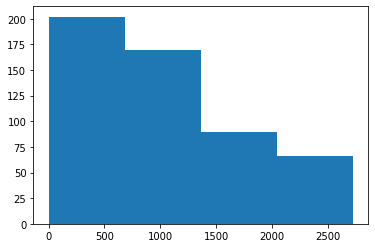

In [ ]:
plt.hist(distances,bins=4)

In [ ]:
len(distances)

528

In [ ]:
528/16

33.0

In [ ]:
games_df.head()

Date   Home Team Away Team  ...  probA_outcome  Home ML  Away ML
0 2015-09-10    Patriots  Steelers  ...            0.0     -365      300
1 2015-09-13     Cowboys    Giants  ...            0.0     -310      245
2 2015-09-13  Buccaneers    Titans  ...            1.0     -160      140
3 2015-09-13     Raiders   Bengals  ...            1.0      135     -155
4 2015-09-13     Broncos    Ravens  ...            0.0     -230      190

[5 rows x 11 columns]

Date   Home Team Away Team  ...  Home ML  Away ML  Distance Bin
0 2015-09-10    Patriots  Steelers  ...     -365      300             2
1 2015-09-13     Cowboys    Giants  ...     -310      245             8
2 2015-09-13  Buccaneers    Titans  ...     -160      140             3
3 2015-09-13     Raiders   Bengals  ...      135     -155             9
4 2015-09-13     Broncos    Ravens  ...     -230      190             8

[5 rows x 12 columns]

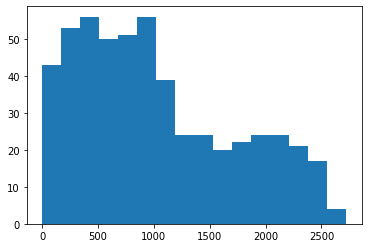

In [ ]:
#16 bucket with 33 distance values in each 
bins=plt.hist(distances,bins=16,);
edges = bins[1][1:] #right edges of bins 

distance_bin = [] #list of bin classes each game belongs to depending on away team's travel; can take on class value from 0 thru 15
for idx, row in games_df.iterrows():
  cur_dist = dist_matrix.loc[row['Away Team'],row['Home Team']]
  bin_it = 0
  while bin_it<15 and cur_dist > edges[bin_it]:
    bin_it+=1

  if bin_it < 15:
    distance_bin.append(bin_it)
  else:
    distance_bin.append(15)
games_df['Distance Bin']=pd.Series(distance_bin)
games_df.head()



In [ ]:
distBin_wins = {0: [0,0], 1: [0,0], 2: [0,0], 3: [0,0], 4: [0,0], 5: [0,0], 6: [0,0], 7: [0,0], 8: [0,0], 9: [0,0], 10: [0,0], 11: [0,0], 12: [0,0], 13: [0,0], 14: [0,0], 15: [0,0]}

for idx, row in games_df.iterrows():
  bin = row['Distance Bin']
  if row['probA_outcome']>0:
    #away team won
    distBin_wins[bin][0]+=1
  distBin_wins[bin][1]+=1

for item in distBin_wins.items():
  print('Bin ' + str(item[0]) + ': '+ str(float(item[1][0]/sum(item[1]))))

Bin 0: 0.2972972972972973
Bin 1: 0.33246753246753247
Bin 2: 0.313915857605178
Bin 3: 0.325
Bin 4: 0.29107981220657275
Bin 5: 0.3080168776371308
Bin 6: 0.30994152046783624
Bin 7: 0.2542372881355932
Bin 8: 0.31958762886597936
Bin 9: 0.27586206896551724
Bin 10: 0.24324324324324326
Bin 11: 0.2777777777777778
Bin 12: 0.32608695652173914
Bin 13: 0.3373493975903614
Bin 14: 0.3793103448275862
Bin 15: 0.3333333333333333


Bin distances into 4 bins. Evaluate the away team's winning percentage in these bins

Date   Home Team Away Team  ...  Home ML  Away ML  Distance Bin
0 2015-09-10    Patriots  Steelers  ...     -365      300             0
1 2015-09-13     Cowboys    Giants  ...     -310      245             2
2 2015-09-13  Buccaneers    Titans  ...     -160      140             0
3 2015-09-13     Raiders   Bengals  ...      135     -155             2
4 2015-09-13     Broncos    Ravens  ...     -230      190             2

[5 rows x 12 columns]

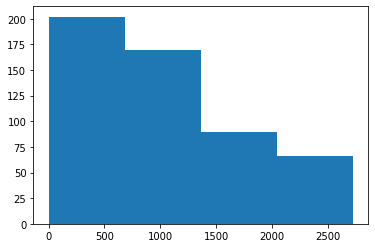

In [ ]:
bins=plt.hist(distances,bins=4,);
edges = bins[1][1:] #right edges of bins 

distance_bin = [] #list of bin classes each game belongs to depending on away team's travel; can take on class value from 0 thru 3
for idx, row in games_df.iterrows():
  cur_dist = dist_matrix.loc[row['Away Team'],row['Home Team']]
  bin_it = 0
  while bin_it<3 and cur_dist > edges[bin_it]:
    bin_it+=1

  if bin_it < 3:
    distance_bin.append(bin_it)
  else:
    distance_bin.append(3)
games_df['Distance Bin']=pd.Series(distance_bin)
games_df.head()


In [ ]:
distBin_wins = {0: [0,0], 1: [0,0], 2: [0,0], 3: [0,0]}
awayW_idxs = []
for idx, row in games_df.iterrows():
  bin = row['Distance Bin']
  w = distBin_wins[bin][0]
  gms = distBin_wins[bin][1]
  if row['probA_outcome']>0:
    #away team won
    awayW_idxs.append(idx)
    distBin_wins[bin][0]=w+1
  distBin_wins[bin][1]=gms+1

for item in distBin_wins.items():
  print('Bin ' + str(item[0]) + ': '+ str(item[1][0]/item[1][1]))

Bin 0: 0.47584187408491946
Bin 1: 0.418426103646833
Bin 2: 0.3924050632911392
Bin 3: 0.5214723926380368


In [ ]:
homeL_idxs = []
awins = 0
for idx, row in games_df.iterrows():
  if row['probH_outcome']<1:
    homeL_idxs.append(idx)
    awins+=1
homeL_idxs==awayW_idxs
print(awins/len(games_df))

0.449501246882793


In [ ]:
for item in distBin_wins.items():
  print(item[1][1])

683
521
237
163


In [ ]:
len(games_df)

1604

(array([372., 156.]),
 array([   0.       , 1361.5458105, 2723.091621 ]),
 <a list of 2 Patch objects>)

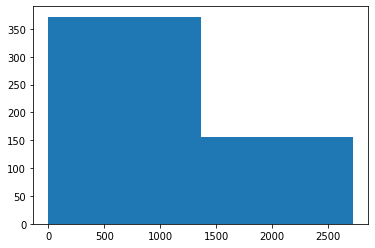

In [ ]:
plt.hist(distances,2)

Histogram is right skewed. Let's make 3 bins.
Bin 0: 0 to 499
Bin 1: 500-1000
Bin 2: 1000+

Date   Home Team Away Team  ...  Home ML  Away ML  Distance Bin
0 2015-09-10    Patriots  Steelers  ...     -365      300             0
1 2015-09-13     Cowboys    Giants  ...     -310      245             2
2 2015-09-13  Buccaneers    Titans  ...     -160      140             1
3 2015-09-13     Raiders   Bengals  ...      135     -155             2
4 2015-09-13     Broncos    Ravens  ...     -230      190             2

[5 rows x 12 columns]

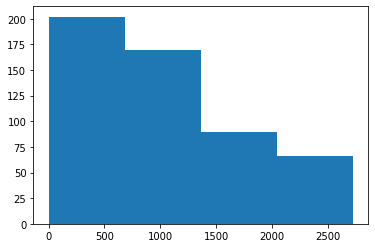

In [ ]:
bins=plt.hist(distances,bins=4,);
edges = [499,1000,np.max(distances)] #right edges of bins 

distance_bin = [] #list of bin classes each game belongs to depending on away team's travel; can take on class value from 0 thru 3
for idx, row in games_df.iterrows():
  cur_dist = dist_matrix.loc[row['Away Team'],row['Home Team']]
  bin_it = 0
  while bin_it<2 and cur_dist > edges[bin_it]:
    bin_it+=1

  if bin_it < 2:
    distance_bin.append(bin_it)
  else:
    distance_bin.append(2)
games_df['Distance Bin']=pd.Series(distance_bin)
games_df.head()


In [ ]:
distBin_wins = {0: [0,0], 1: [0,0], 2: [0,0]}

for idx, row in games_df.iterrows():
  bin = row['Distance Bin']
  if row['probA_outcome']>0:
    #away team won
    distBin_wins[bin][0]+=1
  distBin_wins[bin][1]+=1

for item in distBin_wins.items():
  print('Bin ' + str(item[0]) + ': '+ str(float(item[1][0]/item[1][1])))

Bin 0: 0.4784394250513347
Bin 1: 0.44398340248962653
Bin 2: 0.431496062992126


Travelling a further distance has influence upon away team's winning percentage but by a small-ish amount

Determine effect of team's trending performance on game impact

In [ ]:
team2idxDict.keys()

dict_keys(['Bills', 'Dolphins', 'Jets', 'Patriots', 'Ravens', 'Browns', 'Bengals', 'Steelers', 'Colts', 'Titans', 'Texans', 'Jaguars', 'Chiefs', 'Chargers', 'Broncos', 'Eagles', 'Giants', 'Cowboys', 'Redskins', 'Packers', 'Vikings', 'Bears', 'Lions', 'Buccaneers', 'Saints', 'Falcons', 'Panthers', 'Seahawks', '49ers', 'Cardinals', 'Rams', 'Raiders'])

In [ ]:
team_trends = {}
trend_diff_counter = 0
valid_pred_counter = 0

for idx, row in games_df.iterrows():
  if idx == 0:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start16_17:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start17_18:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start18_19:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start19_20:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start20_21:
    for team in team2idxDict.keys():
      team_trends[team]=0
  
  #at the start of each season, reset the trend counter for each team
  hTeam = row['Home Team']
  aTeam = row['Away Team']

  hTrend = team_trends[hTeam]
  aTrend = team_trends[aTeam]

  if aTrend == hTrend:
    if row['probH_outcome']>0:
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
    continue
  elif aTrend > hTrend:
    trend_diff_counter+=1
    if row['probH_outcome']==0:
      #home team lost
      valid_pred_counter+=1
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
    else:
      #home team won
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
  else:
    #home team has better trend
    trend_diff_counter+=1
    if row['probH_outcome']>0:
      #home team won
      valid_pred_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #away team won
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1


print('Num games with trend discrepancy: ' + str(trend_diff_counter))
print('Total num of games in dataset: '+ str(len(games_df)))
print(str(float(100*valid_pred_counter/trend_diff_counter)))



Num games with trend discrepancy: 1264
Total num of games in dataset: 1604
60.20569620253165


Given a discrepancy between the trends of either team, the team with a better trend heading into the matchup won the game about 60% of the time and this was evaluated on about 79 percent of games

Given a trend discrepancy, choose the team with the better trend to win. If teams have the same trend, choose home team to win. Evaluate this strat

In [ ]:
team_trends = {}
counter = 0
valid_pred_counter = 0

for idx, row in games_df.iterrows():
  if idx == 0:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start16_17:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start17_18:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start18_19:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start19_20:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start20_21:
    for team in team2idxDict.keys():
      team_trends[team]=0
  
  #at the start of each season, reset the trend counter for each team
  hTeam = row['Home Team']
  aTeam = row['Away Team']

  hTrend = team_trends[hTeam]
  aTrend = team_trends[aTeam]

  if aTrend == hTrend:
    if row['probH_outcome']>0:
      valid_pred_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
    continue
  elif aTrend > hTrend:
    trend_diff_counter+=1
    if row['probH_outcome']==0:
      #home team lost
      valid_pred_counter+=1
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
    else:
      #home team won
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
  else:
    #home team has better trend
    trend_diff_counter+=1
    if row['probH_outcome']>0:
      #home team won
      valid_pred_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #away team won
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1

print('Total num of games in dataset: '+ str(len(games_df)))
print(str(float(100*valid_pred_counter/1604)))


Total num of games in dataset: 1604
59.72568578553616


Strat of choosing team with better trend or when tied the home team yields an accuracy of about 60%

Suppose you pick teams to win so long as they have home field advantage AND not a worse trend than the other team. How well does this strategy do?

In [ ]:
team_trends = {}
game_counter = 0
valid_pred_counter = 0

for idx, row in games_df.iterrows():
  if idx == 0:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start16_17:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start17_18:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start18_19:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start19_20:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start20_21:
    for team in team2idxDict.keys():
      team_trends[team]=0
  
  #at the start of each season, reset the trend counter for each team
  hTeam = row['Home Team']
  aTeam = row['Away Team']

  hTrend = team_trends[hTeam]
  aTrend = team_trends[aTeam]

  if aTrend == hTrend:
    if row['probH_outcome']>0:
      #home team won
      valid_pred_counter+=1
      game_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #home team lost
      game_counter+=1
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
    continue
  elif aTrend > hTrend:
    if row['probH_outcome']>0:
      #home team won 
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #home team lost
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
  else:
    #home team has better trend
    game_counter+=1
    if row['probH_outcome']>0:
      #home team won
      valid_pred_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #home team lost
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1


print('Num games with strat evaluated: ' + str(game_counter))
print('Total num of games in dataset: '+ str(len(games_df)))
print(str(float(100*valid_pred_counter/game_counter)))


Num games with strat evaluated: 941
Total num of games in dataset: 1604
62.911795961742826


Picking teams with home-field and a trend at least as good as opponent yields 63% accuracy with this strat being evaluated on about 59% of games

When team with home field advantage has worse trend than opponent, is home field or trend more predictive? 

In [ ]:
team_trends = {}
game_counter = 0
home_pred_counter = 0
trend_pred_counter = 0

for idx, row in games_df.iterrows():
  if idx == 0:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start16_17:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start17_18:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start18_19:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start19_20:
    for team in team2idxDict.keys():
      team_trends[team]=0
  elif idx == start20_21:
    for team in team2idxDict.keys():
      team_trends[team]=0
  
  #at the start of each season, reset the trend counter for each team
  hTeam = row['Home Team']
  aTeam = row['Away Team']

  hTrend = team_trends[hTeam]
  aTrend = team_trends[aTeam]

  if aTrend == hTrend:
    if row['probH_outcome']>0:
      #home team won
      valid_pred_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #home team lost
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
    continue
  elif aTrend > hTrend:
    game_counter+=1
    if row['probH_outcome']>0:
      #home team won 
      home_pred_counter+=1
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #home team lost
      trend_pred_counter+=1
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1
  else:
    #home team has better trend
    if row['probH_outcome']>0:
      #home team won
      if hTrend < 0:
        team_trends[hTeam]=1
      else:
        team_trends[hTeam]=hTrend+1
      if aTrend < 0:
        team_trends[aTeam]=aTrend-1
      else:
        team_trends[aTeam]=-1
    else:
      #home team lost
      if hTrend>=0:
        team_trends[hTeam]=-1
      else:
        team_trends[hTeam]=hTrend-1
      if aTrend <= 0:
        team_trends[aTeam]=1
      else:
        team_trends[aTeam]=aTrend+1


print('Num games with strat evaluated: ' + str(game_counter))
print('Total num of games in dataset: '+ str(len(games_df)))
print(str(float(100*home_pred_counter/game_counter)))
print(str(float(100*trend_pred_counter/game_counter)))

Num games with strat evaluated: 663
Total num of games in dataset: 1604
44.796380090497735
55.203619909502265


 In about 41% of games, the home team has a worse trend heading into these games than their opponent. Of this 41%, the team with the better trend (ie away team) wins 55% of the time.

# Home team wins 55% of games. Travelling a further distance does negatively impact away team's chance of winning but not by too much. **Picking teams with home-field and a trend at least as good as opponent yields 63% accuracy with this strat being evaluated on about 59% of games.  In the other 41% of games, the home team has a worse trend heading into these games than their opponent. Of this 41%, the team with the better trend (ie away team) wins 55% of the time.** The strategy of choosing team with better trend or when tied the home team yields an accuracy of about 60%.  Given a discrepancy between the trends of either team, the team with a better trend heading into the matchup won the game about 60% of the time and this was evaluated on about 79 percent of games. This lends itself to the notion that trending advantage is a tad more predictive than only home field.


Elo Section

In [ ]:
seasons_start_elo

15/16 16/17 17/18 18/19 19/20 20/21
Team                                            
Buffalo       1534  1519  1484  1502  1448  1511
Miami         1484  1439  1509  1450  1415  1414
NYJets        1440  1522  1452  1432  1385  1458
NewEngland    1664  1605  1687  1651  1641  1582
Baltimore     1577  1475  1491  1535  1571  1638
Cleveland     1422  1395  1336  1302  1456  1441
Cincinnati    1540  1578  1516  1475  1429  1383
Pittsburgh    1563  1591  1599  1596  1572  1512
Indianapolis  1581  1484  1514  1407  1561  1483
Tennessee     1339  1349  1460  1496  1519  1599
Houston       1505  1506  1502  1398  1515  1528
Jacksonville  1357  1389  1382  1535  1455  1439
KansasCity    1540  1621  1613  1571  1602  1665
LAChargers    1523  1438  1437  1545  1586  1470
Denver        1595  1637  1556  1450  1449  1496
Philadelphia  1545  1488  1511  1647  1582  1529
NYGiants      1480  1469  1530  1412  1443  1391
Dallas        1590  1446  1569  1547  1547  1532
Washington    1371  1496  1504  1472  1441  1368
GreenBay      1601  1582  1587  1472  1455  1582
Minnesota     1479  1567  1498  1602  1538  1571
Chicago       1419  1444  1384  1444  1589  1525
Detroit       1538  1503  1501  1524  1491  1405
TampaBay      1377  1412  1506  1469  1445  1499
NewOrleans    1486  1464  1498  1584  1611  1610
Atlanta       1462  1486  1617  1601  1520  1535
Carolina      1536  1634  1527  1550  1519  1418
Seattle       1678  1635  1571  1545  1565  1547
SanFrancisco  1529  1437  1353  1469  1423  1604
Arizona       1541  1613  1537  1483  1384  1443
LARams        1477  1479  1399  1530  1598  1548
LasVegas      1389  1455  1530  1465  1405  1437

In [ ]:
import numpy as np
team_elo_dict = {}

hProbsfromElo = []
aProbsfromElo = []
for team in list(team2name.keys()):
  team_elo_dict[team2name[team]]=seasons_start_elo.loc[team,'15/16']

k = 20 #this is what 538 uses

for idx,row in games_df.iterrows():
  if idx == start16_17:
    for team in list(team2name.keys()):
      team_elo_dict[team2name[team]]=seasons_start_elo.loc[team,'16/17']
  elif idx == start17_18:
    for team in list(team2name.keys()):
      team_elo_dict[team2name[team]]=seasons_start_elo.loc[team,'17/18']
  elif idx == start18_19:
     for team in list(team2name.keys()):
      team_elo_dict[team2name[team]]=seasons_start_elo.loc[team,'18/19']
  elif idx == start19_20:
     for team in list(team2name.keys()):
      team_elo_dict[team2name[team]]=seasons_start_elo.loc[team,'19/20']
  elif idx == start20_21:
     for team in list(team2name.keys()):
      team_elo_dict[team2name[team]]=seasons_start_elo.loc[team,'20/21']
  #can take elo rating from dictionary
  home_elo = team_elo_dict[row['Home Team']]
  away_elo = team_elo_dict[row['Away Team']]
  curHprob = 1/(1+10**((away_elo-home_elo)/400))
  curAprob = 1-curHprob
  aProbsfromElo.append(curAprob)
  hProbsfromElo.append(curHprob)
  if row['probH_outcome']>0:
    #home won
    update = k*(1-curHprob)
    home_elo+=update
    away_elo-=update
  else:
    #away won
    update = k*(1-curAprob)
    away_elo+=update
    home_elo-=update
  
  team_elo_dict[row['Home Team']]=home_elo
  team_elo_dict[row['Away Team']]=away_elo
  
games_df['Elo H Probs']=pd.Series(hProbsfromElo)
games_df['Elo A Probs']=pd.Series(aProbsfromElo)





In [ ]:
games_df

Date   Home Team   Away Team  ...  Distance Bin  Elo H Probs  Elo A Probs
0    2015-09-10    Patriots    Steelers  ...             0     0.641390     0.358610
1    2015-09-13     Cowboys      Giants  ...             2     0.653217     0.346783
2    2015-09-13  Buccaneers      Titans  ...             1     0.554469     0.445531
3    2015-09-13     Raiders     Bengals  ...             2     0.295415     0.704585
4    2015-09-13     Broncos      Ravens  ...             2     0.525881     0.474119
...         ...         ...         ...  ...           ...          ...          ...
1599 2021-01-17      Chiefs      Browns  ...             1     0.749976     0.250024
1600 2021-01-17      Saints  Buccaneers  ...             0     0.623574     0.376426
1601 2021-01-24      Chiefs       Bills  ...             1     0.633601     0.366399
1602 2021-01-24     Packers  Buccaneers  ...             2     0.604866     0.395134
1603 2021-02-07  Buccaneers      Chiefs  ...             2     0.313478     0.686522

[1604 rows x 14 columns]

The probabilities calculated from using initial Elo ratings and then updating the ratings deviates significantly from the probH and probA columns. 

In [ ]:
wins = 0
for idx, row in games_df.iterrows():
  if row['probH_outcome'] > 0 and row['Elo H Probs'] > 1/2:
    wins+=1
  elif row['probA_outcome']>0 and row['Elo A Probs']>1/2:
    wins+=1
print(100*wins/len(games_df))

62.03241895261846


Traditional Elo favorites win only 62% of the time

Let's optimize k, the update factor, in traditional Elo rating systems

In [ ]:
def calculateEloProbs(k, elo_df, city2nameDict, games):
  #Params: 
  #k is update factor for elo ratings
  #elo_df is a dataframe with city name as index and seasons as column values. Each entry is a specific team's starting Elo rating for that season from 538
  #city2nameDict maps city to team name ie: Buffalo => Bills
  #games is a df of games containing vital stats (games_df)

  #Returns: df of home team outcome with home team probability with col names  = [HOutcome, HProb]

  team_elo_dict = {}
  hProbsfromElo = []
  hOuts = []
  for team in list(city2nameDict.keys()):
    team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'15/16']

  for idx,row in games.iterrows():
    if idx == start16_17:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'16/17']
    elif idx == start17_18:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'17/18']
    elif idx == start18_19:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'18/19']
    elif idx == start19_20:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'19/20']
    elif idx == start20_21:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'20/21']
    #can take elo rating from dictionary
    home_elo = team_elo_dict[row['Home Team']]
    away_elo = team_elo_dict[row['Away Team']]
    curHprob = 1/(1+10**((away_elo-home_elo)/400))
    hProbsfromElo.append(curHprob)
    if row['probH_outcome']>0:
      #home won
      hOuts.append(1)
      update = k*(1-curHprob)
      home_elo+=update
      away_elo-=update
    else:
      #away won
      hOuts.append(0)
      update = k*(curHprob)
      away_elo+=update
      home_elo-=update
    
    team_elo_dict[row['Home Team']]=home_elo
    team_elo_dict[row['Away Team']]=away_elo
  return pd.DataFrame({'HOutcome':hOuts, 'HProb':hProbsfromElo})

In [ ]:
test_ks = np.arange(10,50.1,0.1)

kLossDict = {}

for k in test_ks:
  print(k)
  result_df = calculateEloProbs(k,seasons_start_elo,team2name,games_df)
  loss = 0
  for idx, row in result_df.iterrows():
    if row['HOutcome']>0:
      #home win
      pWin = row['HProb']
    else:
      pWin = 1-row['HProb']
    loss+=-2*np.log(pWin)
  kLossDict[k]=loss

10.0
10.1
10.2
10.299999999999999
10.399999999999999
10.499999999999998
10.599999999999998
10.699999999999998
10.799999999999997
10.899999999999997
10.999999999999996
11.099999999999996
11.199999999999996
11.299999999999995
11.399999999999995
11.499999999999995
11.599999999999994
11.699999999999994
11.799999999999994
11.899999999999993
11.999999999999993
12.099999999999993
12.199999999999992
12.299999999999992
12.399999999999991
12.499999999999991
12.59999999999999
12.69999999999999
12.79999999999999
12.89999999999999
12.99999999999999
13.099999999999989
13.199999999999989
13.299999999999988
13.399999999999988
13.499999999999988
13.599999999999987
13.699999999999987
13.799999999999986
13.899999999999986
13.999999999999986
14.099999999999985
14.199999999999985
14.299999999999985
14.399999999999984
14.499999999999984
14.599999999999984
14.699999999999983
14.799999999999983
14.899999999999983
14.999999999999982
15.099999999999982
15.199999999999982
15.299999999999981
15.39999999999998
15.

In [ ]:
kLossDict

{10.0: 2109.2819870235858,
 10.1: 2108.9478709955292,
 10.2: 2108.6152862633053,
 10.299999999999999: 2108.2842278907383,
 10.399999999999999: 2107.9546909559645,
 10.499999999999998: 2107.6266705514804,
 10.599999999999998: 2107.3001617840887,
 10.699999999999998: 2106.975159774921,
 10.799999999999997: 2106.651659659427,
 10.899999999999997: 2106.329656587386,
 10.999999999999996: 2106.0091457228873,
 11.099999999999996: 2105.6901222443344,
 11.199999999999996: 2105.3725813444294,
 11.299999999999995: 2105.056518230186,
 11.399999999999995: 2104.741928122911,
 11.499999999999995: 2104.428806258199,
 11.599999999999994: 2104.117147885931,
 11.699999999999994: 2103.806948270257,
 11.799999999999994: 2103.498202689613,
 11.899999999999993: 2103.190906436677,
 11.999999999999993: 2102.885054818401,
 12.099999999999993: 2102.5806431559495,
 12.199999999999992: 2102.277666784762,
 12.299999999999992: 2101.9761210544725,
 12.399999999999991: 2101.6760013289395,
 12.499999999999991: 2101.377

From visual inspection, it looks like a k value of 47 is optimal!

In [ ]:
result_df = calculateEloProbs(47,seasons_start_elo,team2name,games_df)

count = 0
for idx, row in result_df.iterrows():
  if row['HOutcome']>0 and row['HProb']>0.5:
    count+=1
  elif row['HOutcome']<1 and row['HProb']<0.5:
    count+=1
print(count*100/len(games_df))

63.02992518703242


A k value of 47, which we found to be optimal, only increases game prediction accuracy from 62% when k was 20 to 63%

Home teams win 55% of games. So, if 2 teams had equivalent elo ratings and thus 50% chances to win, you'd give the bump to the home team. 

Home teeam chance to win = 1/(1+10^(AwayElo-HomeElo+HomeAdvantage/400))
home team chancee to win when away team has same Elo = 0.55 = 1/(1+10^HomeAdvantage/400)) and so HomeAdvantage should give roughly a 35 point boost to a team's Elo Rating

Let's evaluate how giving home team this 35 point Elo boost changes what the optimal k is 

In [ ]:
def calculateEloProbs2(k, elo_df, city2nameDict, games):
  #difference between this function and calculateEloProbs is that in this function the home team gets a 35 point Elo boost

  #Params: 
  #k is update factor for elo ratings
  #elo_df is a dataframe with city name as index and seasons as column values. Each entry is a specific team's starting Elo rating for that season from 538
  #city2nameDict maps city to team name ie: Buffalo => Bills
  #games is a df of games containing vital stats (games_df)

  #Returns: df of home team outcome with home team probability with col names  = [HOutcome, HProb]

  team_elo_dict = {}
  hProbsfromElo = []
  hOuts = []
  for team in list(city2nameDict.keys()):
    team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'15/16']

  for idx,row in games.iterrows():
    if idx == start16_17:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'16/17']
    elif idx == start17_18:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'17/18']
    elif idx == start18_19:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'18/19']
    elif idx == start19_20:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'19/20']
    elif idx == start20_21:
      for team in list(city2nameDict.keys()):
        team_elo_dict[city2nameDict[team]]=elo_df.loc[team,'20/21']
    #can take elo rating from dictionary
    home_elo = team_elo_dict[row['Home Team']] + 35
    away_elo = team_elo_dict[row['Away Team']]
    curHprob = 1/(1+10**((away_elo-home_elo)/400))
    hProbsfromElo.append(curHprob)
    if row['probH_outcome']>0:
      #home won
      hOuts.append(1)
      update = k*(1-curHprob)
      home_elo+=update
      away_elo-=update
    else:
      #away won
      hOuts.append(0)
      update = k*(curHprob)
      away_elo+=update
      home_elo-=update
    
    team_elo_dict[row['Home Team']]=home_elo
    team_elo_dict[row['Away Team']]=away_elo
  return pd.DataFrame({'HOutcome':hOuts, 'HProb':hProbsfromElo})

In [ ]:
test_ks = np.arange(10,50.1,0.1)

kLossDict = {} 

for k in test_ks:
  print(k)
  result_df = calculateEloProbs2(k,seasons_start_elo,team2name,games_df)
  loss = 0
  for idx, row in result_df.iterrows():
    if row['HOutcome']>0:
      #home win
      pWin = row['HProb']
    else:
      pWin = 1-row['HProb']
    loss+=-2*np.log(pWin)
  kLossDict[k]=loss

10.0
10.1
10.2
10.299999999999999
10.399999999999999
10.499999999999998
10.599999999999998
10.699999999999998
10.799999999999997
10.899999999999997
10.999999999999996
11.099999999999996
11.199999999999996
11.299999999999995
11.399999999999995
11.499999999999995
11.599999999999994
11.699999999999994
11.799999999999994
11.899999999999993
11.999999999999993
12.099999999999993
12.199999999999992
12.299999999999992
12.399999999999991
12.499999999999991
12.59999999999999
12.69999999999999
12.79999999999999
12.89999999999999
12.99999999999999
13.099999999999989
13.199999999999989
13.299999999999988
13.399999999999988
13.499999999999988
13.599999999999987
13.699999999999987
13.799999999999986
13.899999999999986
13.999999999999986
14.099999999999985
14.199999999999985
14.299999999999985
14.399999999999984
14.499999999999984
14.599999999999984
14.699999999999983
14.799999999999983
14.899999999999983
14.999999999999982
15.099999999999982
15.199999999999982
15.299999999999981
15.39999999999998
15.

In [ ]:
kLossDict


{10.0: 2101.6322112510616,
 10.1: 2101.285170700767,
 10.2: 2100.9396814757083,
 10.299999999999999: 2100.5957386106766,
 10.399999999999999: 2100.2533371544805,
 10.499999999999998: 2099.9124721699854,
 10.599999999999998: 2099.5731387341198,
 10.699999999999998: 2099.235331937847,
 10.799999999999997: 2098.8990468862,
 10.899999999999997: 2098.564278698244,
 10.999999999999996: 2098.2310225071233,
 11.099999999999996: 2097.899273460026,
 11.199999999999996: 2097.5690267181863,
 11.299999999999995: 2097.2402774569064,
 11.399999999999995: 2096.9130208655283,
 11.499999999999995: 2096.5872521474416,
 11.599999999999994: 2096.262966520091,
 11.699999999999994: 2095.940159214953,
 11.799999999999994: 2095.6188254775566,
 11.899999999999993: 2095.2989605674484,
 11.999999999999993: 2094.980559758215,
 12.099999999999993: 2094.6636183374662,
 12.199999999999992: 2094.3481316068383,
 12.299999999999992: 2094.034094881973,
 12.399999999999991: 2093.721503492509,
 12.499999999999991: 2093.410

Optimal K now is about 49

In [ ]:
result_df = calculateEloProbs(49,seasons_start_elo,team2name,games_df)

count = 0
for idx, row in result_df.iterrows():
  if row['HOutcome']>0 and row['HProb']>0.5:
    count+=1
  elif row['HOutcome']<1 and row['HProb']<0.5:
    count+=1
print(count*100/len(games_df))

62.96758104738154


Game prediction accuracy still only at about 63%

Look closer at ML odds and the implied probabilities

In [ ]:
h_impliedProb = []
a_impliedProb = []

for idx, row in games_df.iterrows():
  hML = row['Home ML']
  aML = row['Away ML']
  if hML < 0:
    h_impliedProb.append(-hML/(-hML+100))
  else:
    h_impliedProb.append(100/(100+hML))
  if aML < 0:
    a_impliedProb.append(-aML/(-aML+100))
  else:
    a_impliedProb.append(100/(100+aML))

games_df['Home ML Implied Prob']=pd.Series(h_impliedProb)
games_df['Away ML Implied Prob']=pd.Series(a_impliedProb)

impliedProbDict = {0: [0,0,0],10: [0,0,0], 20: [0,0,0], 30: [0,0,0], 40: [0,0,0], 50: [0,0,0], 60: [0,0,0], 70: [0,0,0], 80: [0,0,0], 90: [0,0,0]}

for idx, row in games_df.iterrows():
  h_ip = int(row['Home ML Implied Prob']*10)*10
  a_ip = int(row['Away ML Implied Prob']*10)*10
  if h_ip == 100:
    h_ip=90
  if a_ip == 100:
    a_ip=90
  if row['probH_outcome']>0:
    impliedProbDict[h_ip][0]+=1
  else:
    impliedProbDict[a_ip][0]+=1
  impliedProbDict[h_ip][1]+=1
  impliedProbDict[h_ip][2]+=row['Home ML Implied Prob']*100
  impliedProbDict[a_ip][1]+=1
  impliedProbDict[a_ip][2]+=row['Away ML Implied Prob']*100

for item in impliedProbDict.items():
  print(str(item[0]) + ': ' + str(100*item[1][0]/item[1][1]) + '; Avg: '+ str(item[1][2]/item[1][1]) + '; Share: ' + str(item[1][1]/(2*len(games_df))))

0: 15.384615384615385; Avg: 8.154334899784107; Share: 0.004052369077306733
10: 15.833333333333334; Avg: 15.161682617526369; Share: 0.03740648379052369
20: 20.408163265306122; Avg: 25.306484130766545; Share: 0.12219451371571072
30: 36.779324055666; Avg: 35.12784606305714; Share: 0.15679551122194513
40: 43.67088607594937; Avg: 44.27373041050332; Share: 0.1477556109725686
50: 53.70786516853933; Avg: 55.03537893467216; Share: 0.13871571072319203
60: 58.00376647834275; Avg: 64.29150768590327; Share: 0.16552369077306733
70: 75.21929824561404; Avg: 74.60735586309285; Share: 0.14214463840399003
80: 77.94117647058823; Avg: 83.39392772548013; Share: 0.06359102244389027
90: 88.57142857142857; Avg: 92.46356071722278; Share: 0.021820448877805487


Above is a table mapping the implied probabilities given by the ML odds (0 represents any ML imp prob from [0, 10)%, 10 represents any ML imp prob from [10,20)%, and so forth) to the average implied probabilitiy for the bucket, the actual winning percentages from the data, and the share of the total that that bucket has

Try and determine what the cut is (ie: How much lower in probability do their models assign outcomes?)



In [ ]:
 def determineCutHelperFunction(games, vigorish): 
  #games is a dataframe of all games and vital info
  #our model => actual prob = cur implied prob * (1-vigorish/100)
  h_impliedProb = []
  a_impliedProb = []

  for idx, row in games.iterrows():
    hML = row['Home ML']
    aML = row['Away ML']
    if hML < 0:
      h_impliedProb.append(-hML/(-hML+100))
    else:
      h_impliedProb.append(100/(100+hML))
    if aML < 0:
      a_impliedProb.append(-aML/(-aML+100))
    else:
      a_impliedProb.append(100/(100+aML))

  games['Home ML Implied Prob']=pd.Series(h_impliedProb)
  games['Away ML Implied Prob']=pd.Series(a_impliedProb)

  impliedProbDict = {0: [0,0,0],10: [0,0,0], 20: [0,0,0], 30: [0,0,0], 40: [0,0,0], 50: [0,0,0], 60: [0,0,0], 70: [0,0,0], 80: [0,0,0], 90: [0,0,0]}

  for idx, row in games.iterrows():
    act_probH = row['Home ML Implied Prob']* (1-(vigorish/100))
    act_probA = row['Away ML Implied Prob']* (1-(vigorish/100))
    h_ip = int(act_probH*10)*10
    a_ip = int(act_probA*10)*10
    if h_ip == 100:
      h_ip=90
    if a_ip == 100:
      a_ip=90
    if row['probH_outcome']>0:
      impliedProbDict[h_ip][0]+=1
    else:
      impliedProbDict[a_ip][0]+=1
    impliedProbDict[h_ip][1]+=1
    impliedProbDict[h_ip][2]+=act_probH*100
    impliedProbDict[a_ip][1]+=1
    impliedProbDict[a_ip][2]+=act_probA*100

  loss = 0
  for item in impliedProbDict.items():
    if item[1][1]>0:
      loss+=(item[1][1]/(2*len(games_df)))*np.abs((item[1][0]/item[1][1])-(item[1][2]/item[1][1]))
  return loss

In [ ]:
vig_range = np.arange(0.1,50.1,0.1)
min = 1000000
bestVig = -1
idx = 1
for cut in vig_range:
  if(idx*100/500)==0:
    print(idx*100/500)
  idx+=1
  cur_loss = determineCutHelperFunction(games_df,cut)
  if cur_loss < min:
    min = cur_loss
    bestVig = cut
print(bestVig)

Now, reading in 'nfl_elo.csv' which is from FiveThirtyEight and includes QB ratings

In [ ]:
qb_elo_df = pd.read_csv('gdrive/MyDrive/nfl_elo.csv')

In [ ]:
qb_elo_df.head()

date  season  neutral  ... qbelo2_post score1 score2
0  1920-09-26    1920        0  ...         NaN     48      0
1  1920-10-03    1920        0  ...         NaN     48      0
2  1920-10-03    1920        0  ...         NaN     20      0
3  1920-10-03    1920        0  ...         NaN     45      0
4  1920-10-03    1920        0  ...         NaN     14      0

[5 rows x 30 columns]

In [ ]:
dates = list(qb_elo_df['date'])
dates2 = []
for date in dates:
  dates2.append(pd.Timestamp(date).date())
qb_elo_df.drop('date',axis=1,inplace=True)
qb_elo_df['Date']=pd.Series(pd.Series(dates2))
qb_elo_df.head()

season  neutral playoff team1  ... qbelo2_post  score1  score2        Date
0    1920        0     NaN   RII  ...         NaN      48       0  1920-09-26
1    1920        0     NaN   CBD  ...         NaN      48       0  1920-10-03
2    1920        0     NaN   CHI  ...         NaN      20       0  1920-10-03
3    1920        0     NaN   RII  ...         NaN      45       0  1920-10-03
4    1920        0     NaN   DAY  ...         NaN      14       0  1920-10-03

[5 rows x 30 columns]

In [ ]:
earliest_date = pd.Timestamp('05/01/2000').date()
qb_elo_df = qb_elo_df.loc[qb_elo_df['Date']>earliest_date,:]
qb_elo_df.reset_index(inplace=True)
qb_elo_df.head()

index  season  neutral playoff  ...  qbelo2_post score1  score2        Date
0  11217    2000        0     NaN  ...  1397.560240     36      28  2000-09-03
1  11218    2000        0     NaN  ...  1629.181597      7      27  2000-09-03
2  11219    2000        0     NaN  ...  1549.349187     16      20  2000-09-03
3  11220    2000        0     NaN  ...  1502.933194     14      41  2000-09-03
4  11221    2000        0     NaN  ...  1588.949877     16      13  2000-09-03

[5 rows x 31 columns]

In [ ]:
qb_elo_df = qb_elo_df[['Date','season','neutral','playoff','team1','elo1_pre','team2','elo2_pre','score1','score2','elo1_post','elo2_post','qb1','qbelo1_pre','qb1_value_pre','qb2','qbelo2_pre','qb2_value_pre','qb1_adj','qb2_adj','qb1_game_value','qb2_game_value','qb1_value_post','qb2_value_post','qbelo1_post','qbelo2_post']]
qb_elo_df.tail()

Date  season  neutral  ... qb2_value_post  qbelo1_post  qbelo2_post
5588  2021-01-17    2020        0  ...     175.170110  1718.032247  1562.129125
5589  2021-01-17    2020        0  ...     221.747091  1700.946212  1660.789489
5590  2021-01-24    2020        0  ...     211.680227  1665.877222  1684.319058
5591  2021-01-24    2020        0  ...     270.137585  1742.902172  1681.289840
5592  2021-02-07    2020        1  ...     253.550716  1718.154941  1709.066290

[5 rows x 26 columns]

In [ ]:
team_abbrs = set(list(qb_elo_df['team1'])+list(qb_elo_df['team2']))
len(team_abbrs)

32

In [ ]:
abbrs2nameDict = {
'DAL': 'Cowboys',
'CLE': 'Browns',
'OAK': 'Raiders',
'SEA': 'Seahawks',
'ARI': 'Cardinals',
'CHI': 'Bears',
'NO': 'Saints',
'MIN': 'Vikings',
'WSH': 'Redskins',
'ATL': 'Falcons',
'DET': 'Lions',
'HOU': 'Texans',
'TB': 'Buccaneers',
'MIA': 'Dolphins',
'KC': 'Chiefs',
'LAC': 'Chargers',
'DEN': 'Broncos',
'NE': 'Patriots',
'GB': 'Packers',
'TEN': 'Titans',
'CAR': 'Panthers',
'PHI': 'Eagles',
'JAX': 'Jaguars',
'PIT': 'Steelers',
'BAL': 'Ravens',
'LAR': 'Rams',
'SF': '49ers',
'NYG': 'Giants',
'IND': 'Colts',
'CIN': 'Bengals',
'NYJ': 'Jets',
'BUF': 'Bills'    
}



In [ ]:
for idx, row in qb_elo_df.iterrows():
  print(idx)
  qb_elo_df.loc[idx,'team1']=abbrs2nameDict[row['team1']]
  qb_elo_df.loc[idx,'team2']=abbrs2nameDict[row['team2']]


Streaming output truncated to the last 5000 lines.
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
8

In [ ]:
qb_elo_df.tail()

Date  season  neutral  ... qb2_value_post  qbelo1_post  qbelo2_post
5588  2021-01-17    2020        0  ...     175.170110  1718.032247  1562.129125
5589  2021-01-17    2020        0  ...     221.747091  1700.946212  1660.789489
5590  2021-01-24    2020        0  ...     211.680227  1665.877222  1684.319058
5591  2021-01-24    2020        0  ...     270.137585  1742.902172  1681.289840
5592  2021-02-07    2020        1  ...     253.550716  1718.154941  1709.066290

[5 rows x 26 columns]

In [ ]:
home_qb_game_elovals = qb_elo_df['qb1_game_value']
away_qb_game_elovals = qb_elo_df['qb2_game_value']


In [ ]:
def calculateDefRatings(df):
  #function that takes in qb_elo_df and returns a dictionary mapping team name to 2000-2015 average def rating based on opposing qbs elo ratings against the defense

  #df = qb_elo_df
  defenseValueAllowedDict   = {}

  for idx, row in df.iterrows():
    if row['Date']>pd.Timestamp('05-01-2015').date():
      break
    t1 = row['team1']
    t2 = row['team2']

    if t1 in defenseValueAllowedDict.keys():
      defenseValueAllowedDict[t1].append(row['qb2_game_value'])
    else:
      defenseValueAllowedDict[t1] = [row['qb2_game_value']]
    
    if t2 in defenseValueAllowedDict.keys():
      defenseValueAllowedDict[t2].append(row['qb1_game_value'])
    else:
      defenseValueAllowedDict[t2] = [row['qb1_game_value']]

  for item in defenseValueAllowedDict.items():
    team = item[0]
    vals_allowed = item[1]
    defenseValueAllowedDict[team]= sum(vals_allowed)/len(vals_allowed)
  return defenseValueAllowedDict



In [ ]:
qbs = [] #qbs who played in NFL at some point during 00/01 season - 14/15 season

for idx, row in qb_elo_df.iterrows():
  if row['Date']>pd.Timestamp('05-01-2015').date():
    break
  if row['qb1'] not in qbs:
    qbs.append(row['qb1'])
  if row['qb2'] not in qbs:
    qbs.append(row['qb2'])


In [ ]:
qbValueDict = {}

"""for qb in qbs:
  idxs = sorted(list(qb_elo_df.loc[qb_elo_df['qb1']==qb,:].index) + list(qb_elo_df.loc[qb_elo_df['qb2']==qb,:].index))
  for idx in idxs:
    row = qb_elo_df.iloc[idx]
    if row['Date']>pd.Timestamp('05-01-2015').date():
      break
    if row['qb1']==qb:
      val = row['qb1_game_value']
    else:
      val = row['qb2_game_value']   
    if qb in qbValueDict.keys():
      qbValueDict[qb].append(val)
    else:
      qbValueDict[qb] = [val]

for item in qbValueDict.items():
  qb = item[0]
  qbValueDict[qb]=sum(qbValueDict[qb])/len(qbValueDict[qb])

#qbValueDict maps any QB who played at any point in [00/01 , 14/15] to his avg qb value rating""" 

"for qb in qbs:\n  idxs = sorted(list(qb_elo_df.loc[qb_elo_df['qb1']==qb,:].index) + list(qb_elo_df.loc[qb_elo_df['qb2']==qb,:].index))\n  for idx in idxs:\n    row = qb_elo_df.iloc[idx]\n    if row['Date']>pd.Timestamp('05-01-2015').date():\n      break\n    if row['qb1']==qb:\n      val = row['qb1_game_value']\n    else:\n      val = row['qb2_game_value']   \n    if qb in qbValueDict.keys():\n      qbValueDict[qb].append(val)\n    else:\n      qbValueDict[qb] = [val]\n\nfor item in qbValueDict.items():\n  qb = item[0]\n  qbValueDict[qb]=sum(qbValueDict[qb])/len(qbValueDict[qb])\n\n#qbValueDict maps any QB who played at any point in [00/01 , 14/15] to his avg qb value rating"

In [ ]:
past5seasons_df = qb_elo_df.loc[qb_elo_df['Date']>pd.Timestamp('05-01-2015').date(),:]
past5seasons_df.head(10)

Date  season  neutral  ... qb2_value_post  qbelo1_post  qbelo2_post
3989  2015-09-10    2015        0  ...     212.599126  1629.466122  1517.848132
3990  2015-09-13    2015        0  ...      76.216652  1486.455407  1412.221760
3991  2015-09-13    2015        0  ...     160.293833  1493.741067  1611.629113
3992  2015-09-13    2015        0  ...     142.903912  1365.201439  1531.970738
3993  2015-09-13    2015        0  ...     246.507578  1420.864204  1625.639516
3994  2015-09-13    2015        0  ...     164.257514  1549.856017  1563.737293
3995  2015-09-13    2015        0  ...     148.062815  1496.807349  1549.246070
3996  2015-09-13    2015        0  ...     151.623587  1392.185058  1535.661750
3997  2015-09-13    2015        0  ...     128.893424  1514.608272  1512.046688
3998  2015-09-13    2015        0  ...     209.773989  1545.655670  1488.047928

[10 rows x 26 columns]

In [ ]:
past5seasons_df.reset_index(inplace=True)
home_qb_game_elovals = past5seasons_df['qb1_game_value']
away_qb_game_elovals = past5seasons_df['qb2_game_value']

In [ ]:


total = 0
count = 0
for idx, row in qb_elo_df.iterrows():
  if row['Date']>pd.Timestamp('05-01-2015').date():
    break
  count+=2
  total+=row['qb1_game_value']+row['qb2_game_value']

qb_value_avg = total/count #average qb elo rating from 2000-2015

  

valid_pred_counter = 0

defenseValueAllowedDict = calculateDefRatings(qb_elo_df)
for idx, row in past5seasons_df.iterrows():
  t1 = row['team1']
  t2 = row['team2']
  t1_dr = defenseValueAllowedDict[t1]
  t2_dr = defenseValueAllowedDict[t2]

  t1_qb = row['qb1']
  t2_qb = row['qb2']

  if t1_qb in qbValueDict.keys():
    t1_qb_elo = qbValueDict[t1_qb]
  else:
    t1_qb_elo = row['qb1_value_pre']
  
  if t2_qb in qbValueDict.keys():
    t2_qb_elo = qbValueDict[t2_qb]
  else:
    t2_qb_elo = row['qb2_value_pre']
  
  t1_agg_elo = 0.6*t1_qb_elo + 0.4*t2_dr 
  t2_agg_elo = 0.6*t2_qb_elo + 0.4*t1_dr
  #saying each team's aggregate elo rating is a weighted average of the qb's rating and the opposing defense's rating

  if t1_agg_elo > t2_agg_elo:
    #pick t1 to win
    if row['score1']>row['score2']:
      valid_pred_counter+=1
  elif t2_agg_elo > t1_agg_elo:
    #pick t2 to win
    if row['score2']>row['score1']:
      valid_pred_counter+=1
  else:
    #equal agg elo by my calculation but pick team with higher original elo rating to win
    if row['elo1_pre']>row['elo2_pre']:
      #pick t1 to win
      if row['score1']>row['score2']:
        valid_pred_counter+=1
    elif row['elo2_pre']>row['elo1_pre']:
      #pick t2 to win
      if row['score2']>row['score1']:
        valid_pred_counter+=1
    else:
      #equal agg elo by my calculation and equal original elo ratings
      #pick t1 to win as home team
      if row['score1']>row['score2']:
        valid_pred_counter+=1
  
  qb1_gv = row['qb1_game_value']
  qb2_gv = row['qb2_game_value']

  defenseValueAllowedDict[t1] = 0.9 * t1_dr + 0.1 * qb2_gv
  defenseValueAllowedDict[t2] = 0.9 * t2_dr + 0.1 * qb1_gv

  qbValueDict[t1] = 0.9 * t1_qb_elo + 0.1 * qb1_gv
  qbValueDict[t2] = 0.9 * t2_qb_elo + 0.1 * qb2_gv

print(valid_pred_counter*100/len(past5seasons_df))





NameError: ignored

In above cell, for each game, I'm calculating a variant of an Elo rating for each team. This variant rating is a weighted average of the team's QB Elo rating from 538 and the opposing team's defense rating (based on QB Elo allowed). I pick the team with the higher variant rating to win. If they are tied, I pick the team with the higher original 538 Elo rating to win. If these are also tied, I pick the home team to win. Using 0.6 as the weight on QB Elo Rating, the game prediction accuracy is close to 62%. Explore what weight is best ie: produces highest game prediction accuracy 

In [ ]:
def calculateAccuracyBasedOnQBElo(games, qb_wt, dr_dict):
  #games is a dataframe of games (will be past5seasons_df)
  #qb_wt is how heavily a team's qb's elo rating should be weighed when calculating it's variant elo rating
  #dr_dict is a dictionary mapping team name to defensive rating
  #MAKE SURE TO RESET dr_dict to be the team's average def rating from 2000-2015 before calling this function by calling calculateDefRatings(qb_elo_df)
  valid_pred_counter = 0
  qb_dict = {}
  for idx, row in games.iterrows():
    t1 = row['team1']
    t2 = row['team2']
    t1_dr = dr_dict[t1]
    t2_dr = dr_dict[t2]
    t1_qb = row['qb1']
    t2_qb = row['qb2']

    if t1_qb in qb_dict.keys():
      t1_qb_elo = qb_dict[t1_qb]
    else:
      t1_qb_elo = row['qb1_value_pre']
    
    if t2_qb in qb_dict.keys():
      t2_qb_elo = qb_dict[t2_qb]
    else:
      t2_qb_elo = row['qb2_value_pre']
    
    t1_agg_elo = qb_wt*t1_qb_elo + (1-qb_wt)*t2_dr 
    t2_agg_elo = qb_wt*t2_qb_elo + (1-qb_wt)*t1_dr
    #saying each team's aggregate elo rating is a weighted average of the qb's rating and the opposing defense's rating

    if t1_agg_elo > t2_agg_elo:
      #pick t1 to win
      if row['score1']>row['score2']:
        valid_pred_counter+=1
    elif t2_agg_elo > t1_agg_elo:
      #pick t2 to win
      if row['score2']>row['score1']:
        valid_pred_counter+=1
    else:
      #equal agg elo by my calculation but pick team with higher original elo rating to win
      if row['elo1_pre']>row['elo2_pre']:
        #pick t1 to win
        if row['score1']>row['score2']:
          valid_pred_counter+=1
      elif row['elo2_pre']>row['elo1_pre']:
        #pick t2 to win
        if row['score2']>row['score1']:
          valid_pred_counter+=1
      else:
        #equal agg elo by my calculation and equal original elo ratings
        #pick t1 to win as home team
        if row['score1']>row['score2']:
          valid_pred_counter+=1
    
    qb1_gv = row['qb1_game_value']
    qb2_gv = row['qb2_game_value']

    dr_dict[t1] = 0.9 * t1_dr + 0.1 * qb2_gv
    dr_dict[t2] = 0.9 * t2_dr + 0.1 * qb1_gv

    qb_dict[t1_qb] = 0.9 * t1_qb_elo + 0.1 * qb1_gv
    qb_dict[t2_qb] = 0.9 * t2_qb_elo + 0.1 * qb2_gv

  return valid_pred_counter*100/len(games)


In [ ]:
x = np.arange(0,1.01,.01)

best_acc = 0
best_wt = -1
for val in x:
  defenseValueAllowedDict = calculateDefRatings(qb_elo_df)
  cur_acc = calculateAccuracyBasedOnQBElo(past5seasons_df,val,defenseValueAllowedDict)
  if cur_acc > best_acc:
    best_acc = cur_acc
    best_wt = val    
  
print('*****')
print(str(best_wt) + '\n')
print(str(best_acc))


*****
0.58

62.1571072319202


So, the best wt for qb_elo we found was 0.58 and it got us to 62.1% accuracy. 

Now, try optimizing the update equation weights for game to game qb elo and def rating changes. Currently, new value is given only 0.1 wt. 

Also, try different strategy to pick winning team based on the variant Elo rating. Look at the deviation from league average in the rating and pick the bigger one. (ie: compare def ratings vs leaague avg def rating and measure it with qb elo ratings vs qb avg elo rating)

In [ ]:
def calculateAccuracyBasedOnQBElo2(games, qb_update_wt, dr_update_wt, dr_dict):
  #games is a dataframe of games (will be past5seasons_df)
  #dr_dict is a dictionary mapping team name to defensive rating
  #MAKE SURE TO RESET dr_dict to be the team's average def rating from 2000-2015 before calling this function by calling calculateDefRatings(qb_elo_df)
  #difference between this function and calculateAccuracyBasedOnQBElo is that qb_wt is fixed to 0.58 here and the parameters that can be chosen by the user are the update weight for a QBs game to game elo rating and the update weight for a defense's elo rating game to game
  valid_pred_counter = 0
  qb_dict = {}
  for idx, row in games.iterrows():
    t1 = row['team1']
    t2 = row['team2']
    t1_dr = dr_dict[t1]
    t2_dr = dr_dict[t2]
    t1_qb = row['qb1']
    t2_qb = row['qb2']

    if t1_qb in qb_dict.keys():
      t1_qb_elo = qb_dict[t1_qb]
    else:
      t1_qb_elo = row['qb1_value_pre']
    
    if t2_qb in qb_dict.keys():
      t2_qb_elo = qb_dict[t2_qb]
    else:
      t2_qb_elo = row['qb2_value_pre']
    
    t1_agg_elo = 0.58*t1_qb_elo + (1-0.58)*t2_dr 
    t2_agg_elo = 0.58*t2_qb_elo + (1-0.58)*t1_dr
    #saying each team's aggregate elo rating is a weighted average of the qb's rating and the opposing defense's rating

    if t1_agg_elo > t2_agg_elo:
      #pick t1 to win
      if row['score1']>row['score2']:
        valid_pred_counter+=1
    elif t2_agg_elo > t1_agg_elo:
      #pick t2 to win
      if row['score2']>row['score1']:
        valid_pred_counter+=1
    else:
      #equal agg elo by my calculation but pick team with higher original elo rating to win
      if row['elo1_pre']>row['elo2_pre']:
        #pick t1 to win
        if row['score1']>row['score2']:
          valid_pred_counter+=1
      elif row['elo2_pre']>row['elo1_pre']:
        #pick t2 to win
        if row['score2']>row['score1']:
          valid_pred_counter+=1
      else:
        #equal agg elo by my calculation and equal original elo ratings
        #pick t1 to win as home team
        if row['score1']>row['score2']:
          valid_pred_counter+=1
    
    qb1_gv = row['qb1_game_value']
    qb2_gv = row['qb2_game_value']

    dr_dict[t1] = (1-dr_update_wt) * t1_dr + dr_update_wt * qb2_gv
    dr_dict[t2] = (1-dr_update_wt) * t2_dr + dr_update_wt * qb1_gv

    qb_dict[t1_qb] = (1-qb_update_wt) * t1_qb_elo + qb_update_wt * qb1_gv
    qb_dict[t2_qb] = (1-qb_update_wt) * t2_qb_elo + qb_update_wt * qb2_gv

  return valid_pred_counter*100/len(games)


In [ ]:
x = np.arange(0,0.51,.01)
y = np.arange(0,0.51,.01)
best_acc = 0
best_qb_wt = -1
best_dr_wt = -1
for qb_wt in x:
  for dr_wt in y:
    defenseValueAllowedDict = calculateDefRatings(qb_elo_df)
    cur_acc = calculateAccuracyBasedOnQBElo2(past5seasons_df,qb_wt,dr_wt,defenseValueAllowedDict)
    if cur_acc > best_acc:
      best_acc = cur_acc
      best_qb_wt = qb_wt
      best_dr_wt = dr_wt   
  
print('*****')
print(str(best_qb_wt) + '\n')
print(str(best_dr_wt) + '\n')
print(str(best_acc))

*****
0.25

0.05

62.65586034912718


Best qb_wt (on new game value) is 0.25 and best dr_wt (on new game value) is 0.05 but still we only get 62.655 accuracy

Couple of observations:

In the qb_elo_df that we got from FiveThirtyEight, the QB game values are adjusted for opposing team defenses to give standardized performance scores.

However, in the way that we use and update defense ratings, we do not have any adjustments based on opposing team qb level. So, ratings aren't really standardized. 

Average qb elo up to some point = Average def rating up to some point

In models above, you don't have any Elo boost for home team

In [ ]:
def calcQBEloAvg(df):
  #calculate qb elo avg until the 15/16 season 
  #df will be qb_elo_df
  qbsSum = 0 #sum of qbs game value elos for all games during 00/01 season - 14/15 season
  qbsValueCount = 0 #number of qb game values constituting qbsSum
  for idx, row in df.iterrows():
    if row['Date']>pd.Timestamp('05-01-2015').date():
      break
    qbsSum+=row['qb1_game_value']+row['qb2_game_value']
    qbsValueCount+=2
    return [qbsSum, qbsValueCount]

def model0(games, dr_dict, qbsRunSum, qbsCount):
  #games is a dataframe of games (will be past5seasons_df)
  #dr_dict is a dictionary mapping team name to defensive rating
  #qbsRunSum is a running sum of the qbs game value elo ratings
  #qbsCount is the number of values constituting qbsRunSum 
  #MAKE SURE TO RESET dr_dict to be the team's average def rating from 2000-2015 before calling this function by calling calculateDefRatings(qb_elo_df)
  valid_pred_counter = 0
  qb_dict = {}
  for idx, row in games.iterrows():
    curQBavg = qbsRunSum/qbsCount
    t1 = row['team1']
    t2 = row['team2']
    t1_dr = dr_dict[t1]
    t2_dr = dr_dict[t2]
    t1_qb = row['qb1']
    t2_qb = row['qb2']

    if t1_qb in qb_dict.keys():
      t1_qb_elo = qb_dict[t1_qb]
    else:
      t1_qb_elo = row['qb1_value_pre']
    
    if t2_qb in qb_dict.keys():
      t2_qb_elo = qb_dict[t2_qb]
    else:
      t2_qb_elo = row['qb2_value_pre']
    
    qb1_prem = t1_qb_elo - curQBavg
    qb2_prem = t2_qb_elo - curQBavg
    
    dr1_prem =  curQBavg - t1_dr
    dr2_prem = curQBavg - t2_dr

    t1_edge = qb1_prem - dr2_prem 
    t2_edge = qb2_prem - dr1_prem 

    #t1 edge - t2 edge = qb1_prem + dr1_prem - dr2_prem - qb2_prem = qb1_prem + dr1_prem - (qb2_prem + dr2_prem)

    if t1_edge - t2_edge >= 0:
      #pick t1 
      if row['score1']>row['score2']:
        valid_pred_counter+=1
    else:
      #pick t2
      if row['score2']>row['score1']:
        valid_pred_counter+=1
    
    qb1_gv = row['qb1_game_value']
    qb2_gv = row['qb2_game_value']

    qbsRunSum+=qb1_gv+qb2_gv
    qbsCount+=2

    dr_dict[t1] = 0.9 * t1_dr + 0.1 * (qb2_gv-(t2_qb_elo-curQBavg))
    dr_dict[t2] = 0.9 * t2_dr + 0.1 * (qb1_gv-(t1_qb_elo-curQBavg))

    qb_dict[t1_qb] = 0.9 * t1_qb_elo + 0.1 * qb1_gv
    qb_dict[t2_qb] = 0.9 * t2_qb_elo + 0.1 * qb2_gv

  return valid_pred_counter*100/len(games)



  

Model 0 is a model in which the team with the higher 'edge' is chosen to win (home team wins in a tie). Each team's edge is equal to the sum of the difference between the QB Elo and the average QB Elo and the difference between the defense's rating and the average defensive rating. Update weights for defensive ratings and for qb ratings are fixed at 0.9 and 0.1 

In [ ]:
defenseValueAllowedDict = calculateDefRatings(qb_elo_df)
l = calcQBEloAvg(qb_elo_df)
cur_acc = model0(past5seasons_df,defenseValueAllowedDict,l[0],l[1])
print(cur_acc)


62.46882793017456


Model 0 gives about a 62.5% game prediction accuracy 

Model 1 will be the same as Model 0 except that Model 1 will allow update weights for game to game qb elo and defense rating shifts to be flexible

In [ ]:
def model1(games, dr_dict, qbsRunSum, qbsCount,qb_wt, dr_wt):
  #games is a dataframe of games (will be past5seasons_df)
  #dr_dict is a dictionary mapping team name to defensive rating
  #qbsRunSum is a running sum of the qbs game value elo ratings
  #qbsCount is the number of values constituting qbsRunSum 
  #MAKE SURE TO RESET dr_dict to be the team's average def rating from 2000-2015 before calling this function by calling calculateDefRatings(qb_elo_df)
  valid_pred_counter = 0
  qb_dict = {}
  for idx, row in games.iterrows():
    curQBavg = qbsRunSum/qbsCount
    t1 = row['team1']
    t2 = row['team2']
    t1_dr = dr_dict[t1]
    t2_dr = dr_dict[t2]
    t1_qb = row['qb1']
    t2_qb = row['qb2']

    if t1_qb in qb_dict.keys():
      t1_qb_elo = qb_dict[t1_qb]
    else:
      t1_qb_elo = row['qb1_value_pre']
    
    if t2_qb in qb_dict.keys():
      t2_qb_elo = qb_dict[t2_qb]
    else:
      t2_qb_elo = row['qb2_value_pre']
    
    qb1_prem = t1_qb_elo - curQBavg
    qb2_prem = t2_qb_elo - curQBavg
    
    dr1_prem =  curQBavg - t1_dr
    dr2_prem = curQBavg - t2_dr

    t1_edge = qb1_prem - dr2_prem 
    t2_edge = qb2_prem - dr1_prem 

    #t1 edge - t2 edge = qb1_prem + dr1_prem - dr2_prem - qb2_prem = qb1_prem + dr1_prem - (qb2_prem + dr2_prem)

    if t1_edge - t2_edge >= 0:
      #pick t1 
      if row['score1']>row['score2']:
        valid_pred_counter+=1
    else:
      #pick t2
      if row['score2']>row['score1']:
        valid_pred_counter+=1
    
    qb1_gv = row['qb1_game_value']
    qb2_gv = row['qb2_game_value']

    qbsRunSum+=qb1_gv+qb2_gv
    qbsCount+=2

    dr_dict[t1] = (1-dr_wt) * t1_dr + dr_wt * (qb2_gv-(t2_qb_elo-curQBavg))
    dr_dict[t2] = (1-dr_wt) * t2_dr + dr_wt * (qb1_gv-(t1_qb_elo-curQBavg))

    qb_dict[t1_qb] = (1-qb_wt) * t1_qb_elo + qb_wt * qb1_gv
    qb_dict[t2_qb] = (1-qb_wt) * t2_qb_elo + qb_wt * qb2_gv

  return valid_pred_counter*100/len(games)

In [ ]:
x = np.arange(0,0.51,.01)
y = np.arange(0,0.51,.01)
#not letting update weights exceed 50%
best_acc = 0
best_qb_wt = -1
best_dr_wt = -1
l = calcQBEloAvg(qb_elo_df)
for qb_wt in x:
  for dr_wt in y:
    print('(' + str(qb_wt) + ', ' + str(dr_wt) + ')')
    defenseValueAllowedDict = calculateDefRatings(qb_elo_df)
    cur_acc = model1(past5seasons_df,defenseValueAllowedDict,l[0],l[1],qb_wt,dr_wt)
    if cur_acc > best_acc:
      best_acc = cur_acc
      best_qb_wt = qb_wt
      best_dr_wt = dr_wt   
  
print('*****')
print(str(best_qb_wt) + '\n')
print(str(best_dr_wt) + '\n')
print(str(best_acc))

(0.0, 0.0)
(0.0, 0.01)
(0.0, 0.02)
(0.0, 0.03)
(0.0, 0.04)
(0.0, 0.05)
(0.0, 0.06)
(0.0, 0.07)
(0.0, 0.08)
(0.0, 0.09)
(0.0, 0.1)
(0.0, 0.11)
(0.0, 0.12)
(0.0, 0.13)
(0.0, 0.14)
(0.0, 0.15)
(0.0, 0.16)
(0.0, 0.17)
(0.0, 0.18)
(0.0, 0.19)
(0.0, 0.2)
(0.0, 0.21)
(0.0, 0.22)
(0.0, 0.23)
(0.0, 0.24)
(0.0, 0.25)
(0.0, 0.26)
(0.0, 0.27)
(0.0, 0.28)
(0.0, 0.29)
(0.0, 0.3)
(0.0, 0.31)
(0.0, 0.32)
(0.0, 0.33)
(0.0, 0.34)
(0.0, 0.35000000000000003)
(0.0, 0.36)
(0.0, 0.37)
(0.0, 0.38)
(0.0, 0.39)
(0.0, 0.4)
(0.0, 0.41000000000000003)
(0.0, 0.42)
(0.0, 0.43)
(0.0, 0.44)
(0.0, 0.45)
(0.0, 0.46)
(0.0, 0.47000000000000003)
(0.0, 0.48)
(0.0, 0.49)
(0.0, 0.5)
(0.01, 0.0)
(0.01, 0.01)
(0.01, 0.02)
(0.01, 0.03)
(0.01, 0.04)
(0.01, 0.05)
(0.01, 0.06)
(0.01, 0.07)
(0.01, 0.08)
(0.01, 0.09)
(0.01, 0.1)
(0.01, 0.11)
(0.01, 0.12)
(0.01, 0.13)
(0.01, 0.14)
(0.01, 0.15)
(0.01, 0.16)
(0.01, 0.17)
(0.01, 0.18)
(0.01, 0.19)
(0.01, 0.2)
(0.01, 0.21)
(0.01, 0.22)
(0.01, 0.23)
(0.01, 0.24)
(0.01, 0.25)
(0.01, 0.26)
(

In [ ]:
df = qb_elo_df.loc[qb_elo_df['Date']>pd.Timestamp('05/01/2015').date(),:]
df.head()

Date  season  neutral  ... qb2_value_post  qbelo1_post  qbelo2_post
3989  2015-09-10    2015        0  ...     212.599126  1629.466122  1517.848132
3990  2015-09-13    2015        0  ...      76.216652  1486.455407  1412.221760
3991  2015-09-13    2015        0  ...     160.293833  1493.741067  1611.629113
3992  2015-09-13    2015        0  ...     142.903912  1365.201439  1531.970738
3993  2015-09-13    2015        0  ...     246.507578  1420.864204  1625.639516

[5 rows x 26 columns]

In [ ]:
df.tail()

Date  season  neutral  ... qb2_value_post  qbelo1_post  qbelo2_post
5588  2021-01-17    2020        0  ...     175.170110  1718.032247  1562.129125
5589  2021-01-17    2020        0  ...     221.747091  1700.946212  1660.789489
5590  2021-01-24    2020        0  ...     211.680227  1665.877222  1684.319058
5591  2021-01-24    2020        0  ...     270.137585  1742.902172  1681.289840
5592  2021-02-07    2020        1  ...     253.550716  1718.154941  1709.066290

[5 rows x 26 columns]

In [ ]:
df = df.reset_index()


In [ ]:
for idx, row in df.iterrows():
  dt_str = row['Date'].month
  if dt_str == 2:
    print(idx)

266
533
800
1067
1334
1603


In [ ]:
sb_dates = ['2/7/2021','2/2/2020','2/3/2019','2/4/2018','2/5/2017','2/7/2016']
for idx, val in enumerate(sb_dates):
  sb_dates[idx]=pd.Timestamp(sb_dates[idx]).date()

In [ ]:
wk1_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk1.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk2_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk2.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk3_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk3.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk4_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk4.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk5_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk5.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk6_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk6.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk7_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk7.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk8_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk8.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk9_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk9.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk10_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk10.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk11_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk11.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk12_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk12.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk13_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk13.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk14_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk14.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk15_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk15.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk16_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk16.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk17_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk17.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk18_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk18.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk19_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wk19.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk20and21_2020 = pd.read_csv('gdrive/MyDrive/Drives/2020_wks20and21.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])

drives2020 = wk1_2020.append(wk2_2020).append(wk3_2020).append(wk4_2020).append(wk5_2020).append(wk6_2020).append(wk7_2020).append(wk8_2020).append(wk9_2020).append(wk10_2020).append(wk11_2020).append(wk12_2020).append(wk13_2020).append(wk14_2020).append(wk15_2020).append(wk16_2020).append(wk17_2020).append(wk18_2020).append(wk19_2020).append(wk20and21_2020)
drives2020.reset_index(inplace=True)
drives2020.drop('index',axis=1,inplace=True)


In [ ]:
wk1_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk1.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk2_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk2.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk3_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk3.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk4_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk4.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk5_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk5.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk6_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk6.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk7_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk7.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk8_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk8.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk9_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk9.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk10_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk10.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk11_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk11.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk12_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk12.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk13_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk13.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk14_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk14.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk15_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk15.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk16_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk16.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk17_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk17.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk18_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wk18.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk19and20and21_2019 = pd.read_csv('gdrive/MyDrive/Drives/2019_wks19and20and21.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])

drives2019 = wk1_2019.append(wk2_2019).append(wk3_2019).append(wk4_2019).append(wk5_2019).append(wk6_2019).append(wk7_2019).append(wk8_2019).append(wk9_2019).append(wk10_2019).append(wk11_2019).append(wk12_2019).append(wk13_2019).append(wk14_2019).append(wk15_2019).append(wk16_2019).append(wk17_2019).append(wk18_2019).append(wk19and20and21_2019)
drives2019.reset_index(inplace=True)
drives2019.drop('index',axis=1,inplace=True)


In [ ]:
wk1_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk1.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk2_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk2.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk3_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk3.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk4_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk4.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk5_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk5.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk6_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk6.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk7_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk7.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk8_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk8.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk9_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk9.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk10_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk10.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk11_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk11.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk12_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk12.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk13_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk13.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk14_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk14.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk15_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk15.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk16_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk16.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk17_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk17.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk18_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wk18.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wk19and20and21_2018 = pd.read_csv('gdrive/MyDrive/Drives/2018_wks19and20and21.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])

drives2018 = wk1_2018.append(wk2_2018).append(wk3_2018).append(wk4_2018).append(wk5_2018).append(wk6_2018).append(wk7_2018).append(wk8_2018).append(wk9_2018).append(wk10_2018).append(wk11_2018).append(wk12_2018).append(wk13_2018).append(wk14_2018).append(wk15_2018).append(wk16_2018).append(wk17_2018).append(wk18_2018).append(wk19and20and21_2018)
drives2018.reset_index(inplace=True)
drives2018.drop('index',axis=1,inplace=True)


In [ ]:
wks1_5_2017RZ = pd.read_csv('gdrive/MyDrive/Drives/2017_wks1_5RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks6_11_2017RZ =  pd.read_csv('gdrive/MyDrive/Drives/2017wks6_11RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks12_16_2017RZ = pd.read_csv('gdrive/MyDrive/Drives/2017_wks12_16RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks17_21_2017RZ = pd.read_csv('gdrive/MyDrive/Drives/2017_wks17_21RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])

rz_drives2017 = wks1_5_2017RZ.append(wks6_11_2017RZ).append(wks12_16_2017RZ).append(wks17_21_2017RZ)

wks1_5_2016RZ = pd.read_csv('gdrive/MyDrive/Drives/2016_wks1_5RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks6_10_2016RZ =  pd.read_csv('gdrive/MyDrive/Drives/2016_wks6_10RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks11_15_2016RZ = pd.read_csv('gdrive/MyDrive/Drives/2016_wks11_15RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks16_21_2016RZ = pd.read_csv('gdrive/MyDrive/Drives/2016_wks16_21RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])

rz_drives2016 = wks1_5_2016RZ.append(wks6_10_2016RZ).append(wks11_15_2016RZ).append(wks16_21_2016RZ)

wks1_5_2015RZ = pd.read_csv('gdrive/MyDrive/Drives/2015_wks1_5RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks6_10_2015RZ =  pd.read_csv('gdrive/MyDrive/Drives/2015_wks6_10RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks11_15_2015RZ = pd.read_csv('gdrive/MyDrive/Drives/2015_wks11_15RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])
wks16_21_2015RZ = pd.read_csv('gdrive/MyDrive/Drives/2015_wks16_21RZ.txt',skip_blank_lines=True,names = ['Tm','Year','Date','Loc','Opp','GameResult','Plays','Length','idk','YdsScrim','NetYds','YdsP','SQtr','STime','SLOS','STmPts','SOppPts','EQtr','ETime','Last LOS','ETmPts','EOpp','DriveResult','Link'],skiprows=[0,1])

rz_drives2015 = wks1_5_2015RZ.append(wks6_10_2015RZ).append(wks11_15_2015RZ).append(wks16_21_2015RZ)

rz_drives2015.reset_index(inplace=True)
rz_drives2015.drop('index',axis=1,inplace=True)
rz_drives2016.reset_index(inplace=True)
rz_drives2016.drop('index',axis=1,inplace=True)
rz_drives2017.reset_index(inplace=True)
rz_drives2017.drop('index',axis=1,inplace=True)


In [ ]:
import copy
import math

In [ ]:
drives2020.drop(['idk','Link'],axis=1,inplace=True)
drives2019.drop(['idk','Link'],axis=1,inplace=True)
drives2018.drop(['idk','Link'],axis=1,inplace=True)
rz_drives2015.drop(['idk','Link'],axis=1,inplace=True)
rz_drives2016.drop(['idk','Link'],axis=1,inplace=True)
rz_drives2017.drop(['idk','Link'],axis=1,inplace=True)

In [ ]:
drives2018.fillna({'Loc':'H'},inplace=True)
drives2019.fillna({'Loc':'H'},inplace=True)
drives2020.fillna({'Loc':'H'},inplace=True)

rz_drives2015.fillna({'Loc':'H'},inplace=True)
rz_drives2016.fillna({'Loc':'H'},inplace=True)
rz_drives2017.fillna({'Loc':'H'},inplace=True)

In [ ]:
drives2018.dtypes

Tm              object
Year             int64
Date            object
Opp             object
GameResult      object
Plays           object
Length          object
YdsScrim         int64
NetYds           int64
YdsP             int64
SQtr           float64
STime           object
SLOS            object
STmPts         float64
SOppPts        float64
EQtr             int64
ETime           object
Last LOS        object
ETmPts           int64
EOpp             int64
DriveResult     object
Location        object
dtype: object

In [ ]:
tms = []
for idx, row in drives2018.iterrows():
  tms.append(row['Tm'])
  tms.append(row['Opp'])
for idx, row in drives2019.iterrows():
  tms.append(row['Tm'])
  tms.append(row['Opp'])
for idx, row in drives2020.iterrows():
  tms.append(row['Tm'])
  tms.append(row['Opp'])
for idx, row in rz_drives2015.iterrows():
  tms.append(row['Tm'])
  tms.append(row['Opp'])
for idx, row in rz_drives2016.iterrows():
  tms.append(row['Tm'])
  tms.append(row['Opp'])
for idx, row in rz_drives2017.iterrows():
  tms.append(row['Tm'])
  tms.append(row['Opp'])
teams = set(tms)
print(teams)
print(len(teams))

{'IND', 'SEA', 'GNB', 'CAR', 'DEN', 'NYJ', 'NOR', 'MIA', 'JAX', 'DAL', 'OAK', 'TAM', 'HOU', 'RAM', 'CLE', 'NWE', 'BUF', 'PHI', 'TEN', 'PIT', 'BAL', 'LAC', 'ATL', 'NYG', 'KAN', 'ARI', 'MIN', 'SFO', 'DET', 'CIN', 'CHI', 'WAS'}
32


In [ ]:
pfr_abbr = {
'SFO': '49ers',
'PIT': 'Steelers',
'MIA': 'Dolphins',
'JAX': 'Jaguars',
'BAL': 'Ravens',
'LAC': 'Chargers',
'KAN': 'Chiefs',
'NYJ': 'Jets',
'CLE': 'Browns',
'ARI': 'Cardinals',
'TEN': 'Titans',
'SEA': 'Seahawks',
'MIN': 'Vikings',
'CAR': 'Panthers',
'NWE': 'Patriots',
'CIN': 'Bengals',
'NYG': 'Giants',
'NOR': 'Saints',
'TAM': 'Buccaneers',
'RAM': 'Rams',
'DET': 'Lions',
'IND': 'Colts',
'CHI': 'Bears',
'OAK': 'Raiders',
'BUF': 'Bills',
'ATL': 'Falcons',
'DAL': 'Cowboys',
'WAS': 'Redskins',
'PHI': 'Eagles',
'GNB': 'Packers',
'DEN': 'Broncos',
'HOU': 'Texans'
}


In [ ]:
for idx, row in drives2020.iterrows():
  drives2020.loc[idx,'Tm']=pfr_abbr[row['Tm']]
  drives2020.loc[idx,'Opp']=pfr_abbr[row['Opp']]
for idx, row in drives2019.iterrows():
  drives2019.loc[idx,'Tm']=pfr_abbr[row['Tm']]
  drives2019.loc[idx,'Opp']=pfr_abbr[row['Opp']]
for idx, row in drives2018.iterrows():
  drives2018.loc[idx,'Tm']=pfr_abbr[row['Tm']]
  drives2018.loc[idx,'Opp']=pfr_abbr[row['Opp']]
for idx, row in rz_drives2015.iterrows():
  rz_drives2015.loc[idx,'Tm']=pfr_abbr[row['Tm']]
  rz_drives2015.loc[idx,'Opp']=pfr_abbr[row['Opp']]
for idx, row in rz_drives2016.iterrows():
  rz_drives2016.loc[idx,'Tm']=pfr_abbr[row['Tm']]
  rz_drives2016.loc[idx,'Opp']=pfr_abbr[row['Opp']]
for idx, row in rz_drives2017.iterrows():
  rz_drives2017.loc[idx,'Tm']=pfr_abbr[row['Tm']]
  rz_drives2017.loc[idx,'Opp']=pfr_abbr[row['Opp']]


In [ ]:
rz_idxs2020 = []
rz_idxs2019 = []
rz_idxs2018 = []
#lists correspond to indicees of red zone drives in respective dfs

for idx, row in drives2020.iterrows():
  if 'Opp' in row['Last LOS']:
    los = row['Last LOS']
    if int(los[los.index('Opp')+3:]) <= 20:
      rz_idxs2020.append(idx)

for idx, row in drives2019.iterrows():
  if 'Opp' in row['Last LOS']:
    los = row['Last LOS']
    if int(los[los.index('Opp')+3:]) <= 20:
      rz_idxs2019.append(idx)

for idx, row in drives2018.iterrows():
  if 'Opp' in row['Last LOS']:
    los = row['Last LOS']
    if int(los[los.index('Opp')+3:]) <= 20:
      rz_idxs2018.append(idx)

rz_drives2020 = drives2020.loc[rz_idxs2020,:]
rz_drives2019 = drives2019.loc[rz_idxs2019,:]
rz_drives2018 = drives2018.loc[rz_idxs2018,:]

rz_drives = rz_drives2015.append(rz_drives2016).append(rz_drives2017).append(rz_drives2018).append(rz_drives2019).append(rz_drives2020)
rz_drives.reset_index(inplace=True)
rz_drives.drop('index',axis=1,inplace=True)

rz_drives.head()


Tm  Year        Date Loc  ... Last LOS ETmPts  EOpp DriveResult
0  Chargers  2015  2015-10-12   H  ...   Opp 12    7.0   0.0   Touchdown
1  Chargers  2015  2015-10-12   H  ...   Opp 11   17.0  10.0   Touchdown
2   Falcons  2015  2015-10-11   H  ...   Opp 16    3.0   7.0      Fumble
3   Falcons  2015  2015-10-11   H  ...   Opp 20    3.0   7.0   Missed FG
4   Falcons  2015  2015-10-11   H  ...   Opp 10    6.0   7.0  Field Goal

[5 rows x 22 columns]

In [ ]:
res = set(rz_drives['DriveResult'])
res

{'Blocked FG',
 'Blocked FG Downs',
 'Downs',
 'End of Game',
 'End of Half',
 'Field Goal',
 'Fumble',
 'Interception',
 'Missed FG',
 'Punt',
 'Touchdown'}

In [ ]:
drive_res = []
for idx, row in rz_drives.iterrows():
  tm_pts = row['ETmPts']-row['STmPts']
  if tm_pts == 0:
    tm_pts = row['SOppPts']-row['EOpp']
  drive_res.append(tm_pts)
rz_drives['Drive Points']=pd.Series(drive_res)
rz_drives

Tm  Year        Date Loc  ... ETmPts  EOpp   DriveResult Drive Points
0      Chargers  2015  2015-10-12   H  ...    7.0   0.0     Touchdown          7.0
1      Chargers  2015  2015-10-12   H  ...   17.0  10.0     Touchdown          7.0
2       Falcons  2015  2015-10-11   H  ...    3.0   7.0        Fumble          0.0
3       Falcons  2015  2015-10-11   H  ...    3.0   7.0     Missed FG          0.0
4       Falcons  2015  2015-10-11   H  ...    6.0   7.0    Field Goal          3.0
...         ...   ...         ...  ..  ...    ...   ...           ...          ...
10271     Bills  2020  2021-01-24   @  ...    9.0   0.0     Touchdown          6.0
10272     Bills  2020  2021-01-24   @  ...   12.0  21.0    Field Goal          3.0
10273     Bills  2020  2021-01-24   @  ...   15.0  24.0    Field Goal          3.0
10274     Bills  2020  2021-01-24   @  ...   15.0  31.0  Interception          0.0
10275     Bills  2020  2021-01-24   @  ...   21.0  38.0     Touchdown          6.0

[10276 rows x 23 columns]

In [ ]:
rz_drives.dtypes

Tm               object
Year              int64
Date             object
Opp              object
GameResult       object
Plays            object
Length           object
YdsScrim          int64
NetYds            int64
YdsP              int64
SQtr            float64
STime            object
SLOS             object
STmPts          float64
SOppPts         float64
EQtr              int64
ETime            object
Last LOS         object
ETmPts          float64
EOpp            float64
DriveResult      object
Location         object
Drive Points    float64
dtype: object

In [ ]:
dates = []
gm_titles = []
time_used_qt_sd = []
secs_qt = 15*60
for idx, row in rz_drives.iterrows():
  cur = row['Date']
  dates.append(pd.Timestamp(cur).date())
  t1 = row['Tm']
  t2 = row['Opp']
  if t1 < t2:
    gm_titles.append(t1 + ' vs ' + t2)
  else:
    gm_titles.append(t2 + ' vs ' + t1)
  sd_time = row['STime']
  sd_min = int(sd_time[:sd_time.index(':')])
  sd_sec = int(sd_time[sd_time.index(':')+1:])
  secs_sdTime = sd_sec + (sd_min*60)
  time_used_qt_sd.append(secs_qt-secs_sdTime) #secs used in qt
rz_drives.drop('Date',axis=1,inplace=True)
rz_drives['Date']=pd.Series(dates)
rz_drives['Game']=pd.Series(gm_titles)
rz_drives['Seconds Used in Qt']=pd.Series(time_used_qt_sd)

rz_drives.sort_values(by=['Date','Game','SQtr','Seconds Used in Qt'],inplace=True,ignore_index=True) #sort based on date of game (earliest first), then on game title so all drives of a game are grouped together, then by quarter that the drive started, then by time used in the qt at time of drive start
#rz_drives should list each game's drives sequeentially now

rz_drives

Tm  Year  ...                  Game Seconds Used in Qt
0        Patriots  2015  ...  Patriots vs Steelers                706
1        Patriots  2015  ...  Patriots vs Steelers                382
2        Patriots  2015  ...  Patriots vs Steelers                  0
3        Steelers  2015  ...  Patriots vs Steelers                263
4        Steelers  2015  ...  Patriots vs Steelers                645
...           ...   ...  ...                   ...                ...
10271  Buccaneers  2020  ...  Buccaneers vs Chiefs                357
10272      Chiefs  2020  ...  Buccaneers vs Chiefs                535
10273  Buccaneers  2020  ...  Buccaneers vs Chiefs                839
10274      Chiefs  2020  ...  Buccaneers vs Chiefs                734
10275      Chiefs  2020  ...  Buccaneers vs Chiefs                690

[10276 rows x 24 columns]

In [ ]:
rz_drives.head(50)

Tm  Year Loc  ...        Date                 Game Seconds Used in Qt
0   Patriots  2015   H  ...  2015-09-10  Steelers @ Patriots                706
1   Patriots  2015   H  ...  2015-09-10  Steelers @ Patriots                382
2   Patriots  2015   H  ...  2015-09-10  Steelers @ Patriots                  0
3   Steelers  2015   @  ...  2015-09-10  Steelers @ Patriots                263
4   Steelers  2015   @  ...  2015-09-10  Steelers @ Patriots                645
5   Patriots  2015   H  ...  2015-09-10  Steelers @ Patriots                201
6   Steelers  2015   @  ...  2015-09-10  Steelers @ Patriots                721
7    Bengals  2015   @  ...  2015-09-13    Bengals @ Raiders                 87
8    Bengals  2015   @  ...  2015-09-13    Bengals @ Raiders                 86
9    Bengals  2015   @  ...  2015-09-13    Bengals @ Raiders                579
10   Bengals  2015   @  ...  2015-09-13    Bengals @ Raiders                837
11   Bengals  2015   @  ...  2015-09-13    Bengals @ Raiders                430
12   Bengals  2015   @  ...  2015-09-13    Bengals @ Raiders                730
13   Raiders  2015   H  ...  2015-09-13    Bengals @ Raiders                144
14   Raiders  2015   H  ...  2015-09-13    Bengals @ Raiders                583
15    Browns  2015   @  ...  2015-09-13        Browns @ Jets                204
16      Jets  2015   H  ...  2015-09-13        Browns @ Jets                307
17    Browns  2015   @  ...  2015-09-13        Browns @ Jets                546
18      Jets  2015   H  ...  2015-09-13        Browns @ Jets                734
19      Jets  2015   H  ...  2015-09-13        Browns @ Jets                258
20      Jets  2015   H  ...  2015-09-13        Browns @ Jets                510
21      Jets  2015   H  ...  2015-09-13        Browns @ Jets                131
22      Jets  2015   H  ...  2015-09-13        Browns @ Jets                607
23    Chiefs  2015   @  ...  2015-09-13      Chiefs @ Texans                236
24    Texans  2015   H  ...  2015-09-13      Chiefs @ Texans                632
25    Chiefs  2015   @  ...  2015-09-13      Chiefs @ Texans                854
26    Chiefs  2015   @  ...  2015-09-13      Chiefs @ Texans                599
27    Texans  2015   H  ...  2015-09-13      Chiefs @ Texans                754
28    Texans  2015   H  ...  2015-09-13      Chiefs @ Texans                406
29    Texans  2015   H  ...  2015-09-13      Chiefs @ Texans                530
30     Bills  2015   H  ...  2015-09-13        Colts @ Bills                  0
31     Colts  2015   @  ...  2015-09-13        Colts @ Bills                326
32     Colts  2015   @  ...  2015-09-13        Colts @ Bills                406
33  Dolphins  2015   @  ...  2015-09-13  Dolphins @ Redskins                171
34  Redskins  2015   H  ...  2015-09-13  Dolphins @ Redskins                262
35  Dolphins  2015   @  ...  2015-09-13  Dolphins @ Redskins                791
36  Dolphins  2015   @  ...  2015-09-13  Dolphins @ Redskins                793
37  Redskins  2015   H  ...  2015-09-13  Dolphins @ Redskins                600
38   Cowboys  2015   H  ...  2015-09-13     Giants @ Cowboys                  0
39   Cowboys  2015   H  ...  2015-09-13     Giants @ Cowboys                247
40    Giants  2015   @  ...  2015-09-13     Giants @ Cowboys                  0
41   Cowboys  2015   H  ...  2015-09-13     Giants @ Cowboys                312
42    Giants  2015   @  ...  2015-09-13     Giants @ Cowboys                411
43   Cowboys  2015   H  ...  2015-09-13     Giants @ Cowboys                419
44    Giants  2015   @  ...  2015-09-13     Giants @ Cowboys                592
45   Cowboys  2015   H  ...  2015-09-13     Giants @ Cowboys                806
46  Chargers  2015   H  ...  2015-09-13     Lions @ Chargers                456
47     Lions  2015   @  ...  2015-09-13     Lions @ Chargers                245
48  Chargers  2015   H  ...  2015-09-13     Lions @ Chargers                371
49  Charge

In [ ]:
odds = []
for idx, row in rz_drives.iterrows():
  if row['DriveResult']=='Touchdown' and row['Drive Points']<6:
    odds.append(idx)
  elif row['DriveResult']=='Field Goal' and row['Drive Points']<3:
    odds.append(idx)
  elif row['ETmPts']<row['STmPts']:
    odds.append(idx)



In [ ]:
rz_drives

Tm  Year  ...                  Game Seconds Used in Qt
0        Patriots  2015  ...  Patriots vs Steelers                706
1        Patriots  2015  ...  Patriots vs Steelers                382
2        Patriots  2015  ...  Patriots vs Steelers                  0
3        Steelers  2015  ...  Patriots vs Steelers                263
4        Steelers  2015  ...  Patriots vs Steelers                645
...           ...   ...  ...                   ...                ...
10271  Buccaneers  2020  ...  Buccaneers vs Chiefs                357
10272      Chiefs  2020  ...  Buccaneers vs Chiefs                535
10273  Buccaneers  2020  ...  Buccaneers vs Chiefs                839
10274      Chiefs  2020  ...  Buccaneers vs Chiefs                734
10275      Chiefs  2020  ...  Buccaneers vs Chiefs                690

[10276 rows x 25 columns]

There are some irregularities in the data in that the scores before and after a drive are nonsensical for some drives. It seems that the drive result is accurate though 

In [ ]:
#rz_drives.drop('Drive Points',axis=1,inplace=True)

def calculateRZ_TDEff(team, season,df=rz_drives): 
  #team is the team name to calculate the efficiency for (use all for all teams)
  #season is the season for which to calculate (use 0 for all seasons)

  # this function returns the percentage of red zone drives that end in TDS

  if season == 0:
    #all seasons
    if team == 'all':
      temp = df
      return len(temp.loc[temp['DriveResult']=='Touchdown',:])/len(temp)
    else:
      temp = df.loc[df['Tm']==team,:]
      return len(temp.loc[temp['DriveResult']=='Touchdown',:])/len(temp)
  else:
    #specific season
    if team == 'all':
      #all teaams 
      temp = df.loc[df['Year']==season,:]
      return len(temp.loc[temp['DriveResult']=='Touchdown',:])/len(temp)
    else:
      #specific team
      temp0 = df.loc[df['Year']==season,:]
      temp = temp0.loc[temp0['Tm']==team,:]
      return len(temp.loc[temp['DriveResult']=='Touchdown',:])/len(temp)

def calculateRZ_TotalEff(team,season,df=rz_drives):
  #team is the team name to calculate the efficiency for (use all for all teams)
  #season is the season for which to calculate (use 0 for all seasons)

  # this function returns the percentage of red zone drives that end in TDS or field goals

  if season == 0:
    #all seasons
    if team == 'all':
      temp = df
      temp1 = temp.loc[temp['DriveResult']=='Touchdown',:]
      temp2 = temp.loc[temp['DriveResult']=='Field Goal',:]
      return len(temp1.append(temp2))/len(temp)
    else:
      temp = df.loc[df['Tm']==team,:]
      temp1 = temp.loc[temp['DriveResult']=='Touchdown',:]
      temp2 = temp.loc[temp['DriveResult']=='Field Goal',:]
      return len(temp1.append(temp2))/len(temp)
  else:
    #specific season
    if team == 'all':
      #all teaams 
      temp = df.loc[df['Year']==season,:]
      temp1 = temp.loc[temp['DriveResult']=='Touchdown',:]
      temp2 = temp.loc[temp['DriveResult']=='Field Goal',:]
      return len(temp1.append(temp2))/len(temp)
    else:
      #specific team
      temp0 = df.loc[df['Year']==season,:]
      temp = temp0.loc[temp0['Tm']==team,:]
      temp1 = temp.loc[temp['DriveResult']=='Touchdown',:]
      temp2 = temp.loc[temp['DriveResult']=='Field Goal',:]
      return len(temp1.append(temp2))/len(temp)



In [ ]:
calculateRZ_TotalEff('Patriots',2018)

0.7857142857142857

In [ ]:
calculateRZ_TDEff('Jaguars',2018)

0.375

In [ ]:
calculateRZ_TotalEff('Bills',2019)

0.8636363636363636

In [ ]:
games_df

Date   Home Team   Away Team  ...  Distance Bin  Elo H Probs  Elo A Probs
0    2015-09-10    Patriots    Steelers  ...             0     0.641390     0.358610
1    2015-09-13     Cowboys      Giants  ...             2     0.653217     0.346783
2    2015-09-13  Buccaneers      Titans  ...             1     0.554469     0.445531
3    2015-09-13     Raiders     Bengals  ...             2     0.295415     0.704585
4    2015-09-13     Broncos      Ravens  ...             2     0.525881     0.474119
...         ...         ...         ...  ...           ...          ...          ...
1599 2021-01-17      Chiefs      Browns  ...             1     0.749976     0.250024
1600 2021-01-17      Saints  Buccaneers  ...             0     0.623574     0.376426
1601 2021-01-24      Chiefs       Bills  ...             1     0.633601     0.366399
1602 2021-01-24     Packers  Buccaneers  ...             2     0.604866     0.395134
1603 2021-02-07  Buccaneers      Chiefs  ...             2     0.313478     0.686522

[1604 rows x 14 columns]

In [ ]:
#6 seasons worth of data, 32 NFL teams, can calculate rz effiency for any team in any of the 6 seasons
wp_rzDict = {}

for team in team2name.values():
  for yr in [2015,2016,2017,2018,2019,2020]:
    wp_rzDict[team + str(yr)] = [0,0,0] #wins, num games, rz eff

for idx, row in games_df.iterrows():
  hteam = row['Home Team']
  ateam = row['Away Team']
  if row['Home Points']>row['Away Points']:
    #home win
    if idx < start16_17:
      yr = 2015
    elif idx < start17_18:
      yr =2016
    elif idx < start18_19:
      yr = 2017
    elif idx < start19_20:
      yr = 2018
    elif idx < start20_21:
      yr = 2019
    else:
      yr = 2020
    wp_rzDict[hteam+str(yr)][0]+=1
  else:
    #away win
    if idx < start16_17:
      yr = 2015
    elif idx < start17_18:
      yr = 2016
    elif idx < start18_19:
      yr = 2017
    elif idx < start19_20:
      yr = 2018
    elif idx < start20_21:
      yr = 2019
    else:
      yr = 2020
    wp_rzDict[ateam+str(yr)][0]+=1
  wp_rzDict[hteam+str(yr)][1]+=1
  wp_rzDict[ateam+str(yr)][1]+=1

for item in wp_rzDict.items():
  t = item[0]
  yr = int(t[-4:])
  team = t[:t.index(str(yr))]
  wp_rzDict[t][2]=calculateRZ_TDEff(team,yr)

wps = []
rzs = []
for item in wp_rzDict.items():
  vals = item[1]
  wp = vals[0]/vals[1]
  eff = vals[2]
  wps.append(wp*100)
  rzs.append(eff*100)

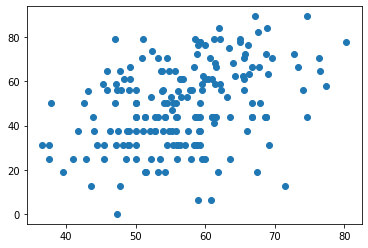

In [ ]:
plt.scatter(rzs,wps) #scatter plot of rz td effs vs winning percentages

In [ ]:
wps_arr = np.array(wps)
rzs_arr = np.array(rzs)
cv_mat = np.vstack((wps_arr,rzs_arr))
np.corrcoef(cv_mat) 

array([[1.        , 0.37953997],
       [0.37953997, 1.        ]])

RZ TD efficiency has a correlation coefficient of about 0.38

In [ ]:
past5seasons_df.fillna(value={'playoff':'no'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
past5seasons_df.head()

Date  season  neutral  ... qb2_value_post  qbelo1_post  qbelo2_post
3989  2015-09-10    2015        0  ...     212.599126  1629.466122  1517.848132
3990  2015-09-13    2015        0  ...      76.216652  1486.455407  1412.221760
3991  2015-09-13    2015        0  ...     160.293833  1493.741067  1611.629113
3992  2015-09-13    2015        0  ...     142.903912  1365.201439  1531.970738
3993  2015-09-13    2015        0  ...     246.507578  1420.864204  1625.639516

[5 rows x 26 columns]

In [ ]:
games_df.head()

Date   Home Team Away Team  ...  Distance Bin  Elo H Probs  Elo A Probs
0 2015-09-10    Patriots  Steelers  ...             0     0.641390     0.358610
1 2015-09-13     Cowboys    Giants  ...             2     0.653217     0.346783
2 2015-09-13  Buccaneers    Titans  ...             1     0.554469     0.445531
3 2015-09-13     Raiders   Bengals  ...             2     0.295415     0.704585
4 2015-09-13     Broncos    Ravens  ...             2     0.525881     0.474119

[5 rows x 14 columns]

In [ ]:
past5seasons_df.reset_index(inplace=True)
len(games_df)==len(past5seasons_df)

True

In [ ]:
past5seasons_df.drop('index',axis=1,inplace=True)
past5seasons_df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Date               object
season              int64
neutral             int64
playoff            object
team1              object
elo1_pre          float64
team2              object
elo2_pre          float64
score1              int64
score2              int64
elo1_post         float64
elo2_post         float64
qb1                object
qbelo1_pre        float64
qb1_value_pre     float64
qb2                object
qbelo2_pre        float64
qb2_value_pre     float64
qb1_adj           float64
qb2_adj           float64
qb1_game_value    float64
qb2_game_value    float64
qb1_value_post    float64
qb2_value_post    float64
qbelo1_post       float64
qbelo2_post       float64
dtype: object

In [ ]:
wp_qbEloDict = copy.deepcopy(wp_rzDict)

for item in wp_qbEloDict.items():
  key = item[0]
  yr = int(key[-4:])
  team = key[:key.index(str(yr))]
  temp1 = past5seasons_df.loc[past5seasons_df['team1']==team,:]
  temp2 = past5seasons_df.loc[past5seasons_df['team2']==team,:]
  temp = temp1.append(temp2)
  #temp.reset_index(inplace=True)
  qb_gvs = 0
  count = 0
  for idx, row in temp.iterrows():
    dt = row['Date']
    if dt.year == yr or (dt.month <=2 and dt.year==yr+1):
      count+=1
      if row['team1']==team:
        #pull qb1
        qb_gvs+=row['qb1_game_value']
      else:
      #pull qb2
        qb_gvs+=row['qb2_game_value']
    else:
      continue
  wp_qbEloDict[key][2]=(qb_gvs/count)

wps = []
qbs = []

for item in wp_qbEloDict.items():
  vals = item[1]
  wps.append(100*vals[0]/vals[1])
  qbs.append(vals[2])

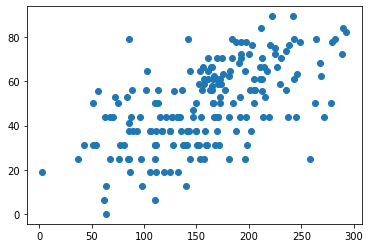

In [ ]:
plt.scatter(qbs,wps)

In [ ]:
qbs_arr = np.array(qbs)
wps_arr = np.array(wps)
mat = np.vstack((qbs_arr,wps_arr))
np.corrcoef(mat)

array([[1.        , 0.60065808],
       [0.60065808, 1.        ]])

Correlation coefficient between qb elo game values and win percentages is 0.6

In [ ]:
rz_drives.head()

Tm  Year Loc  ...        Date                  Game Seconds Used in Qt
0  Patriots  2015   H  ...  2015-09-10  Patriots vs Steelers                706
1  Patriots  2015   H  ...  2015-09-10  Patriots vs Steelers                382
2  Patriots  2015   H  ...  2015-09-10  Patriots vs Steelers                  0
3  Steelers  2015   @  ...  2015-09-10  Patriots vs Steelers                263
4  Steelers  2015   @  ...  2015-09-10  Patriots vs Steelers                645

[5 rows x 24 columns]

In [ ]:
games_df.to_csv('games_df.txt',index=False)

In [ ]:
def calculateDefRZTDEff(team,season,df=rz_drives):
  #same as calculateRZ_TDEff except for defenses
  if season == 0:
    #all seasons
    if team == 'all':
      #all teams
      temp = df.loc[df['DriveResult']=='Touchdown',:]
      return 1 - len(temp)/len(df)
    else:
      #specific team
      temp = df.loc[df['Opp']==team,:]
      return 1 - len(temp.loc[temp['DriveResult']=='Touchdown',:])/len(temp)
  else:
    #specific season 
    if team == all:
      #all teams
      temp = df.loc[df['Year']==season,:]
      temp1 = temp.loc[temp['DriveResult']=='Touchdown',:]
      return 1 - len(temp1)/len(temp)
    else:
      #specific team
      temp0 = df.loc[df['Year']==season,:]
      temp = temp0.loc[temp0['Opp']==team,:]
      return 1 - len(temp.loc[temp['DriveResult']=='Touchdown',:])/len(temp)
      


In [ ]:
wp_def_rzDict = copy.deepcopy(wp_rzDict)
for item in wp_rzDict.items():
  t = item[0]
  yr = int(t[-4:])
  team = t[:t.index(str(yr))]
  wp_def_rzDict[t][2]=calculateDefRZTDEff(team,yr)

wps = []
def_eff = []

for item in wp_def_rzDict.items():
  vals = item[1]
  wps.append(100*vals[0]/vals[1])
  def_eff.append(100*vals[2])


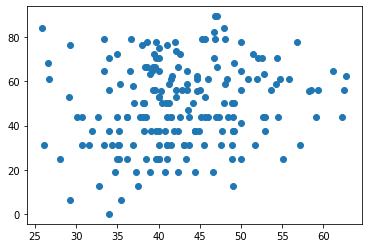

In [ ]:
plt.scatter(def_eff,wps)

In [ ]:
def_arr = np.array(def_eff)
wps_arr = np.array(wps)
mat = np.vstack((def_arr,wps_arr))
np.corrcoef(mat)

array([[1.        , 0.16626725],
       [0.16626725, 1.        ]])

Redzone def effiency has a correlation coeff of 0.166 only

In [ ]:
calculateDefRZTDEff('all',0)

0.42604126119112495

In [ ]:
calculateDefRZTDEff('Redskins',2020)

0.5

In [ ]:
pfr_scrapeDict = {
'Bills': '0buf',
'Dolphins': '0mia',
'Jets': '0nyj',
'Patriots': '0nwe',
'Ravens': '0rav',
'Browns': '0cle',
'Bengals': '0cin',
'Steelers': '0pit',
'Colts': '0clt',
'Titans': '0oti',
'Texans': '0htx',
'Jaguars': '0jax',
'Chiefs': '0kan',
'Chargers': '0sdg',
'Broncos': '0den',
'Eagles': '0phi',
'Giants': '0nyg',
'Cowboys': '0dal',
'Redskins': '0was',
'Packers': '0gnb',
'Vikings': '0min',
'Bears': '0chi',
'Lions': '0det',
'Buccaneers': '0tam',
'Saints': '0nor',
'Falcons': '0atl',
'Panthers': '0car',
'Seahawks': '0sea',
'49ers': '0sfo',
'Cardinals': '0crd',
'Rams': '0ram',
'Raiders': '0rai'
}


In [ ]:
games_df.head()

Date   Home Team Away Team  ...  Distance Bin  Elo H Probs  Elo A Probs
0 2015-09-10    Patriots  Steelers  ...             0     0.641390     0.358610
1 2015-09-13     Cowboys    Giants  ...             2     0.653217     0.346783
2 2015-09-13  Buccaneers    Titans  ...             1     0.554469     0.445531
3 2015-09-13     Raiders   Bengals  ...             2     0.295415     0.704585
4 2015-09-13     Broncos    Ravens  ...             2     0.525881     0.474119

[5 rows x 14 columns]

In [ ]:
import requests
from bs4 import BeautifulSoup

base = 'https://www.pro-football-reference.com/boxscores/'

hs = []
a_s = []

for idx, row in games_df.iterrows():
  found = False
  dt = row['Date']
  m = dt.month
  y = dt.year
  d = dt.day
  if m < 10:
    m_str = '0' + str(m)
  else:
    m_str = str(m)
  if d < 10:
    d_str = '0' + str(d)
  else:
    d_str = str(d)
  home = row['Home Team']
  url = base + str(y) + m_str + d_str + pfr_scrapeDict[home] + '.htm'
  site = requests.get(url).text
  soup = BeautifulSoup(site,'lxml')
  body = soup.body
  wrap = body.find('div',id='wrap')
  content = wrap.find('div',id='content')
  tables = content.find_all('table')
  if len(tables)==0:
    print(idx)
    break
  print(tables)
  break
  #home_sts_div = content.find('div',id='all_home_starters')
  #home_sts_table = content.find('table',id='home_starters').find('tbody')
  #vis_sts_div = content.find('div',id='all_vis_starters')
 # vis_sts_table = content.find('table',id='vis_starters').find('tbody')
  #cur_as = ''
  #cur_hs = ''
  #for row in home_sts_table.find_all('tr'):
   # p = row.find('th').find('a').string
    #pos = row.find('td').string
    #cur_hs += p + ': ' + pos +'; '
  #for row in vis_sts_table.find_all('tr'):
   # p = row.find('th').find('a').string
    #pos = row.find('td').string
    #cur_as += p + ': ' + pos +'; '
  #hs.append(copy.deepcopy(cur_hs))
  #a_s.append(copy.deepcopy(cur_as))

#games_df['HS']=pd.Series(hs)
#games_df['AS']=pd.Series(a_s)
    


[<table class="linescore nohover stats_table no_freeze">
<thead>
<tr>
<th> </th>
<th> </th>
<th>1</th>
<th>2</th>
<th>3</th>
<th>4</th>
<th>Final</th>
</tr>
</thead>
<tbody>
<tr>
<td class="center">
<div class="media-item logo loader">
<img alt="2015 Pittsburgh Steelers Logo" class="teamlogo" itemscope="image" src="https://d2p3bygnnzw9w3.cloudfront.net/req/202108231/tlogo/pfr/pit-2015.png"/>
<p><a href="http://www.sportslogos.net/">via Sports Logos.net</a></p>
<p><a href="https://www.sports-reference.com/blog/2016/06/redesign-team-and-league-logos-courtesy-sportslogos-net/">About logos</a></p>
</div>
</td>
<td><a href="/teams/pit/2015.htm">Pittsburgh Steelers</a></td>
<td class="center">0</td>
<td class="center">3</td>
<td class="center">8</td>
<td class="center">10</td>
<td class="center">21</td>
</tr>
<tr>
<td class="center">
<div class="media-item logo loader">
<img alt="2015 New England Patriots Logo" class="teamlogo" itemscope="image" src="https://d2p3bygnnzw9w3.cloudfront.net/req

In [ ]:
pip install selenium

     |████████████████████████████████| 904 kB 7.1 MB/s 


New Section

In [ ]:
roundH = []
roundA = []

for idx, row in games_df.iterrows():
  roundH.append(round(100*row['Elo H Probs']))
  roundA.append(round(100*row['Elo A Probs']))
games_df['Elo Prob H Round']=pd.Series(roundH)
games_df['Elo Prob A Round']=pd.Series(roundA)
games_df

Date   Home Team  ... Elo Prob H Round  Elo Prob A Round
0    2015-09-10    Patriots  ...               64                36
1    2015-09-13     Cowboys  ...               65                35
2    2015-09-13  Buccaneers  ...               55                45
3    2015-09-13     Raiders  ...               30                70
4    2015-09-13     Broncos  ...               53                47
...         ...         ...  ...              ...               ...
1599 2021-01-17      Chiefs  ...               75                25
1600 2021-01-17      Saints  ...               62                38
1601 2021-01-24      Chiefs  ...               63                37
1602 2021-01-24     Packers  ...               60                40
1603 2021-02-07  Buccaneers  ...               31                69

[1604 rows x 18 columns]

In [ ]:
percentile_dict = {0: [0,0],10: [0,0], 20: [0,0], 30: [0,0], 40: [0,0], 50: [0,0], 60: [0,0], 70: [0,0], 80: [0,0], 90: [0,0], 100: [0,0]}

for idx, row in games_df.iterrows():
  home_pct = int(row['Elo Prob H Round']/10)*10
  away_pct = int(row['Elo Prob A Round']/10)*10
  if row['probH_outcome']>0:
    #home won
    percentile_dict[home_pct][0]+=1
  else:
    percentile_dict[away_pct][0]+=1
  percentile_dict[home_pct][1]+=1
  percentile_dict[away_pct][1]+=1 
for item in percentile_dict.items():
  if sum(item[1])>0:
    print(str(item[0])+': '+str(100*item[1][0]/item[1][1]))

10: 18.42105263157895
20: 25.270758122743683
30: 37.47680890538033
40: 43.96067415730337
50: 55.66166439290587
60: 60.670194003527335
70: 75.97173144876325
80: 75.43859649122807
90: 100.0


Traditional Elos are doing a poor job

In [ ]:
team_elo_dict

{'49ers': 1535.9771400803209,
 'Bears': 1509.190685820019,
 'Bengals': 1360.7555187322184,
 'Bills': 1610.5320719545039,
 'Broncos': 1454.6157682601051,
 'Browns': 1512.1771276050615,
 'Buccaneers': 1597.8839333672086,
 'Cardinals': 1459.8937765310493,
 'Chargers': 1472.9222386799704,
 'Chiefs': 1706.6020595361638,
 'Colts': 1533.6579285021076,
 'Cowboys': 1483.1067648061012,
 'Dolphins': 1481.435778337496,
 'Eagles': 1465.1217295189228,
 'Falcons': 1467.7938357218145,
 'Giants': 1401.9657176526487,
 'Jaguars': 1347.1815732696684,
 'Jets': 1384.5196748039257,
 'Lions': 1390.2573142701563,
 'Packers': 1633.9247523920078,
 'Panthers': 1402.4143804812181,
 'Patriots': 1539.3494722387584,
 'Raiders': 1459.404597436913,
 'Rams': 1563.8146490275512,
 'Ravens': 1635.281744986325,
 'Redskins': 1390.660778028562,
 'Saints': 1634.7965692582388,
 'Seahawks': 1584.3406564543218,
 'Steelers': 1549.717002355566,
 'Texans': 1458.6257649351646,
 'Titans': 1601.709831751532,
 'Vikings': 1533.3691632043

In [ ]:
games_df

Date   Home Team  ... Elo Prob H Round  Elo Prob A Round
0    2015-09-10    Patriots  ...               64                36
1    2015-09-13     Cowboys  ...               65                35
2    2015-09-13  Buccaneers  ...               55                45
3    2015-09-13     Raiders  ...               30                70
4    2015-09-13     Broncos  ...               53                47
...         ...         ...  ...              ...               ...
1599 2021-01-17      Chiefs  ...               75                25
1600 2021-01-17      Saints  ...               62                38
1601 2021-01-24      Chiefs  ...               63                37
1602 2021-01-24     Packers  ...               60                40
1603 2021-02-07  Buccaneers  ...               31                69

[1604 rows x 18 columns]

In [ ]:
aug_games_df = pd.read_csv('gdrive/MyDrive/augmented_games_df.csv')
aug_games_df.head()

Home Team Away Team  Home Points  ...  Away 4th Down Conv Rate  Home ToP  Away ToP
0    Patriots  Steelers           28  ...                      2-2     27:55     32:05
1     Cowboys    Giants           27  ...                      0-0     37:10     22:50
2  Buccaneers    Titans           14  ...                      0-0     28:30     31:30
3     Raiders   Bengals           13  ...                      1-1     27:28     32:32
4     Broncos    Ravens           19  ...                      1-1     37:17     22:43

[5 rows x 38 columns]

In [ ]:
aug_games_df.drop(['Distance Bin','Elo H Probs','Elo A Probs'], axis=1, inplace=True)
aug_games_df.columns


Index(['Home Team', 'Away Team', 'Home Points', 'Away Points', 'probH',
       'probH_outcome', 'probA', 'probA_outcome', 'Home ML', 'Away ML', 'Date',
       'Home FDs', 'Away FDs', 'Home Rushing', 'Away Rushing',
       'Home Passing Cmp', 'Away Passing Cmp', 'Home Sacked', 'Away Sacked',
       'Home Pass Yds', 'Away Pass Yds', 'Home Total Yds', 'Away Total Yds',
       'Home Fumbles Lost', 'Away Fumbles Lost', 'Home Turnovers',
       'Away Turnovers', 'Home Penalties', 'Away Penalties',
       'Home 3rd Down Conv Rate', 'Away 3rd Down Conv Rate',
       'Home 4th Down Conv Rate', 'Away 4th Down Conv Rate', 'Home ToP',
       'Away ToP'],
      dtype='object')

In [ ]:
rushing = ['Home Rushing','Away Rushing']
h_ra = []
a_ra = []
h_ryds = []
a_ryds = []
h_rtds = []
a_rtds = []
for col in rushing:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    val = item[1]
    attempts = int(val[:val.index('-')])
    yds = float(val[val.index('-')+1:val.rindex('-')])
    tds = int(val[val.rindex('-')+1:])
    if col =='Home Rushing':
      h_ra.append(attempts)
      h_ryds.append(yds)
      h_rtds.append(tds)
    else:
      a_ra.append(attempts)
      a_ryds.append(yds)
      a_rtds.append(tds)

aug_games_df.drop(rushing,axis=1,inplace=True)
aug_games_df['Home Rush Atts']=pd.Series(h_ra)
aug_games_df['Home Rush Yds']=pd.Series(h_ryds)
aug_games_df['Home Rush Tds']=pd.Series(h_rtds)
aug_games_df['Away Rush Atts']=pd.Series(a_ra)
aug_games_df['Away Rush Yds']=pd.Series(a_ryds)
aug_games_df['Away Rush Tds']=pd.Series(a_rtds)

h_patt = []
h_pcmp = []
h_ptds = []
h_pint = []
a_patt = []
a_pcmp = []
a_ptds = []
a_pint = []

passing = ['Home Passing Cmp','Away Passing Cmp']
for col in passing:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    vals = item[1].split('-')
    for val_idx, val in enumerate(vals):
      if val_idx == 0:
        p_cmp = int(val)
      elif val_idx == 1:
        p_atts = int(val)
      elif val_idx == 3:
        p_tds = int(val)
      elif val_idx == 4:
        p_int = int(val)
    
    if col == 'Home Passing Cmp':
      h_patt.append(p_atts)
      h_pcmp.append(p_cmp)
      h_ptds.append(p_tds)
      h_pint.append(p_int)
    else:
      a_patt.append(p_atts)
      a_pcmp.append(p_cmp)
      a_ptds.append(p_tds)
      a_pint.append(p_int)

aug_games_df.drop(passing,axis=1,inplace=True)

aug_games_df['H Pass Cmp']=pd.Series(h_pcmp)
aug_games_df['H Pass Atts']=pd.Series(h_patt)
aug_games_df['H Pass Tds']=pd.Series(h_ptds)
aug_games_df['H Pass Ints']=pd.Series(h_pint)  
aug_games_df['A Pass Cmp']=pd.Series(a_pcmp)
aug_games_df['A Pass Atts']=pd.Series(a_patt)
aug_games_df['A Pass Tds']=pd.Series(a_ptds)
aug_games_df['A Pass Ints']=pd.Series(a_pint)  

sacked = ['Home Sacked','Away Sacked']
h_sacked = []
a_sacked = []

for col in sacked:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    vals = item[1].split('-')
    sacks = int(vals[0])
    if col == 'Home Sacked':
      h_sacked.append(sacks)
    else:
      a_sacked.append(sacks)

aug_games_df.drop(sacked,axis=1,inplace=True)

aug_games_df['Home Sacks'] = pd.Series(a_sacked)
aug_games_df['Away Sacks'] = pd.Series(h_sacked)


fumbles = ['Home Fumbles Lost', 'Away Fumbles Lost']

h_tf = []
a_tf = []


for col in fumbles:
  ser = aug_games_df[col]
  for items in ser.iteritems():
    vals = items[1].split('-')
    total_fumbles = int(vals[0])
    if col == 'Home Fumbles Lost':
      h_tf.append(total_fumbles)
    else:
      a_tf.append(total_fumbles)

aug_games_df.drop(fumbles, axis = 1, inplace=True)

aug_games_df['Home Fumbles']=pd.Series(h_tf)
aug_games_df['Away Fumbles']=pd.Series(a_tf)

pens = ['Home Penalties','Away Penalties']
h_pens = []
a_pens = []
h_penyds = []
a_penyds = []

for col in pens:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    vals = item[1].split('-')
    num = int(vals[0])
    yds = int(vals[1])
    if col == 'Home Penalties':
      h_pens.append(num)
      h_penyds.append(yds)
    else:
      a_pens.append(num)
      a_penyds.append(yds)

aug_games_df.drop(pens,axis=1,inplace=True)

aug_games_df['Home Penalties']=pd.Series(h_pens)
aug_games_df['Home Penalty Yards Given']=pd.Series(h_penyds)
aug_games_df['Away Penalties']=pd.Series(a_pens)
aug_games_df['Away Penalty Yards Given']=pd.Series(a_penyds)


third_cr = ['Home 3rd Down Conv Rate','Away 3rd Down Conv Rate']

h_3ds = []
h_3dA = []
a_3ds = []
a_3dA = []

for col in third_cr:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    vals = item[1].split('-')
    success = int(vals[0])
    atts = int(vals[1])
    if col == third_cr[0]:
      #home
      h_3ds.append(success)
      h_3dA.append(atts)
    else:
      a_3ds.append(success)
      a_3dA.append(atts)

aug_games_df.drop(third_cr,axis=1, inplace=True)

aug_games_df['Home 3rd Down Atts']=pd.Series(h_3dA)
aug_games_df['Home 3rd Down Makes']=pd.Series(h_3ds)
aug_games_df['Away 3rd Down Atts']=pd.Series(a_3dA)
aug_games_df['Away 3rd Down Makes']=pd.Series(a_3ds)




fourth_cr = ['Home 4th Down Conv Rate','Away 4th Down Conv Rate']

h_4ds = []
h_4dA = []
a_4ds = []
a_4dA = []

for col in fourth_cr:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    vals = item[1].split('-')
    success = int(vals[0])
    atts = int(vals[1])
    if col == fourth_cr[0]:
      #home
      h_4ds.append(success)
      h_4dA.append(atts)
    else:
      a_4ds.append(success)
      a_4dA.append(atts)

aug_games_df.drop(fourth_cr,axis=1, inplace=True)

aug_games_df['Home 4th Down Atts']=pd.Series(h_4dA)
aug_games_df['Home 4th Down Makes']=pd.Series(h_4ds)
aug_games_df['Away 4th Down Atts']=pd.Series(a_4dA)
aug_games_df['Away 4th Down Makes']=pd.Series(a_4ds)




ToP = ['Home ToP', 'Away ToP']
h_time = []
a_time = []

total_secs = 60*60

for col in ToP:
  ser = aug_games_df[col]
  for item in ser.iteritems():
    val = item[1]
    mins = int(val.split(':')[0])
    seconds = int(val.split(':')[1])
    cur = 60*mins + seconds
    share = cur*100/total_secs
    if col == ToP[0]:
      #home
      h_time.append(share)
    else:
      a_time.append(share)

aug_games_df.drop(ToP,axis=1,inplace=True)
aug_games_df['Home ToP Percentage']=pd.Series(h_time)
aug_games_df['Away ToP Percentage']=pd.Series(a_time)





aug_games_df.head()







Home Team Away Team  ...  Home ToP Percentage  Away ToP Percentage
0    Patriots  Steelers  ...            46.527778            53.472222
1     Cowboys    Giants  ...            61.944444            38.055556
2  Buccaneers    Titans  ...            47.500000            52.500000
3     Raiders   Bengals  ...            45.777778            54.222222
4     Broncos    Ravens  ...            62.138889            37.861111

[5 rows x 51 columns]

In [ ]:
h_comprate = []
a_comprate = []
h_eff_avgp = []
a_eff_avgp = []
h_avgp = []
a_avgp = []
h_avgrush = []
a_avgrush = []
h_3cr = []
a_3cr = []
h_4cr = []
a_4cr = []

for idx, row in aug_games_df.iterrows():
  h_pcmp = row['H Pass Cmp']
  a_pcmp =row['A Pass Cmp']
  h_pa = row['H Pass Atts']
  a_pa = row['A Pass Atts']
  h_pyds = row['Home Pass Yds']
  a_pyds = row['Away Pass Yds']
  h_comprate.append(h_pcmp*100/h_pa)
  a_comprate.append(a_pcmp*100/a_pa)
  h_avgp.append(h_pyds/h_pcmp)
  a_avgp.append(a_pyds/a_pcmp)
  h_eff_avgp.append(h_pyds/h_pa)
  a_eff_avgp.append(a_pyds/a_pa)

  h_ra = row['Home Rush Atts']
  a_ra = row['Away Rush Atts']
  h_ryds = row['Home Rush Yds']
  a_ryds = row['Away Rush Yds']
  h_avgrush.append(h_ryds/h_ra)
  a_avgrush.append(a_ryds/a_ra)

  h_3da = row['Home 3rd Down Atts']
  h_3ds = row['Home 3rd Down Makes']
  a_3da = row['Away 3rd Down Atts']
  a_3ds = row['Away 3rd Down Makes']
  h_3cr.append(h_3ds*100/h_3da)
  a_3cr.append(a_3ds*100/a_3da)

  h_4da = row['Home 4th Down Atts']
  h_4ds = row['Home 4th Down Makes']
  a_4da = row['Away 4th Down Atts']
  a_4ds = row['Away 4th Down Makes']
  if h_4da != 0:
    h_4cr.append(h_4ds*100/h_4da)
  else:
    h_4cr.append(0)
  if a_4da != 0:
    a_4cr.append(a_4ds*100/a_4da)
  else:
    a_4cr.append(0)

aug_games_df['H Pass Comp Rate']= pd.Series(h_comprate)
aug_games_df['H Yds/Pass'] = pd.Series(h_avgp)
aug_games_df['H Effective Yds/Pass'] = pd.Series(h_eff_avgp)
aug_games_df['H Yds/Rush'] = pd.Series(h_avgrush)
aug_games_df['H 3rd Down Comp Rate'] = pd.Series(h_3cr)
aug_games_df['H 4th Down Comp Rate'] = pd.Series(h_4cr)

aug_games_df['A Pass Comp Rate']= pd.Series(a_comprate)
aug_games_df['A Yds/Pass'] = pd.Series(a_avgp)
aug_games_df['A Effective Yds/Pass'] = pd.Series(a_eff_avgp)
aug_games_df['A Yds/Rush'] = pd.Series(a_avgrush)
aug_games_df['A 3rd Down Comp Rate'] = pd.Series(a_3cr)
aug_games_df['A 4th Down Comp Rate'] = pd.Series(a_4cr)

aug_games_df.head()




Home Team Away Team  ...  A 3rd Down Comp Rate  A 4th Down Comp Rate
0    Patriots  Steelers  ...             46.666667                 100.0
1     Cowboys    Giants  ...             42.857143                   0.0
2  Buccaneers    Titans  ...             44.444444                   0.0
3     Raiders   Bengals  ...             30.769231                 100.0
4     Broncos    Ravens  ...             15.384615                 100.0

[5 rows x 63 columns]

In [ ]:
home_won = []

for idx, row in aug_games_df.iterrows():
  if row['probH_outcome']>0:
    home_won.append(1)
  else:
    home_won.append(0)

aug_games_df.drop(['Home Points','Away Points','probH','probH_outcome','probA','probA_outcome','Home ML','Away ML'],axis=1,inplace=True)
aug_games_df['Home Won']=pd.Series(home_won)
aug_games_df.head()

Home Team Away Team  ... A 4th Down Comp Rate  Home Won
0    Patriots  Steelers  ...                100.0         1
1     Cowboys    Giants  ...                  0.0         1
2  Buccaneers    Titans  ...                  0.0         0
3     Raiders   Bengals  ...                100.0         0
4     Broncos    Ravens  ...                100.0         1

[5 rows x 56 columns]

For each game, we know who won and we also have a ton of stats from the game. Let's determine the relationships between these stats and the outcome of the game.

In [ ]:
def stat2win_assoc(stat,df=aug_games_df):
  #stat will be a column in df corresponding to a stat for the home team
  #df is a dataframe of games with data on each game
  # 'Home Won' is column in df indicating if home team won (1) or not (0)
  #for stat, return percent of time that team with the better value for that stat wins 
  #only stats where better equals less are: turnovers, interceptions, fumbles, penalties, penalties given
  agree = 0
  games = 0
  if stat in ['Home Turnovers','H Pass Ints','Home Fumbles','Home Penalties','Home Penalty Yards Given']:
    #better = less
    more = False
  else:
    #better = more
    more = True

  home_stat = stat
  if 'Home' in stat:
    away_stat = 'Away' + stat[stat.index('Home')+4:]
  else:
    away_stat = 'A' + stat[1:]

  for idx, row in df.iterrows():
    if row[home_stat]==row[away_stat]:
      continue
    else:
      games+=1
    if more:
      if row[home_stat]>row[away_stat] and row['Home Won']>0:
        agree+=1
      elif row[away_stat]>row[home_stat] and row['Home Won']<1:
        agree+=1
    else:
      if row[home_stat]>row[away_stat] and row['Home Won']<1:
        agree+=1
      elif row[away_stat]>row[home_stat] and row['Home Won']>0:
        agree+=1
  return [agree*100/games,games*100/len(df)] #returns the percentage of the time the outcome is in alignment with the stat and the percent of time the teams' stats differ so that they are not equal







In [ ]:
aug_games_df['Home QB Elo Game Rating']=pd.Series(home_qb_game_elovals)
aug_games_df['Away QB Elo Game Rating']=pd.Series(away_qb_game_elovals)

In [ ]:
hpts_eff = []
htd_eff = []
apts_eff = []
atd_eff = []

for idx, row in aug_games_df.iterrows():
  hTeam = row['Home Team']
  aTeam = row['Away Team']
  if hTeam < aTeam:
    gm = hTeam +' vs ' + aTeam
  else:
    gm = aTeam + ' vs ' + hTeam
  
  cur_game_drivesdf = rz_drives.loc[rz_drives['Game']==gm,:]
  hTeam_rzDrives = cur_game_drivesdf.loc[cur_game_drivesdf['Tm']==hTeam,:]
  aTeam_rzDrives = cur_game_drivesdf.loc[cur_game_drivesdf['Tm']==aTeam,:]
  hTeam_rzDrives.reset_index(inplace=True)
  aTeam_rzDrives.reset_index(inplace=True)

  hTeam_rzPts = 0
  hTeam_rzTds = 0

  for d_idx, d_row in hTeam_rzDrives.iterrows():
    if d_row['DriveResult']=='Touchdown' or d_row['DriveResult']=='Field Goal':
      hTeam_rzPts+=1
      if d_row['DriveResult']=='Touchdown':
        hTeam_rzTds+=1
  
  if len(hTeam_rzDrives)==0:
    hTeam_rzPtsEff = 0
    hTeam_rzTdEff = 0
  else:
    hTeam_rzPtsEff = hTeam_rzPts*100/len(hTeam_rzDrives)
    hTeam_rzTdEff = hTeam_rzTds*100/len(hTeam_rzDrives)


  aTeam_rzPts = 0
  aTeam_rzTds = 0

  for d_idx, d_row in aTeam_rzDrives.iterrows():
    if d_row['DriveResult']=='Touchdown' or d_row['DriveResult']=='Field Goal':
      aTeam_rzPts+=1
      if d_row['DriveResult']=='Touchdown':
        aTeam_rzTds+=1
  if len(aTeam_rzDrives)==0:
    aTeam_rzPtsEff=0
    aTeam_rzTdEff=0
  else:
    aTeam_rzPtsEff = aTeam_rzPts*100/len(aTeam_rzDrives)
    aTeam_rzTdEff = aTeam_rzTds*100/len(aTeam_rzDrives)

  hpts_eff.append(hTeam_rzPtsEff)
  htd_eff.append(hTeam_rzTdEff)
  apts_eff.append(aTeam_rzPtsEff)
  atd_eff.append(aTeam_rzTdEff)

aug_games_df['Home RZ TD Eff']=pd.Series(htd_eff)
aug_games_df['Home RZ Total Eff']=pd.Series(hpts_eff)
aug_games_df['Away RZ TD Eff']=pd.Series(atd_eff)
aug_games_df['Away RZ Total Eff']=pd.Series(apts_eff)

In [ ]:
cols = list(aug_games_df.columns)
rem = []
for col in cols:
  if 'Away' in col:
    rem.append(col)
  elif col[0]=='A':
    rem.append(col)
for col in rem:
  cols.remove(col)


In [ ]:
for col in ['Home Team','Date','Home 3rd Down Atts','Home 3rd Down Makes','Home Won', 'Home 4th Down Atts', 'Home 4th Down Makes']:
  cols.remove(col)
for col in cols:
  r_val = stat2win_assoc(col)
  print(col + ': ' + str(r_val[0]) + ' ; ' + str(r_val[1]))

Home FDs: 65.35433070866142 ; 95.01246882793018
Home Pass Yds: 55.09056839475328 ; 99.81296758104739
Home Total Yds: 66.375 ; 99.75062344139651
Home Turnovers: 77.39340305711987 ; 77.49376558603491
Home Rush Atts: 80.89089735313105 ; 96.57107231920199
Home Rush Yds: 70.98997493734336 ; 99.50124688279301
Home Rush Tds: 74.92931196983977 ; 66.14713216957605
H Pass Cmp: 43.26287978863937 ; 94.38902743142144
H Pass Atts: 30.992268041237114 ; 96.75810473815461
H Pass Tds: 72.07285342584562 ; 71.88279301745636
H Pass Ints: 75.71560480147738 ; 67.51870324189527
Home Sacks: 71.33182844243792 ; 82.85536159600997
Home Fumbles: 62.62458471760797 ; 75.06234413965088
Home Penalties: 55.39112050739958 ; 88.46633416458853
Home Penalty Yards Given: 53.8998097653773 ; 98.31670822942644
Home ToP Percentage: 66.18839675608234 ; 99.93765586034912
H Pass Comp Rate: 69.60352422907489 ; 99.06483790523691
H Yds/Pass: 65.50218340611353 ; 99.93765586034912
H Effective Yds/Pass: 72.75561097256858 ; 100.0
H Yds/R

Above I have a table featuring how associated many statistics are with winning. The statistics are given for each game; then, we can see how often the team with the better value for that statistic in that game actually wins that game.

In [ ]:
cols

['Home FDs',
 'Home Pass Yds',
 'Home Total Yds',
 'Home Turnovers',
 'Home Rush Atts',
 'Home Rush Yds',
 'Home Rush Tds',
 'H Pass Cmp',
 'H Pass Atts',
 'H Pass Tds',
 'H Pass Ints',
 'Home Sacks',
 'Home Fumbles',
 'Home Penalties',
 'Home Penalty Yards Given',
 'Home ToP Percentage',
 'H Pass Comp Rate',
 'H Yds/Pass',
 'H Effective Yds/Pass',
 'H Yds/Rush',
 'H 3rd Down Comp Rate',
 'H 4th Down Comp Rate',
 'Home QB Elo Game Rating',
 'Home RZ TD Eff',
 'Home RZ Total Eff']

In [ ]:
aug_games_df.head()

Home Team Away Team  ... Away RZ TD Eff  Away RZ Total Eff
0    Patriots  Steelers  ...      50.000000          72.222222
1     Cowboys    Giants  ...      50.000000          90.625000
2  Buccaneers    Titans  ...     100.000000         100.000000
3     Raiders   Bengals  ...      57.142857          92.857143
4     Broncos    Ravens  ...      60.000000          60.000000

[5 rows x 62 columns]

In [ ]:
a_won = []
for idx, row in aug_games_df.iterrows():
  if row['Home Won']>0:
    a_won.append(0)
  else:
    a_won.append(1)
aug_games_df['Away Won']=pd.Series(a_won)


cols= list(aug_games_df.columns)




In [ ]:
rem = ['Home Team','Away Team','Date','Home 3rd Down Atts','Home 3rd Down Makes','Away 3rd Down Atts', 'Away 3rd Down Makes','Home 4th Down Atts','Home 4th Down Makes','Away 4th Down Atts','Away 4th Down Makes']
for x in rem:
  cols.remove(x)

aug_games_df_subset = aug_games_df[cols]
aug_games_df_subset.head()

Home FDs  Away FDs  ...  Away RZ Total Eff  Away Won
0        26        23  ...          72.222222         0
1        27        18  ...          90.625000         0
2        16        20  ...         100.000000         1
3        16        22  ...          92.857143         1
4        16        11  ...          60.000000         0

[5 rows x 52 columns]

In [ ]:
seen = []
subset_dict = {}
for col in cols: #cols is the columns of aug_games_df_subseet 
  if col[0]=='H':
    seen.append(col)
    if 'Home' in col:
      col2 = 'Away' + col[col.index('Home')+4:]
      col0 = col[col.index('Home')+5:] #actual stat without home or away attached
    else:
      col2 = 'A' + col[1:]
      col0 = col[2:] #actual stat without home or away attached
    seen.append(col2)
    subset_dict[col0]=pd.concat([aug_games_df_subset[col],aug_games_df_subset[col2]],axis=0)
  else:
    continue #already seeen 
aug_games_df_subset=pd.DataFrame(data=subset_dict)


In [ ]:
aug_games_df_subset.head()

FDs  Pass Yds  Total Yds  ...  QB Elo Game Rating  RZ TD Eff  RZ Total Eff
0   26       281        361  ...          337.111213  66.666667     95.238095
1   27       356        436  ...          157.934709  48.717949     89.743590
2   16       181        273  ...          286.335627  50.000000     83.333333
3   16       183        246  ...          -41.196666  62.500000     87.500000
4   16       150        219  ...          108.061196  25.000000     50.000000

[5 rows x 26 columns]

aug_games_df_subset contains all the stats we had in aug_games_df but we vertically merge home and away stats since we are passing this df into a correlation matrix function. in other words, eaach row corresponds to exactly 1 team's stats in 1 game

In [ ]:
stats_corr_df=aug_games_df_subset.corr()

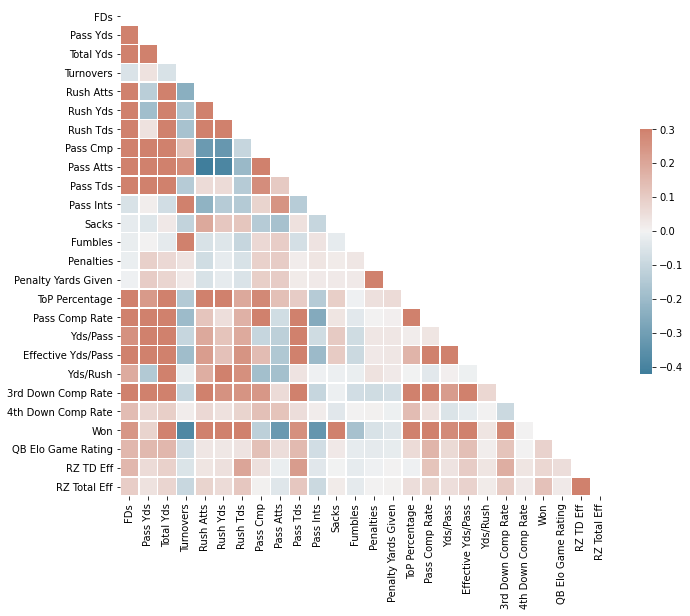

In [ ]:
#this cell basically copied from seaborn website and adjusted accordingly 
import seaborn as sns
mask = np.triu(np.ones_like(stats_corr_df, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(stats_corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



Turnovers, time of possession, effective yds/att, pass cr, sacks, rush atts, rush yards, and rush tds all have some level of correllation with winning/losing that's higher than the rest of the stats... Problem: these stats are from the actual game itself and not necessarily indicative of predictive value

In [ ]:
cols2add=['Home FDs Allowed',
'Away FDs Allowed',
'Home Pass Yds Allowed',
'Away Pass Yds Allowed',
'Home Total Yds Allowed',
'Away Total Yds Allowed',
'Home Rush Atts Allowed',
'Home Rush Yds Allowed',
'Home Rush Tds Allowed',
'Away Rush Atts Allowed',
'Away Rush Yds Allowed',
'Away Rush Tds Allowed',
'H Pass Tds Allowed',
'A Pass Tds Allowed',
'Home ToP Percentage Allowed',
'Away ToP Percentage Allowed',
'H Pass Comp Rate Allowed',
'H Yds/Pass Allowed',
'H Effective Yds/Pass Allowed',
'H Yds/Rush Allowed',
'H 3rd Down Comp Rate Allowed',
'H 4th Down Comp Rate Allowed',
'A Pass Comp Rate Allowed',
'A Yds/Pass Allowed',
'A Effective Yds/Pass Allowed',
'A Yds/Rush Allowed',
'A 3rd Down Comp Rate Allowed',
'A 4th Down Comp Rate Allowed',
'Home QB Elo Game Rating Allowed',
'Away QB Elo Game Rating Allowed',
'Home RZ TD Eff Allowed',
'Home RZ Total Eff Allowed',
'Away RZ TD Eff Allowed',
'Away RZ Total Eff Allowed']

for col in cols2add:
  #all are meant to be stats regarding a defense's performance
  stat = col[:col.index('Allowed')-1]
  if stat[0] == 'H':
    #is equal to away team's corresponding offensive stat
    if 'Home' in stat:
      stat = stat.replace('Home','Away')
    else:
      stat = stat.replace('H','A',1)
    aug_games_df[col] = pd.Series(list(aug_games_df[stat]))
  else:
    #is equal to home team's corresponding offensive stat
    if 'Away' in stat:
      stat = stat.replace('Away','Home')
    else:
      stat = stat.replace('A','H',1)
    aug_games_df[col] = pd.Series(list(aug_games_df[stat]))

aug_games_df.head()



Home Team Away Team  ... Away RZ TD Eff Allowed  Away RZ Total Eff Allowed
0    Patriots  Steelers  ...              66.666667                  95.238095
1     Cowboys    Giants  ...              48.717949                  89.743590
2  Buccaneers    Titans  ...              50.000000                  83.333333
3     Raiders   Bengals  ...              62.500000                  87.500000
4     Broncos    Ravens  ...              25.000000                  50.000000

[5 rows x 97 columns]

Added defensive stats to the dataframe which are just the copies of the offensive stats of the opposing team

Reminder that the stats in the dataframe are in game stats.. Will be adding columns to the dataframe where the value for these stats will be a rolling average of previous games' actual in-game value for those stats... What form will the rolling average take? For now, letting moving average be an average of past 5 games with following weights (625; 750; 900; 1080; 1296)/4651. At start of season, let rolling averages for each team to be an averaage reverting to mean with 0.35 weight.. 

In [ ]:
stats_list=['Home FDs',
'Away FDs',
'Home Pass Yds',
'Away Pass Yds',
'Home Total Yds',
'Away Total Yds',
'Home Turnovers',
'Away Turnovers',
'Home Rush Atts',
'Home Rush Yds',
'Home Rush Tds',
'Away Rush Atts',
'Away Rush Yds',
'Away Rush Tds',
'H Pass Cmp',
'H Pass Atts',
'H Pass Tds',
'H Pass Ints',
'A Pass Cmp',
'A Pass Atts',
'A Pass Tds',
'A Pass Ints',
'Home Sacks',
'Away Sacks',
'Home Fumbles',
'Away Fumbles',
'Home Penalties',
'Home Penalty Yards Given',
'Away Penalties',
'Away Penalty Yards Given',
'Home ToP Percentage',
'Away ToP Percentage',
'H Pass Comp Rate',
'H Yds/Pass',
'H Effective Yds/Pass',
'H Yds/Rush',
'H 3rd Down Comp Rate',
'H 4th Down Comp Rate',
'A Pass Comp Rate',
'A Yds/Pass',
'A Effective Yds/Pass',
'A Yds/Rush',
'A 3rd Down Comp Rate',
'A 4th Down Comp Rate',
'Home QB Elo Game Rating',
'Away QB Elo Game Rating',
'Home RZ TD Eff',
'Home RZ Total Eff',
'Away RZ TD Eff',
'Away RZ Total Eff',
'Home FDs Allowed',
'Away FDs Allowed',
'Home Pass Yds Allowed',
'Away Pass Yds Allowed',
'Home Total Yds Allowed',
'Away Total Yds Allowed',
'Home Rush Atts Allowed',
'Home Rush Yds Allowed',
'Home Rush Tds Allowed',
'Away Rush Atts Allowed',
'Away Rush Yds Allowed',
'Away Rush Tds Allowed',
'H Pass Tds Allowed',
'A Pass Tds Allowed',
'Home ToP Percentage Allowed',
'Away ToP Percentage Allowed',
'H Pass Comp Rate Allowed',
'H Yds/Pass Allowed',
'H Effective Yds/Pass Allowed',
'H Yds/Rush Allowed',
'H 3rd Down Comp Rate Allowed',
'H 4th Down Comp Rate Allowed',
'A Pass Comp Rate Allowed',
'A Yds/Pass Allowed',
'A Effective Yds/Pass Allowed',
'A Yds/Rush Allowed',
'A 3rd Down Comp Rate Allowed',
'A 4th Down Comp Rate Allowed',
'Home QB Elo Game Rating Allowed',
'Away QB Elo Game Rating Allowed',
'Home RZ TD Eff Allowed',
'Home RZ Total Eff Allowed',
'Away RZ TD Eff Allowed',
'Away RZ Total Eff Allowed']

stats_set = set()
for s in stats_list:
  if 'Home' in s:
    cur = s.replace('Home','').strip()
  elif s[0]=='H':
    cur = s[2:]
  elif 'Away' in s:
    cur = s.replace('Away','').strip()
  else:
    cur = s[2:]
  if cur not in stats_set:
    stats_set.add(cur) 


In [ ]:
aug_games_df.head()

Home Team Away Team  ...        Date  Season
0    Patriots  Steelers  ...  2015-09-10    2015
1     Cowboys    Giants  ...  2015-09-13    2015
2  Buccaneers    Titans  ...  2015-09-13    2015
3     Raiders   Bengals  ...  2015-09-13    2015
4     Broncos    Ravens  ...  2015-09-13    2015

[5 rows x 98 columns]

In [ ]:
stats_set

{'3rd Down Atts',
 '3rd Down Comp Rate',
 '3rd Down Comp Rate Allowed',
 '3rd Down Makes',
 '4th Down Atts',
 '4th Down Comp Rate',
 '4th Down Comp Rate Allowed',
 '4th Down Makes',
 'Effective Yds/Pass',
 'Effective Yds/Pass Allowed',
 'FDs',
 'FDs Allowed',
 'Fumbles',
 'Pass Atts',
 'Pass Cmp',
 'Pass Comp Rate',
 'Pass Comp Rate Allowed',
 'Pass Ints',
 'Pass Tds',
 'Pass Tds Allowed',
 'Pass Yds',
 'Pass Yds Allowed',
 'Penalties',
 'Penalty Yards Given',
 'QB Elo Game Rating',
 'QB Elo Game Rating Allowed',
 'RZ TD Eff',
 'RZ TD Eff Allowed',
 'RZ Total Eff',
 'RZ Total Eff Allowed',
 'Rush Atts',
 'Rush Atts Allowed',
 'Rush Tds',
 'Rush Tds Allowed',
 'Rush Yds',
 'Rush Yds Allowed',
 'Sacks',
 'ToP Percentage',
 'ToP Percentage Allowed',
 'Total Yds',
 'Total Yds Allowed',
 'Turnovers',
 'Yds/Pass',
 'Yds/Pass Allowed',
 'Yds/Rush',
 'Yds/Rush Allowed'}

In [ ]:
df_pred = aug_games_df[['Date','Home Team','Away Team','Home Won']]
ra_dict = {}
ra_listpos_dict = {}
for team in team2name.values():
  ra_dict[team] = []
  ra_listpos_dict[team]=0
szn = []
dts = []
for idx, row in aug_games_df.iterrows():
  dt = pd.Timestamp(row['Date']).date()
  dts.append(dt)
  month = dt.month
  if month < 9:
    year = dt.year-1
  else:
    year = dt.year
  szn.append(year)
aug_games_df.drop('Date',axis=1,inplace=True)
aug_games_df['Date']=pd.Series(dts)


aug_games_df['Season'] = pd.Series(szn)

for stat in stats_set:
  print(stat)
  df_pred['H '+stat]=pd.Series(np.zeros(len(df_pred)))
  df_pred['A '+stat]=pd.Series(np.zeros(len(df_pred)))
  #add 2 new columns to the new df for each stat (1 col for Home, 1 for away)
  col = stat.replace('Allowed','').strip()
  stat_avg = np.mean(np.array(aug_games_df_subset[col]))
  for yr in [2015,2016,2017,2018,2019,2020]: #outer loop over the different seasons 
    for team in team2name.values(): #inner loop for each NFL team
      if yr == 2020:
        print(team)
      if yr == 2015:
        ra_dict[team] = []
        ra_listpos_dict[team]=0
      team_df = pd.concat((aug_games_df.loc[aug_games_df['Home Team']==team,:], aug_games_df.loc[aug_games_df['Away Team']==team,:]))
      team_df.reset_index(inplace=True)
      team_szn_df = team_df.loc[team_df['Season']==yr,:] #df for each team and for each season at a time
      team_szn_df.reset_index(inplace=True)
      for idx, row in team_szn_df.iterrows(): #iterating over a team's game for the given season
        if idx == 0 and yr==2015:
          ra_dict[team].append(stat_avg) #if it's the team's first game of the first season we have data for, let the average value of the stat be the current status for the team's stat for that game
          continue
        elif idx == 0: #if it's the team's first game but not the first season we have data for, let the current status for the team's value for that stat be a weighted average between the team's status in the last game of the prior season and the average for all team's statuses for last game of the prev season
          #start of new season 
          past_yr_val = ra_dict[team][len(ra_dict[team])-1]
          sum = 0
          for t in team2name.values():
            sum+=ra_dict[t][len(ra_dict[t])-1]
          ra_dict[team].append(sum*.35/32 + .65*past_yr_val)
        elif idx < 5:
          if ('Home ' + stat) in team_szn_df.columns:
            name = 'Home ' + stat
            full=True
          else:
            name = 'H ' + stat
            full=False
          if idx+1 == 2:
            #currently at week 2 
            wk1 = team_szn_df.iloc[0]
            if wk1['Home Team']==team:
                ra_dict[team].append(wk1[name])
            else:
              if full:
                ra_dict[team].append(wk1[name.replace('Home','Away')])
              else:
                ra_dict[team].append(wk1[name.replace('H','A',1)])
          elif idx+1==3:
            #currently at week 3
            wk1 = team_szn_df.iloc[0]
            if wk1['Home Team']==team:
                wk1_val=(wk1[name])
            else:
              if full:
                wk1_val=(wk1[name.replace('Home','Away')])
              else:
                wk1_val=(wk1[name.replace('H','A',1)])
            wk2 = team_szn_df.iloc[1]
            if wk2['Home Team']==team:
                wk2_val=(wk2[name])
            else:
              if full:
                wk2_val=(wk2[name.replace('Home','Away')])
              else:
                wk2_val=(wk2[name.replace('H','A',1)])
            ra_dict[team].append(0.4*wk1_val + 0.6*wk2_val)
          elif idx+1==4:
            #currently at week 4
            prev_weeks = team_szn_df.iloc[[0,1,2]]
            cur_coeff = 25/91
            ra = 0
            it_idx = 0
            for inner_idx, inner_row in prev_weeks.iterrows():
              if inner_row['Home Team']==team:
                ra+=inner_row[name]*cur_coeff
              else:
                if full:
                  ra+=inner_row[name.replace('Home','Away')]*cur_coeff
                else:
                  ra+=inner_row[name.replace('H','A',1)]*cur_coeff
              if it_idx == 0:
                cur_coeff=30/91
              else:
                cur_coeff=36/91
              it_idx+=1
            ra_dict[team].append(ra)
          elif idx+1==5:
            #currently at week 5
            prev_weeks = team_szn_df.iloc[[0,1,2,3]]
            cur_coeff = 125/671
            it_idx = 0
            ra = 0
            for inner_idx, inner_row in prev_weeks.iterrows():
              if inner_row['Home Team']==team:
                ra+=inner_row[name]*cur_coeff
              else:
                if full:
                  ra+=inner_row[name.replace('Home','Away')]*cur_coeff
                else:
                  ra+=inner_row[name.replace('H','A',1)]*cur_coeff
              if it_idx == 0:
                cur_coeff=150/671
              elif it_idx==1:
                cur_coeff=180/671
              else:
                cur_coeff=216/671
              it_idx+=1
            ra_dict[team].append(ra)
        else:
          prev_weeks = team_szn_df.iloc[list(np.arange(idx-5,idx))]
          cur_coeff = 625/4651
          ra = 0
          it_idx = 0
          for inner_idx, inner_row in prev_weeks.iterrows():
            if inner_row['Home Team']==team:
              ra+=inner_row[name]*cur_coeff
            else:
              if full:
                ra+=inner_row[name.replace('Home','Away')]*cur_coeff
              else:
                ra+=inner_row[name.replace('H','A',1)]*cur_coeff
            if it_idx == 0:
              cur_coeff=750/4651
            elif it_idx==1:
              cur_coeff=900/4651
            elif it_idx==2:
              cur_coeff=1080/4651
            else:
              cur_coeff=1296/4651
            it_idx+=1
          ra_dict[team].append(ra)
  #for the current stat we are looking at, we have looped over all the games
  for idx, row in aug_games_df.iterrows():
    #loop over each gaame
    hTeam = row['Home Team']
    aTeam = row['Away Team']
    df_pred.loc[idx,'H '+stat]=ra_dict[hTeam][ra_listpos_dict[hTeam]]
    ra_listpos_dict[hTeam]=ra_listpos_dict[hTeam]+1
    df_pred.loc[idx,'A '+stat]=ra_dict[aTeam][ra_listpos_dict[aTeam]]
    ra_listpos_dict[aTeam]=ra_listpos_dict[aTeam]+1



Rush Tds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Effective Yds/Pass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Sacks


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Penalty Yards Given


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


QB Elo Game Rating Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


FDs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Rush Atts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


FDs Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


RZ Total Eff


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Rush Tds Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Yds/Rush Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Yds/Pass


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


RZ TD Eff


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Atts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


QB Elo Game Rating


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Turnovers


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


4th Down Comp Rate


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


ToP Percentage Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Rush Yds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


ToP Percentage


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Comp Rate Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Effective Yds/Pass Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Total Yds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


3rd Down Comp Rate Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Yds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Tds Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Tds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Rush Atts Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Rush Yds Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fumbles


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


RZ Total Eff Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Yds/Rush


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


3rd Down Comp Rate


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Total Yds Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Penalties


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Cmp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Comp Rate


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Yds Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Yds/Pass Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


4th Down Comp Rate Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


RZ TD Eff Allowed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Pass Ints


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bills
Dolphins
Jets
Patriots
Ravens
Browns
Bengals
Steelers
Colts
Titans
Texans
Jaguars
Chiefs
Chargers
Broncos
Eagles
Giants
Cowboys
Redskins
Packers
Vikings
Bears
Lions
Buccaneers
Saints
Falcons
Panthers
Seahawks
49ers
Cardinals
Rams
Raiders


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
list(stats_set)

['Rush Tds',
 'Effective Yds/Pass',
 'Sacks',
 'Penalty Yards Given',
 'QB Elo Game Rating Allowed',
 'FDs',
 'Rush Atts',
 'FDs Allowed',
 'RZ Total Eff',
 'Rush Tds Allowed',
 'Yds/Rush Allowed',
 'Yds/Pass',
 'RZ TD Eff',
 'Pass Atts',
 'QB Elo Game Rating',
 'Turnovers',
 '4th Down Comp Rate',
 'ToP Percentage Allowed',
 'Rush Yds',
 'ToP Percentage',
 'Pass Comp Rate Allowed',
 'Effective Yds/Pass Allowed',
 'Total Yds',
 '3rd Down Comp Rate Allowed',
 'Pass Yds',
 'Pass Tds Allowed',
 'Pass Tds',
 'Rush Atts Allowed',
 'Rush Yds Allowed',
 'Fumbles',
 'RZ Total Eff Allowed',
 'Yds/Rush',
 '3rd Down Comp Rate',
 'Total Yds Allowed',
 'Penalties',
 'Pass Cmp',
 'Pass Comp Rate',
 'Pass Yds Allowed',
 'Yds/Pass Allowed',
 '4th Down Comp Rate Allowed',
 'RZ TD Eff Allowed',
 'Pass Ints']

In [ ]:
df_pred.tail()

Date   Home Team  ... H Pass Ints  A Pass Ints
1599  2021-01-17      Chiefs  ...    0.232208     0.000000
1600  2021-01-17      Saints  ...    0.472157     0.000000
1601  2021-01-24      Chiefs  ...    1.029456     0.322511
1602  2021-01-24     Packers  ...    0.500968     0.000000
1603  2021-02-07  Buccaneers  ...    0.000000     0.857880

[5 rows x 88 columns]

df_pred is a dataframe in which there exists a row for each NFL game from the 2015/16 NFL season through the 2020/21 NFL season. For each game, basic information like the home team, away team, outcome, and data are included. Additionally, for each game, there exist values (for each team) for things like first downs, 3rd down CR, 4th down CR, red zone total efficiency, red zone td efficiency, pass yards, rush yards, first downs allowed, 3rd down CR alllowed, 4th down CR allowed, red zone total efficiency allowed, red zone td efficiency allowed, pass yards allowed, rush yards allowed, and more! Since we want to predict games from data, these values are NOT stats from the game itself but rather rolling averages of previous games with greater weight being placed on more recent games than those earlier on

In [ ]:
df_pred.to_dict(orient='list')

{'A 3rd Down Comp Rate': [38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  38.96868182836095,
  44.44444444444444,
  31.25,
  54.54545454545455,
  30.76923076923077,
  43.75,
  41.666666666666664,
  21.428571428571427,
  50.0,
  63.63636363636363,
  54.54545454545455,
  30.76923076923077,
  28.571428571428573,
  54.54545454545455,
  33.333333333333336,
  21.428571428571427,
  53.84615384615385,
  47.14285714285714,
  45.14285714285714,
  31.11111111111111,
  33.84615384615385,
  35.88235294117647,
  35.128205128205124,
  45.17857142857143,
  52.0,
  31.428571428571427,
  47.69230769230769,
  29.090909090909093,
  38.57142857142857,
  38.18181818181819,
  33.230769230769226,
  48.57142857142858,
  21.428571428571427,
  40.276

In [ ]:
df_pred = pd.read_csv('gdrive/MyDrive/df_pred.csv')
df_pred.head()

Date   Home Team  ... H Pass Ints  A Pass Ints
0  2015-09-10    Patriots  ...    0.813279     0.813279
1  2015-09-13     Cowboys  ...    0.813279     0.813279
2  2015-09-13  Buccaneers  ...    0.813279     0.813279
3  2015-09-13     Raiders  ...    0.813279     0.813279
4  2015-09-13     Broncos  ...    0.813279     0.813279

[5 rows x 88 columns]

In [ ]:
a_won = []
for idx, row in df_pred.iterrows():
  if row['Home Won']>0:
    a_won.append(0)
  else:
    a_won.append(1)
df_pred['Away Won']=pd.Series(a_won)

In [ ]:
df_pred_cols = ['Date',
 'Home Team',
 'Away Team',
 'Home Won',
 'H Rush Tds',
 'A Rush Tds',
 'H Effective Yds/Pass',
 'A Effective Yds/Pass',
 'H Sacks',
 'A Sacks',
 'H Penalty Yards Given',
 'A Penalty Yards Given',
 'H QB Elo Game Rating Allowed',
 'A QB Elo Game Rating Allowed',
 'H FDs',
 'A FDs',
 'H Rush Atts',
 'A Rush Atts',
 'H FDs Allowed',
 'A FDs Allowed',
 'H RZ Total Eff',
 'A RZ Total Eff',
 'H Rush Tds Allowed',
 'A Rush Tds Allowed',
 'H Yds/Rush Allowed',
 'A Yds/Rush Allowed',
 'H Yds/Pass',
 'A Yds/Pass',
 'H RZ TD Eff',
 'A RZ TD Eff',
 'H Pass Atts',
 'A Pass Atts',
 'H QB Elo Game Rating',
 'A QB Elo Game Rating',
 'H Turnovers',
 'A Turnovers',
 'H 4th Down Comp Rate',
 'A 4th Down Comp Rate',
 'H ToP Percentage Allowed',
 'A ToP Percentage Allowed',
 'H Rush Yds',
 'A Rush Yds',
 'H ToP Percentage',
 'A ToP Percentage',
 'H Pass Comp Rate Allowed',
 'A Pass Comp Rate Allowed',
 'H Effective Yds/Pass Allowed',
 'A Effective Yds/Pass Allowed',
 'H Total Yds',
 'A Total Yds',
 'H 3rd Down Comp Rate Allowed',
 'A 3rd Down Comp Rate Allowed',
 'H Pass Yds',
 'A Pass Yds',
 'H Pass Tds Allowed',
 'A Pass Tds Allowed',
 'H Pass Tds',
 'A Pass Tds',
 'H Rush Atts Allowed',
 'A Rush Atts Allowed',
 'H Rush Yds Allowed',
 'A Rush Yds Allowed',
 'H Fumbles',
 'A Fumbles',
 'H RZ Total Eff Allowed',
 'A RZ Total Eff Allowed',
 'H Yds/Rush',
 'A Yds/Rush',
 'H 3rd Down Comp Rate',
 'A 3rd Down Comp Rate',
 'H Total Yds Allowed',
 'A Total Yds Allowed',
 'H Penalties',
 'A Penalties',
 'H Pass Cmp',
 'A Pass Cmp',
 'H Pass Comp Rate',
 'A Pass Comp Rate',
 'H Pass Yds Allowed',
 'A Pass Yds Allowed',
 'H Yds/Pass Allowed',
 'A Yds/Pass Allowed',
 'H 4th Down Comp Rate Allowed',
 'A 4th Down Comp Rate Allowed',
 'H RZ TD Eff Allowed',
 'A RZ TD Eff Allowed',
 'H Pass Ints',
 'A Pass Ints',
 'Away Won']

cols = df_pred_cols

rem = ['Date',
 'Home Team',
 'Away Team']

for col in rem:
  cols.remove(col)


In [ ]:
seen = []
subset_dict = {}
for col in cols: #cols is the columns of df_pred that we care about for correlation purposes
  if col[0]=='H':
    seen.append(col)
    if 'Home' in col:
      col2 = 'Away' + col[col.index('Home')+4:]
      col0 = col[col.index('Home')+5:] #actual stat without home or away attached
    else:
      col2 = 'A' + col[1:]
      col0 = col[2:] #actual stat without home or away attached
    seen.append(col2)
    subset_dict[col0]=pd.concat([df_pred[col],df_pred[col2]],axis=0)
  else:
    continue #already seeen 
df_pred_subset=pd.DataFrame(data=subset_dict)

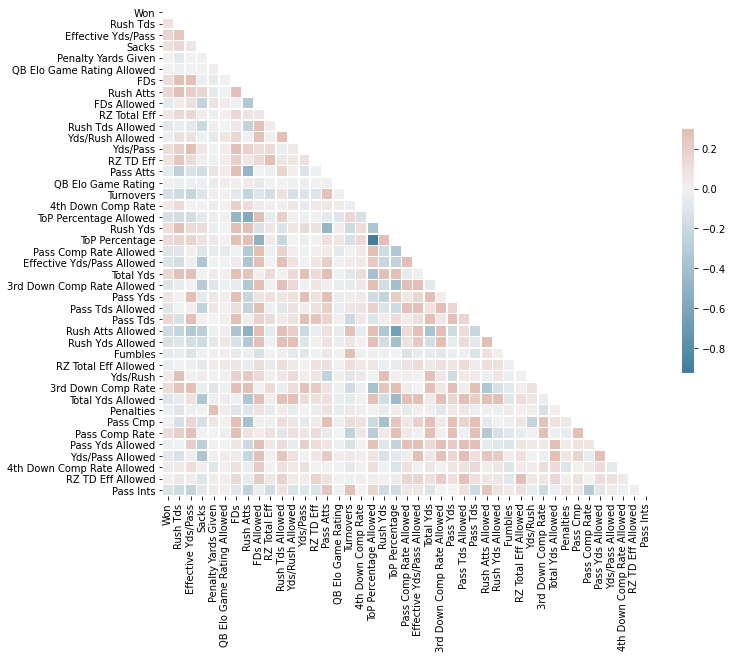

In [ ]:
import seaborn as sns
corr_df = df_pred_subset.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
corr_df.iloc[0]

Won                           1.000000
Rush Tds                      0.097798
Effective Yds/Pass            0.158682
Sacks                         0.101376
Penalty Yards Given          -0.000981
QB Elo Game Rating Allowed    0.002827
FDs                           0.122075
Rush Atts                     0.144565
FDs Allowed                  -0.070578
RZ Total Eff                  0.067711
Rush Tds Allowed             -0.076380
Yds/Rush Allowed             -0.022815
Yds/Pass                      0.112800
RZ TD Eff                     0.082317
Pass Atts                    -0.056860
QB Elo Game Rating            0.009533
Turnovers                    -0.136438
4th Down Comp Rate            0.043428
ToP Percentage Allowed       -0.138498
Rush Yds                      0.111910
ToP Percentage                0.133950
Pass Comp Rate Allowed       -0.094616
Effective Yds/Pass Allowed   -0.112978
Total Yds                     0.141822
3rd Down Comp Rate Allowed   -0.092038
Pass Yds                 

It looks like the following predictors can be used in a model: Pass Ints, Pass Comp Rate, 3rd Down Comp Rate, Rush Yds Allowed, Rush Atts Allowed, Pass Tds, Total Yds, Eff Yds/Pass Allowed, ToP Percentage, Rush Yds, ToP Percentage Allowed, Turnovers, Sacks, Rush Atts, Eff Yds/Pass, FDs

In [ ]:
predictors = ['Pass Ints','Pass Comp Rate','3rd Down Comp Rate','Rush Yds Allowed','Rush Atts Allowed','Pass Tds','Total Yds','Effective Yds/Pass Allowed','ToP Percentage','Rush Yds','ToP Percentage Allowed','Turnovers','Sacks','Rush Atts','Effective Yds/Pass','FDs']

index_cols = []

for pred in predictors:
  index_cols.append('H '+ pred)
  index_cols.append('A ' + pred)


index_cols.append('Home Won')

data = df_pred[index_cols]

Y = data['Home Won']
data.drop('Home Won',axis=1,inplace=True)
data['Y']=Y
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


H Pass Ints  A Pass Ints  H Pass Comp Rate  ...      H FDs      A FDs  Y
0     0.813279     0.813279         63.703374  ...  20.353491  20.353491  1
1     0.813279     0.813279         63.703374  ...  20.353491  20.353491  1
2     0.813279     0.813279         63.703374  ...  20.353491  20.353491  0
3     0.813279     0.813279         63.703374  ...  20.353491  20.353491  0
4     0.813279     0.813279         63.703374  ...  20.353491  20.353491  1

[5 rows x 33 columns]

In [ ]:
list(data.columns)

['H Pass Ints',
 'A Pass Ints',
 'H Pass Comp Rate',
 'A Pass Comp Rate',
 'H 3rd Down Comp Rate',
 'A 3rd Down Comp Rate',
 'H Rush Yds Allowed',
 'A Rush Yds Allowed',
 'H Rush Atts Allowed',
 'A Rush Atts Allowed',
 'H Pass Tds',
 'A Pass Tds',
 'H Total Yds',
 'A Total Yds',
 'H Effective Yds/Pass Allowed',
 'A Effective Yds/Pass Allowed',
 'H ToP Percentage',
 'A ToP Percentage',
 'H Rush Yds',
 'A Rush Yds',
 'H ToP Percentage Allowed',
 'A ToP Percentage Allowed',
 'H Turnovers',
 'A Turnovers',
 'H Sacks',
 'A Sacks',
 'H Rush Atts',
 'A Rush Atts',
 'H Effective Yds/Pass',
 'A Effective Yds/Pass',
 'H FDs',
 'A FDs',
 'Date',
 'Home Team',
 'Away Team',
 'Y']

In [ ]:
reordering=['H Pass Ints',
 'A Pass Ints',
 'H Pass Comp Rate',
 'A Pass Comp Rate',
 'H 3rd Down Comp Rate',
 'A 3rd Down Comp Rate',
 'H Rush Yds Allowed',
 'A Rush Yds Allowed',
 'H Rush Atts Allowed',
 'A Rush Atts Allowed',
 'H Pass Tds',
 'A Pass Tds',
 'H Total Yds',
 'A Total Yds',
 'H Effective Yds/Pass Allowed',
 'A Effective Yds/Pass Allowed',
 'H ToP Percentage',
 'A ToP Percentage',
 'H Rush Yds',
 'A Rush Yds',
 'H ToP Percentage Allowed',
 'A ToP Percentage Allowed',
 'H Turnovers',
 'A Turnovers',
 'H Sacks',
 'A Sacks',
 'H Rush Atts',
 'A Rush Atts',
 'H Effective Yds/Pass',
 'A Effective Yds/Pass',
 'H FDs',
 'A FDs','Y']
 
data=data[reordering]
data.head()

H Pass Ints  A Pass Ints  H Pass Comp Rate  ...      H FDs      A FDs  Y
0     0.813279     0.813279         63.703374  ...  20.353491  20.353491  1
1     0.813279     0.813279         63.703374  ...  20.353491  20.353491  1
2     0.813279     0.813279         63.703374  ...  20.353491  20.353491  0
3     0.813279     0.813279         63.703374  ...  20.353491  20.353491  0
4     0.813279     0.813279         63.703374  ...  20.353491  20.353491  1

[5 rows x 33 columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score
x_cols = list(data.columns)
x_cols.remove('Y')
clf = KNeighborsClassifier()
scores = cross_val_score(clf, np.array(data[x_cols]), np.array(data['Y']), cv=5)
scores

array([0.48598131, 0.56697819, 0.56386293, 0.55140187, 0.565625  ])